# Kütüphaneler ve Ayarlar

In [1171]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.width', 100000)

# Veri Okuma

In [1173]:
# Google Drive'daki dosyamızı webde paylaşarak onun URL'i ile verimizi çağırıyoruz. 
# ÖNEMLİ: Kullanıdğımız dataset anonim olduğu için bu sorun oluşturmuyor, kişisel verilerinizi ya da şirket verilerinizi bu şekilde paylaşMAMAnızı öneririz. 
sheet_url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vTrctVMWvnHC7KeRr-QfeARmfEz2kvM4Q1QN6H4oJBACYJqTmkVt5SweuGFtM-uAg/pub?output=csv"

# Veriyi okuyoruz ve bir kopyasını oluşturuyoruz.
hr_ = pd.read_csv(sheet_url)

hr = hr_.copy()

# İlk satırı göster
hr.head(1)

Age Attrition BusinessTravel  DailyRate Department  DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  JobLevel          JobRole  JobSatisfaction MaritalStatus  MonthlyIncome  MonthlyRate  NumCompaniesWorked Over18 OverTime  PercentSalaryHike  PerformanceRating  RelationshipSatisfaction  StandardHours  StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager
0   41       Yes  Travel_Rarely       1102      Sales                 1          2  Life Sciences              1               1                        2  Female          94               3         2  Sales Executive                4        Single           5993        19479                   8      Y      Yes                 11                  3                         1             80                 0                  8                      0                1               6                   4                        0                     5

In [1174]:
# değişken isimlerinin notasyonunu standardize edelim
hr.columns = [col.lower() for col in hr.columns]

In [1175]:
# Mapping Attrition Column
hr['att'] = hr['attrition'].map({'Yes': 1, 'No': 0})

In [1176]:
hr.drop(["attrition", "employeecount", "over18", "standardhours"],  axis=1, inplace=True)

In [1177]:
hr.head()

age     businesstravel  dailyrate              department  distancefromhome  education educationfield  employeenumber  environmentsatisfaction  gender  hourlyrate  jobinvolvement  joblevel                jobrole  jobsatisfaction maritalstatus  monthlyincome  monthlyrate  numcompaniesworked overtime  percentsalaryhike  performancerating  relationshipsatisfaction  stockoptionlevel  totalworkingyears  trainingtimeslastyear  worklifebalance  yearsatcompany  yearsincurrentrole  yearssincelastpromotion  yearswithcurrmanager  att
0   41      Travel_Rarely       1102                   Sales                 1          2  Life Sciences               1                        2  Female          94               3         2        Sales Executive                4        Single           5993        19479                   8      Yes                 11                  3                         1                 0                  8                      0                1               6                   4                        0                     5    1
1   49  Travel_Frequently        279  Research & Development                 8          1  Life Sciences               2                        3    Male          61               2         2     Research Scientist                2       Married           5130        24907                   1       No                 23                  4                         4                 1                 10                      3                3              10                   7                        1                     7    0
2   37      Travel_Rarely       1373  Research & Development                 2          2          Other               4                        4    Male          92               2         1  Laboratory Technician                3        Single           2090         2396                   6      Yes                 15                  3                         2                 0                  7                      3                3               0                   0                        0                     0    1
3   33  Travel_Frequently       1392  Research & Development                 3          4  Life Sciences               5                        4  Female          56               3         1     Research Scientist                3       Married           2909        23159                   1      Yes                 11                  3                         3                 0                  8                      3                3               8                   7                        3                     0    0
4   27      Travel_Rarely        591  Research & Development                 2          1        Medical               7                        1    Male          40               3         1  Laboratory Technician                2       Married           3468        16632                   9       No                 12                  3                         4                 1                  6                      3                3               2                   2                        2                     2    0

# Keşifçi Veri Analizi - Exploratory Data Analysis (EDA)

In [1179]:
# 1. Genel Resim
# 2. Kategorik Değişken Analizi (Analysis of Categorical Variables)
# 3. Sayısal Değişken Analizi (Analysis of Numerical Variables)
# 4. Hedef Değişken Analizi (Analysis of Target Variable)
# 5. Korelasyon Analizi (Analysis of Correlation)

## Genel Resim

In [1181]:
# hr.head()
# hr.tail()
# hr.shape
# hr.info()
# hr.columns
# hr.index
# hr.describe().T
# hr.isnull().values.any()
# hr.isnull().sum()

In [1182]:
print(hr.shape)
print(hr.info())
print(hr.isnull().sum())

(1470, 32)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   age                       1470 non-null   int64 
 1   businesstravel            1470 non-null   object
 2   dailyrate                 1470 non-null   int64 
 3   department                1470 non-null   object
 4   distancefromhome          1470 non-null   int64 
 5   education                 1470 non-null   int64 
 6   educationfield            1470 non-null   object
 7   employeenumber            1470 non-null   int64 
 8   environmentsatisfaction   1470 non-null   int64 
 9   gender                    1470 non-null   object
 10  hourlyrate                1470 non-null   int64 
 11  jobinvolvement            1470 non-null   int64 
 12  joblevel                  1470 non-null   int64 
 13  jobrole                   1470 non-null   object
 14  jobsatisfacti

### Check_DF

In [1184]:
hr["stockoptionlevel"].value_counts()

# hiç bulunmuyor
# az miktarda bulunuyor
# orta seviye
# ortaklık seviyesinde 

stockoptionlevel
0    631
1    596
2    158
3     85
Name: count, dtype: int64

In [1185]:
def check_df(dataframe, head=5):
    print("##################### Shape #####################")
    print(dataframe.shape)
    print(" ")
    print("##################### Info #####################")
    print(dataframe.info())
    print(" ")
    print("##################### NA #####################")
    print(dataframe.isnull().sum())
    print(" ")
    print("##################### Describe #####################")
    print(dataframe.describe([0.01, 0.05, 0.1, 0.25, 0.50, 0.75, 0.90, 0.95, 0.99]).T)


    # print("##################### Head #####################")
    # print(dataframe.head(head))    
# print("##################### Head #####################")
# print(dataframe.head(head))
#print("##################### Tail #####################")
#print(dataframe.tail(head))
#[0.1, 0.25, 0.50, 0.75, 0.90]
#[0.01, 0.05, 0.1, 0.25, 0.50, 0.75, 0.90, 0.95, 0.99]

In [1186]:
check_df(hr)

##################### Shape #####################
(1470, 32)
 
##################### Info #####################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   age                       1470 non-null   int64 
 1   businesstravel            1470 non-null   object
 2   dailyrate                 1470 non-null   int64 
 3   department                1470 non-null   object
 4   distancefromhome          1470 non-null   int64 
 5   education                 1470 non-null   int64 
 6   educationfield            1470 non-null   object
 7   employeenumber            1470 non-null   int64 
 8   environmentsatisfaction   1470 non-null   int64 
 9   gender                    1470 non-null   object
 10  hourlyrate                1470 non-null   int64 
 11  jobinvolvement            1470 non-null   int64 
 12  joblevel            

### Değişkenlerin Ayrıştırılması (GRAB)

In [1188]:
def grab_col_names(dataframe, cat_th=10,  car_th=20):
    """
    Veri setindeki kategorik, numerik ve kategorik fakat kardinal değişkenlerin isimlerini verir.

    Parameters
    ----------
    dataframe: dataframe
        değişken isimleri alınmak istenen dataframe'dir.
    cat_th: int, float
        numerik fakat kategorik olan değişkenler için sınıf eşik değeri
    car_th: int, float
        kategorik fakat kardinal değişkenler için sınıf eşik değeri

    Returns
    -------
    cat_cols: list
        Kategorik değişken listesi
    num_cols: list
        Numerik değişken listesi
    cat_but_car: list
        Kategorik görünümlü kardinal değişken listesi

    Notes
    ------
    cat_cols + num_cols + cat_but_car = toplam değişken sayısı
    num_but_cat cat_cols'un içerisinde.

    """
    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if str(dataframe[col].dtypes) in ["category", "object", "bool"]]

    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and dataframe[col].dtypes in ["int", "float"]]

    cat_but_car = [col for col in dataframe.columns if
                   dataframe[col].nunique() > car_th and str(dataframe[col].dtypes) in ["category", "object"]]

    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes in ["int", "float"]]
    num_cols = [col for col in num_cols if col not in cat_cols]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')

    return cat_cols, num_cols, cat_but_car, num_but_cat


In [1189]:
cat_cols, num_cols, cat_but_car, num_but_cat = grab_col_names(hr)

Observations: 1470
Variables: 32
cat_cols: 18
num_cols: 14
cat_but_car: 0
num_but_cat: 11


In [1190]:
cat_cols

['businesstravel',
 'department',
 'educationfield',
 'gender',
 'jobrole',
 'maritalstatus',
 'overtime',
 'education',
 'environmentsatisfaction',
 'jobinvolvement',
 'joblevel',
 'jobsatisfaction',
 'performancerating',
 'relationshipsatisfaction',
 'stockoptionlevel',
 'trainingtimeslastyear',
 'worklifebalance',
 'att']

In [1191]:
num_cols

['age',
 'dailyrate',
 'distancefromhome',
 'employeenumber',
 'hourlyrate',
 'monthlyincome',
 'monthlyrate',
 'numcompaniesworked',
 'percentsalaryhike',
 'totalworkingyears',
 'yearsatcompany',
 'yearsincurrentrole',
 'yearssincelastpromotion',
 'yearswithcurrmanager']

In [1192]:
cat_but_car

[]

In [1193]:
num_but_cat

['education',
 'environmentsatisfaction',
 'jobinvolvement',
 'joblevel',
 'jobsatisfaction',
 'performancerating',
 'relationshipsatisfaction',
 'stockoptionlevel',
 'trainingtimeslastyear',
 'worklifebalance',
 'att']

## Kategorik Değişken Analizi

In [1195]:
hr["department"].value_counts(0)

department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64

In [1196]:
hr["department"].value_counts(1)

department
Research & Development   0.654
Sales                    0.303
Human Resources          0.043
Name: proportion, dtype: float64

In [1197]:
for col in cat_cols:
    print(hr[col].value_counts(1))
    print(" ")
    print("#####################")
    print(" ")

businesstravel
Travel_Rarely       0.710
Travel_Frequently   0.188
Non-Travel          0.102
Name: proportion, dtype: float64
 
#####################
 
department
Research & Development   0.654
Sales                    0.303
Human Resources          0.043
Name: proportion, dtype: float64
 
#####################
 
educationfield
Life Sciences      0.412
Medical            0.316
Marketing          0.108
Technical Degree   0.090
Other              0.056
Human Resources    0.018
Name: proportion, dtype: float64
 
#####################
 
gender
Male     0.600
Female   0.400
Name: proportion, dtype: float64
 
#####################
 
jobrole
Sales Executive             0.222
Research Scientist          0.199
Laboratory Technician       0.176
Manufacturing Director      0.099
Healthcare Representative   0.089
Manager                     0.069
Sales Representative        0.056
Research Director           0.054
Human Resources             0.035
Name: proportion, dtype: float64
 
################

### Cat_SUMMARY

In [1199]:
cat_cols

['businesstravel',
 'department',
 'educationfield',
 'gender',
 'jobrole',
 'maritalstatus',
 'overtime',
 'education',
 'environmentsatisfaction',
 'jobinvolvement',
 'joblevel',
 'jobsatisfaction',
 'performancerating',
 'relationshipsatisfaction',
 'stockoptionlevel',
 'trainingtimeslastyear',
 'worklifebalance',
 'att']

In [1200]:
def cat_summary(dataframe, col_name, target, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe),
                        "TARGET_SUM": dataframe.groupby(col_name)[target].sum()
                       }), end="\n\n\n")
    
    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.show(block=True)

    print("\n")
    print("##########################################")    
    print("\n")

                   businesstravel  Ratio  TARGET_SUM
businesstravel                                      
Non-Travel                    150 10.204          12
Travel_Frequently             277 18.844          69
Travel_Rarely                1043 70.952         156




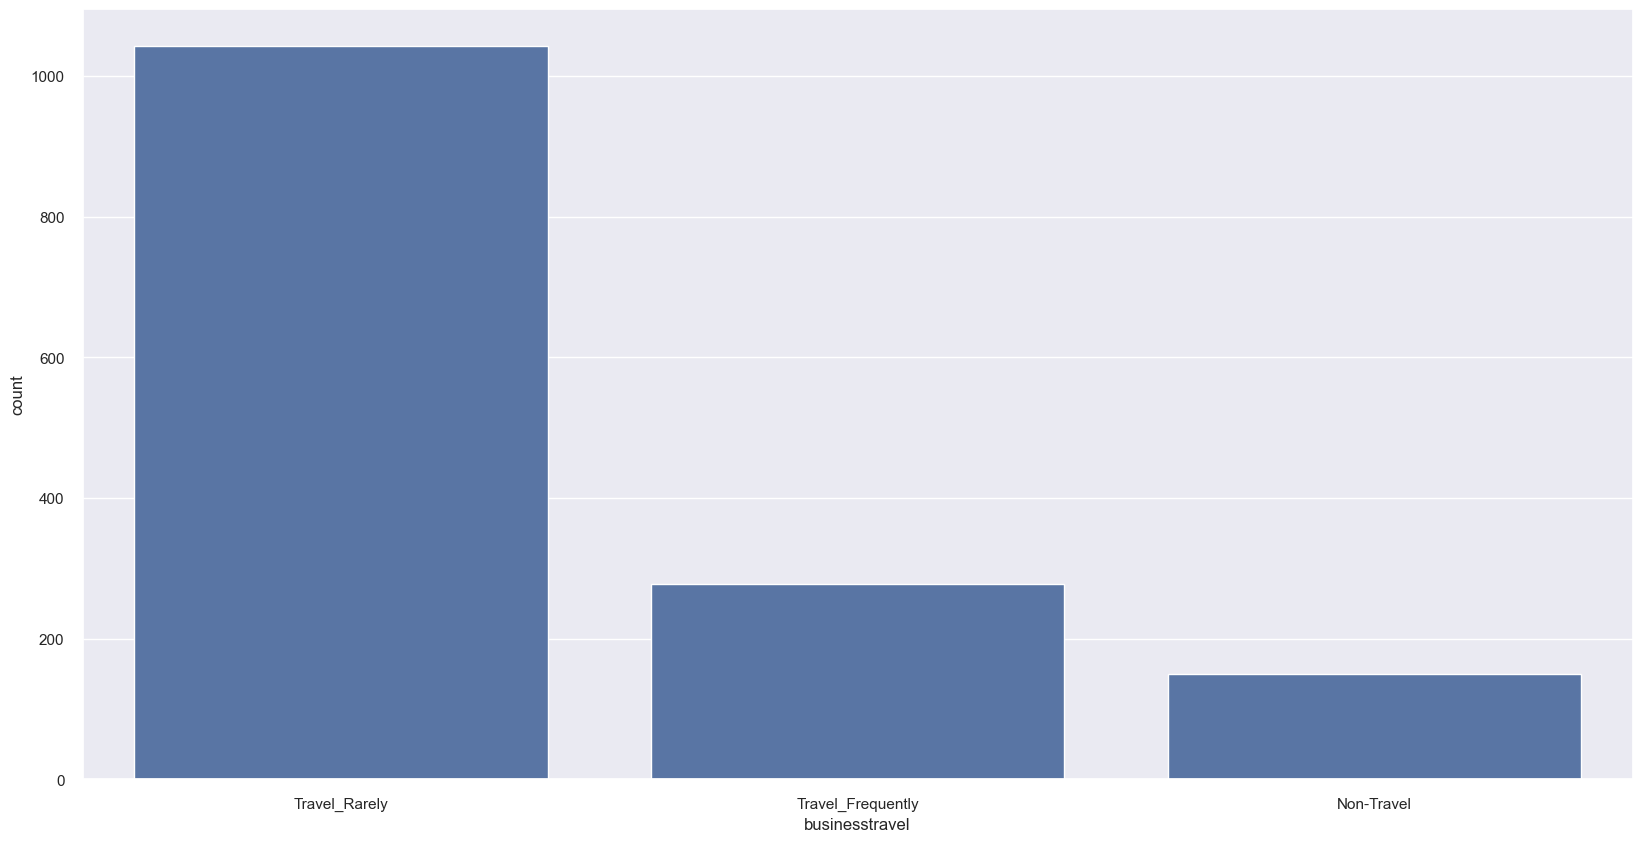



##########################################


                        department  Ratio  TARGET_SUM
department                                           
Human Resources                 63  4.286          12
Research & Development         961 65.374         133
Sales                          446 30.340          92




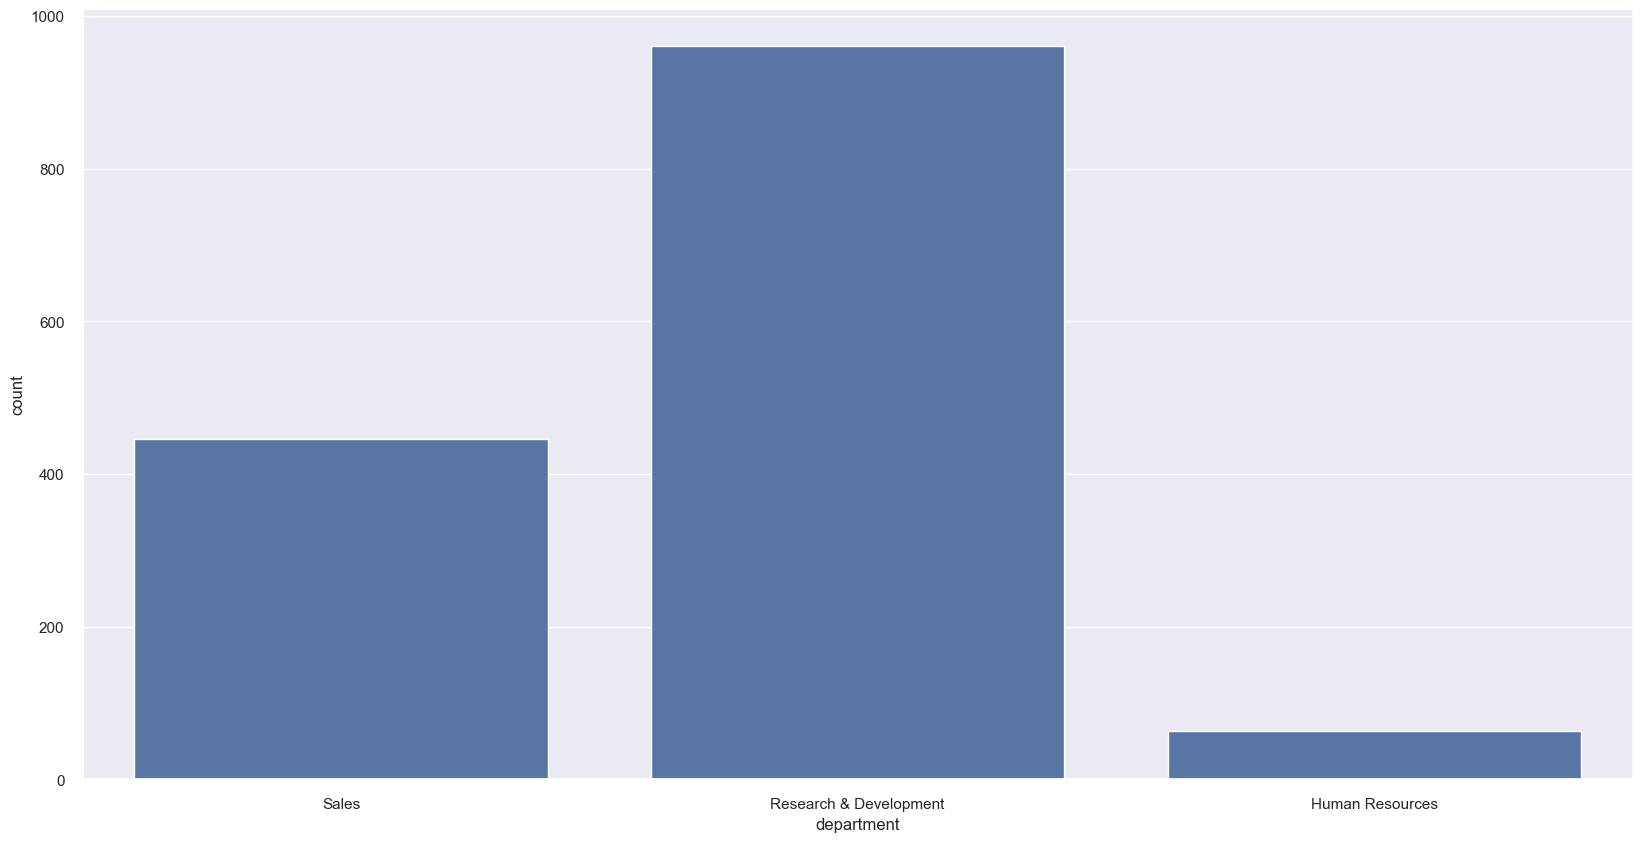



##########################################


                  educationfield  Ratio  TARGET_SUM
educationfield                                     
Human Resources               27  1.837           7
Life Sciences                606 41.224          89
Marketing                    159 10.816          35
Medical                      464 31.565          63
Other                         82  5.578          11
Technical Degree             132  8.980          32




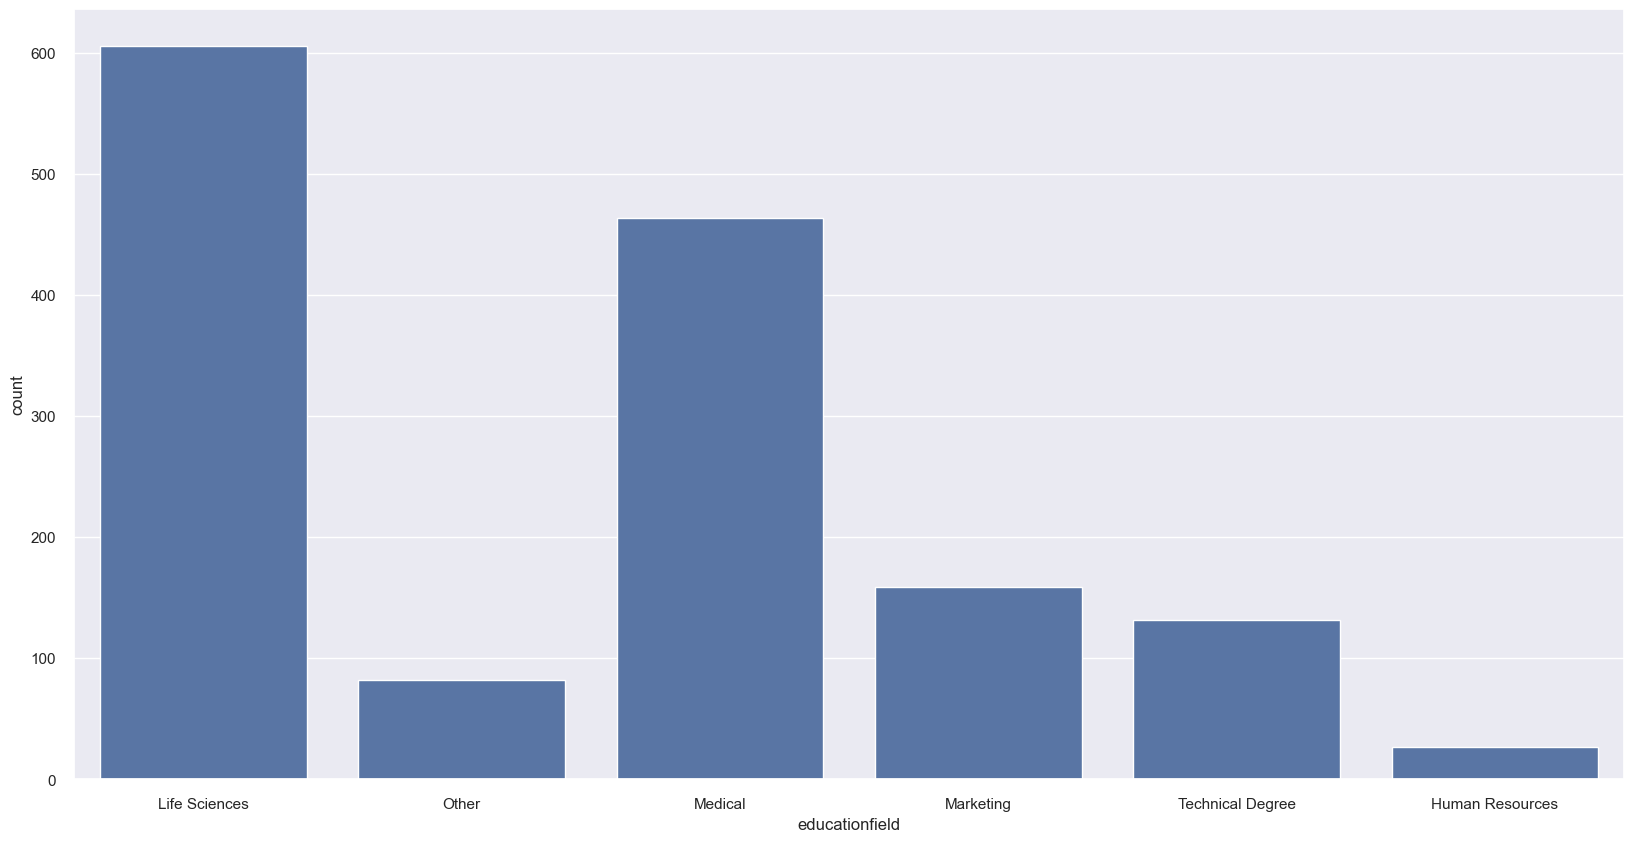



##########################################


        gender  Ratio  TARGET_SUM
gender                           
Female     588 40.000          87
Male       882 60.000         150




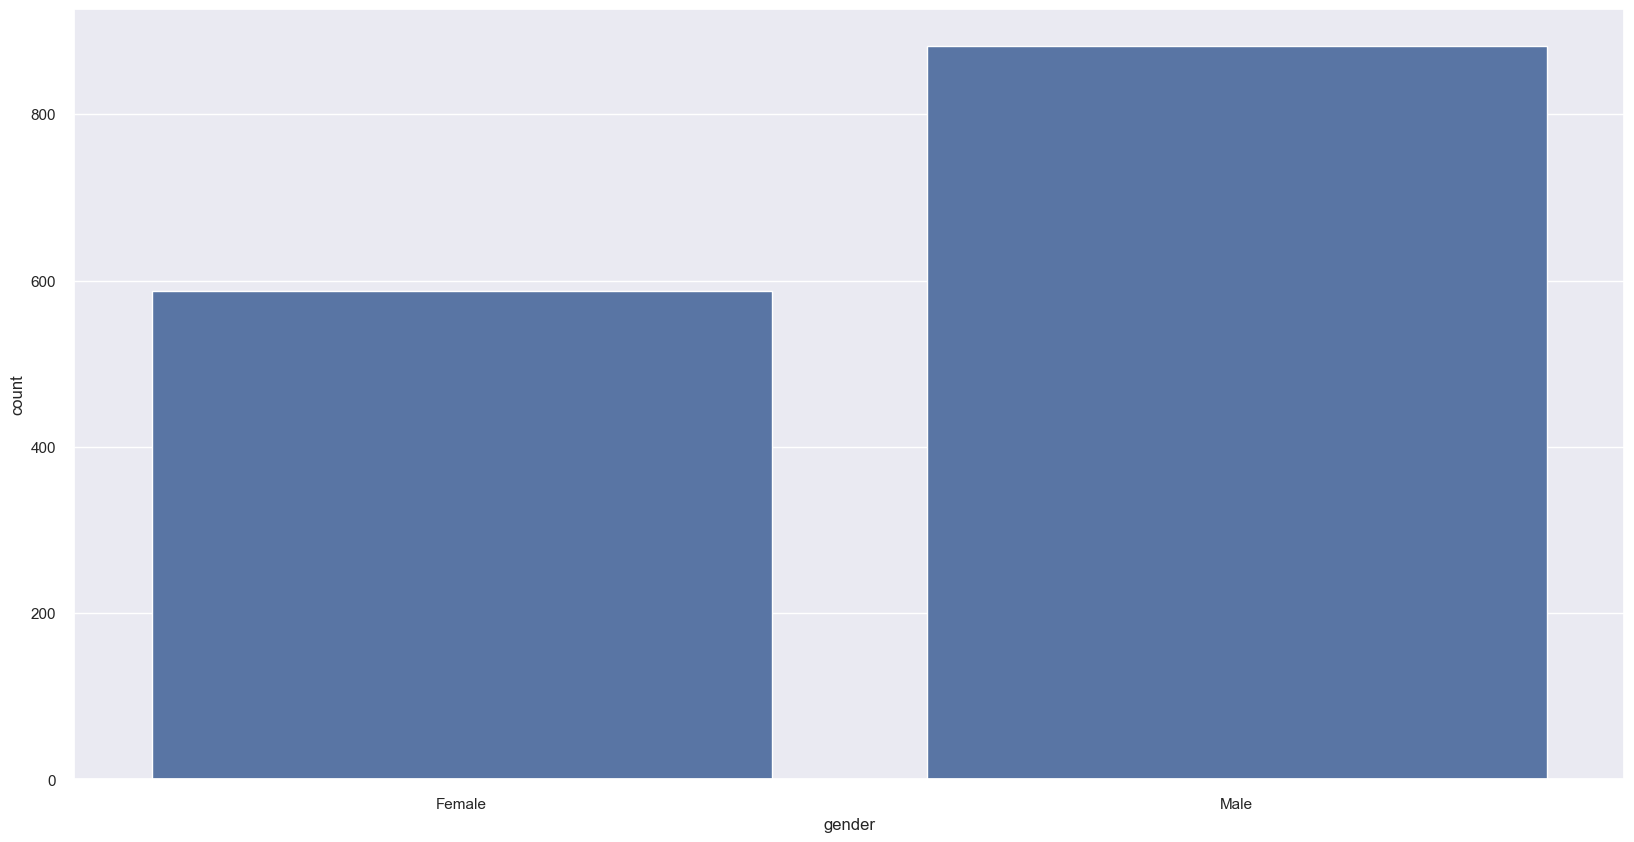



##########################################


                           jobrole  Ratio  TARGET_SUM
jobrole                                              
Healthcare Representative      131  8.912           9
Human Resources                 52  3.537          12
Laboratory Technician          259 17.619          62
Manager                        102  6.939           5
Manufacturing Director         145  9.864          10
Research Director               80  5.442           2
Research Scientist             292 19.864          47
Sales Executive                326 22.177          57
Sales Representative            83  5.646          33




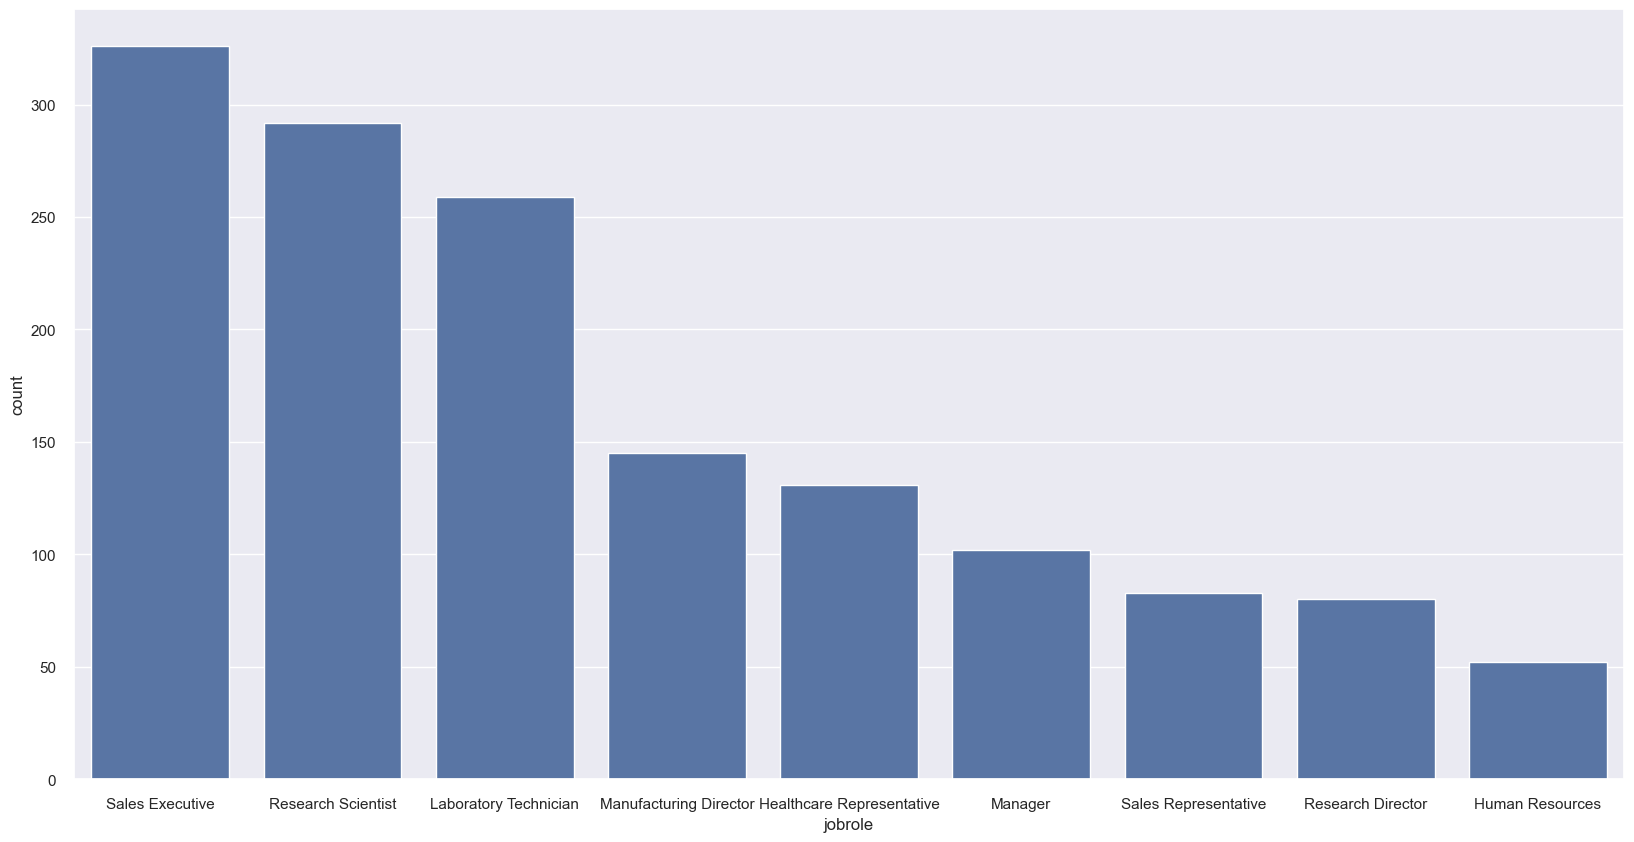



##########################################


               maritalstatus  Ratio  TARGET_SUM
maritalstatus                                  
Divorced                 327 22.245          33
Married                  673 45.782          84
Single                   470 31.973         120




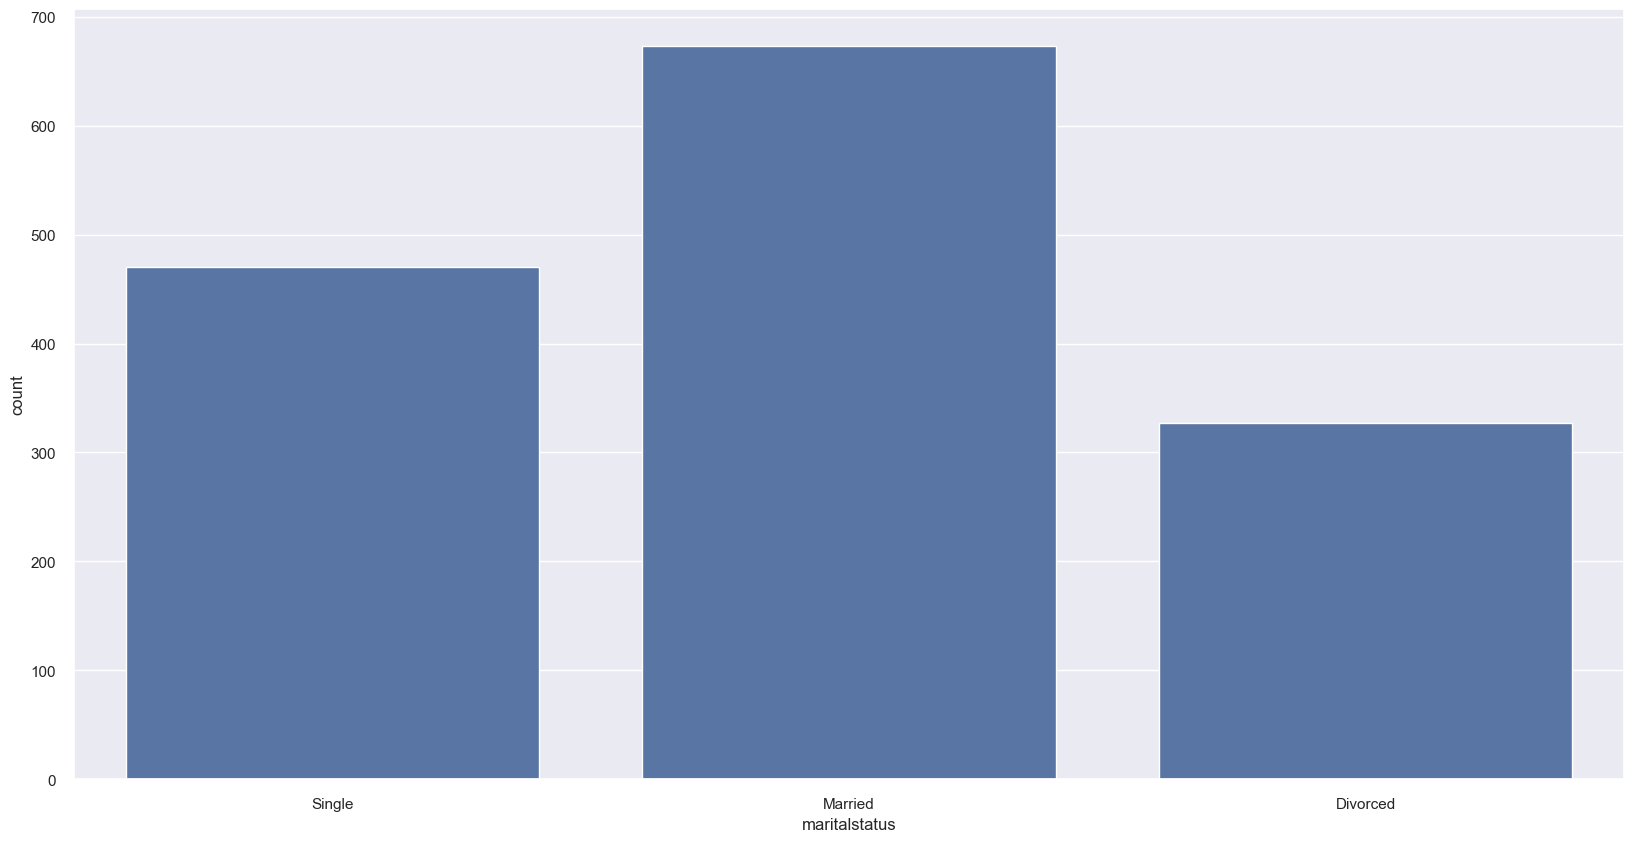



##########################################


          overtime  Ratio  TARGET_SUM
overtime                             
No            1054 71.701         110
Yes            416 28.299         127




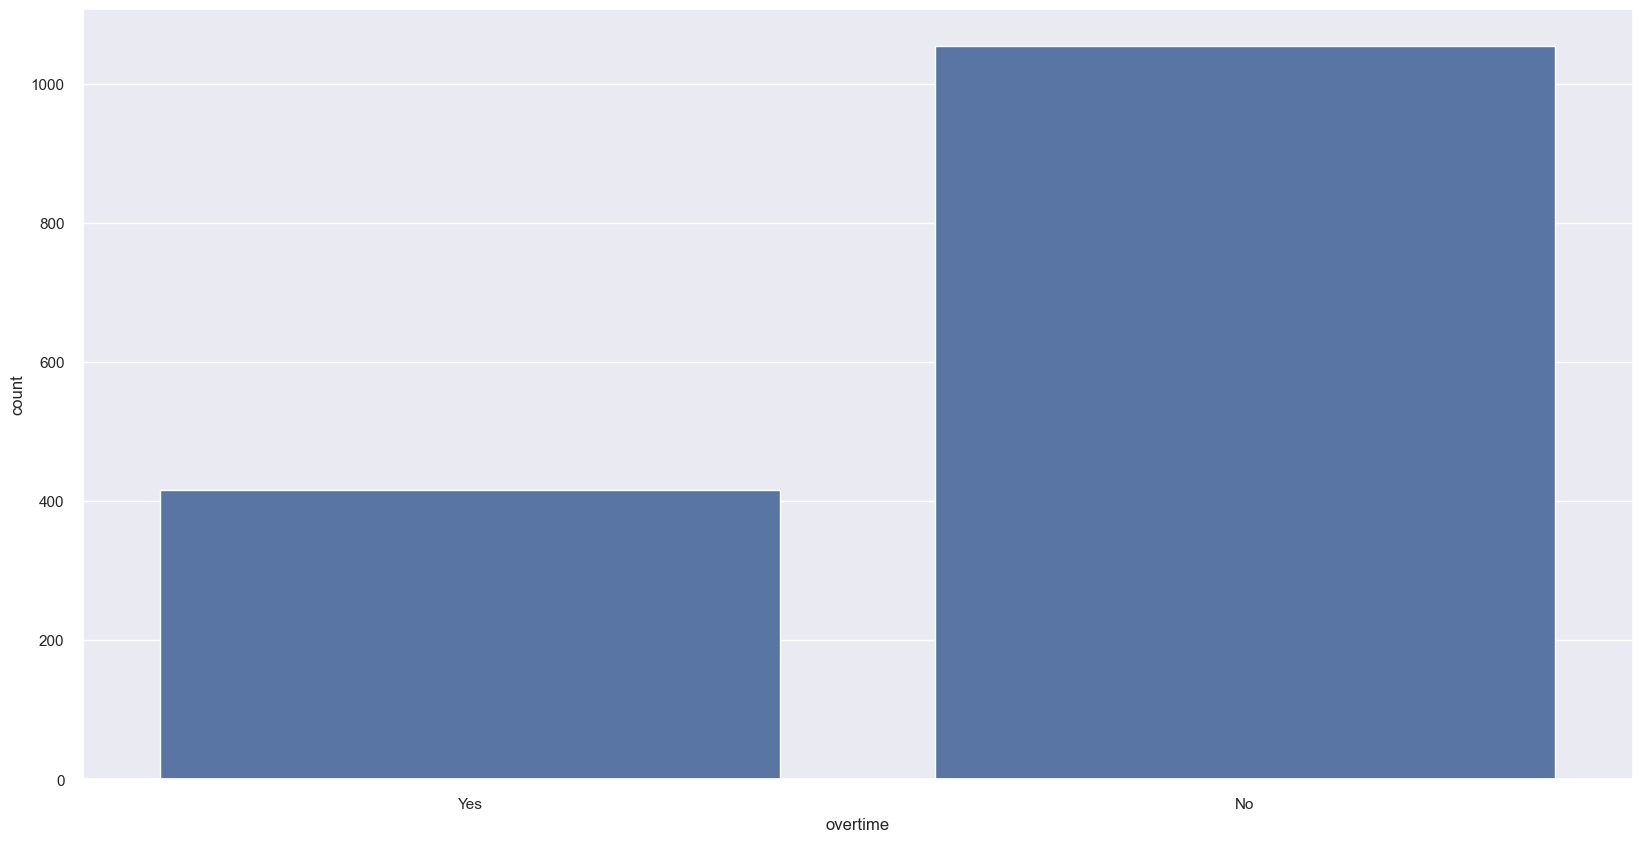



##########################################


           education  Ratio  TARGET_SUM
education                              
1                170 11.565          31
2                282 19.184          44
3                572 38.912          99
4                398 27.075          58
5                 48  3.265           5




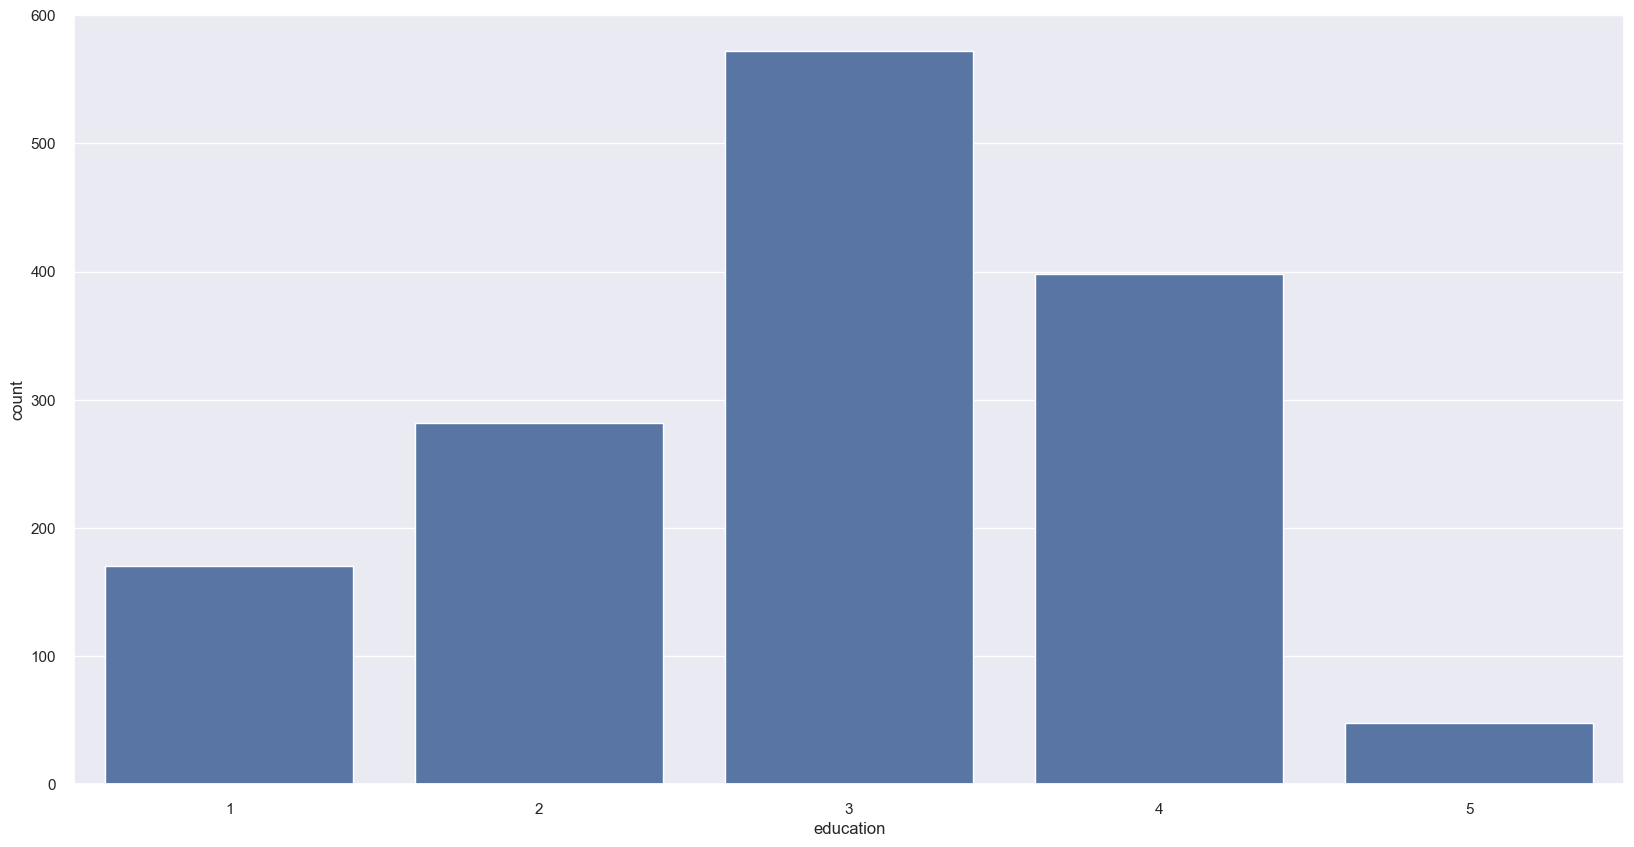



##########################################


                         environmentsatisfaction  Ratio  TARGET_SUM
environmentsatisfaction                                            
1                                            284 19.320          72
2                                            287 19.524          43
3                                            453 30.816          62
4                                            446 30.340          60




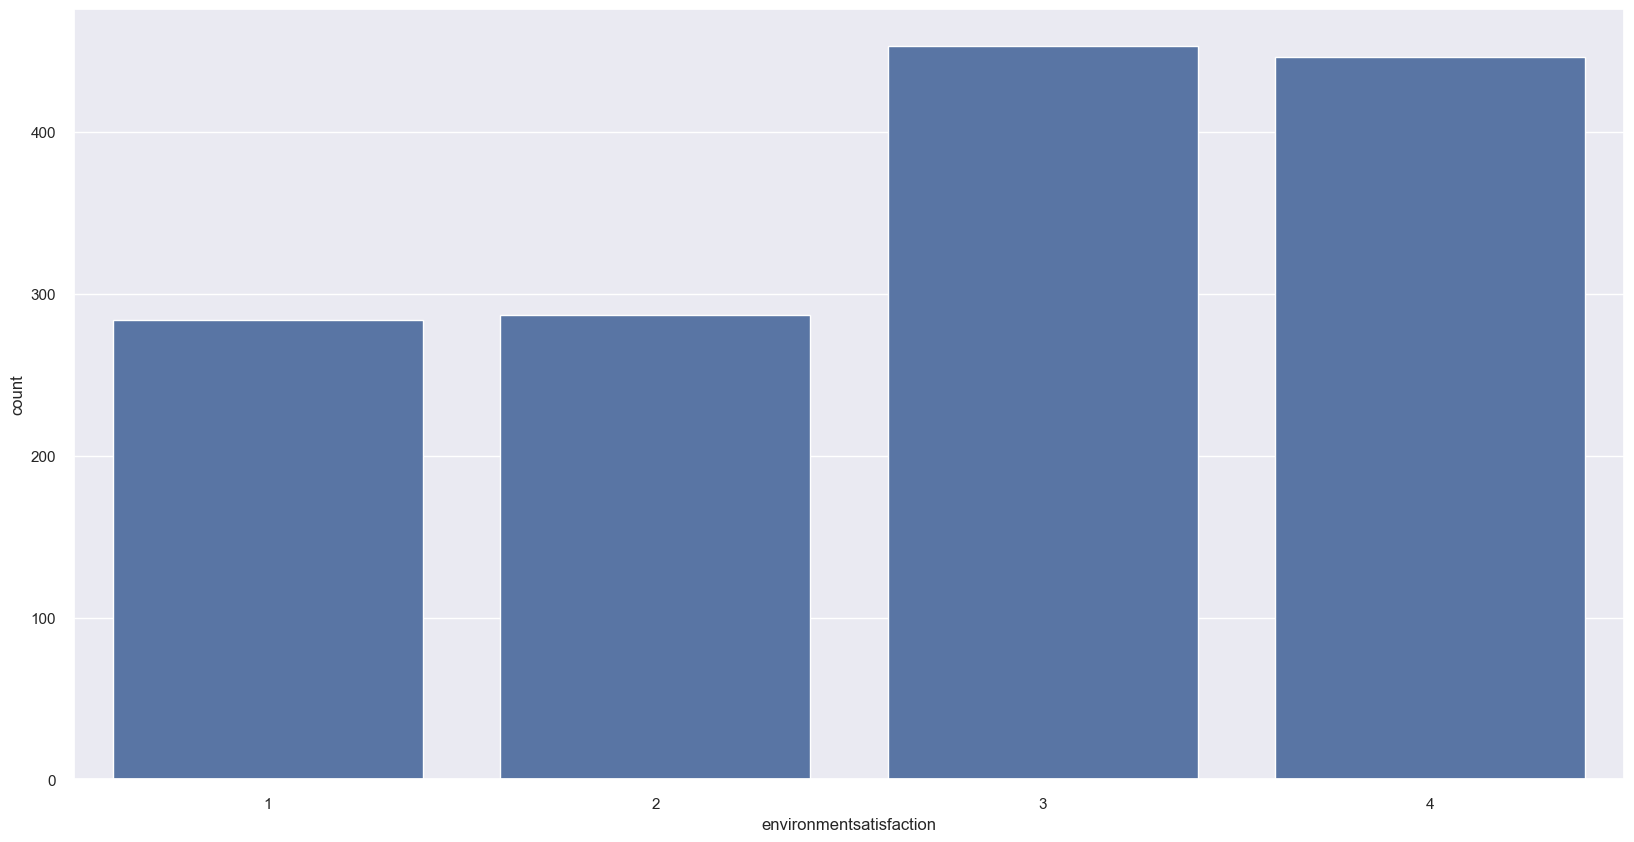



##########################################


                jobinvolvement  Ratio  TARGET_SUM
jobinvolvement                                   
1                           83  5.646          28
2                          375 25.510          71
3                          868 59.048         125
4                          144  9.796          13




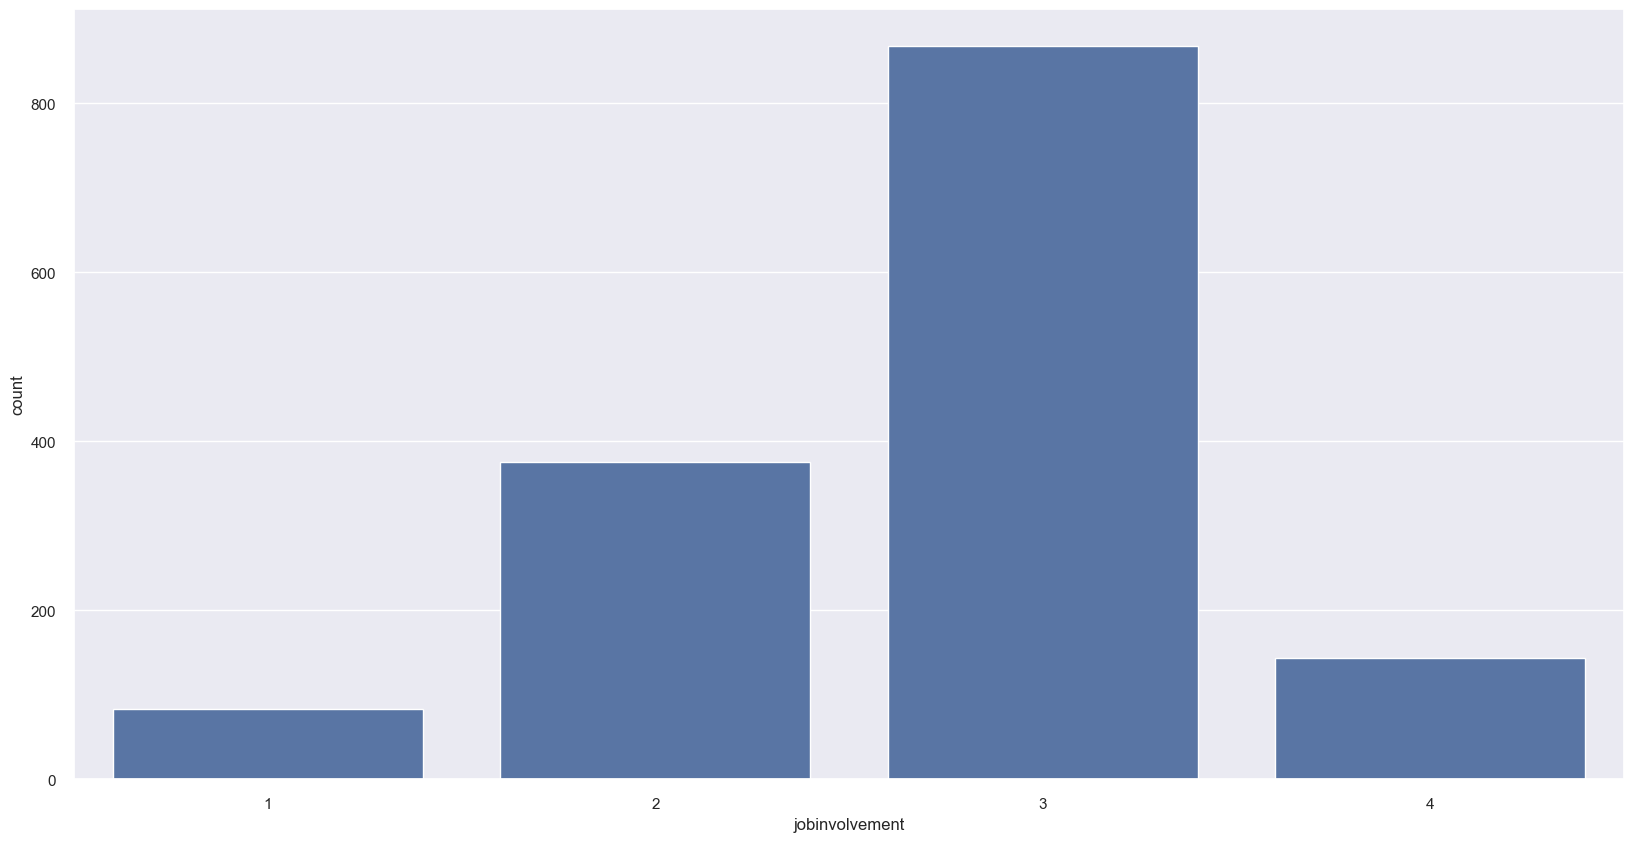



##########################################


          joblevel  Ratio  TARGET_SUM
joblevel                             
1              543 36.939         143
2              534 36.327          52
3              218 14.830          32
4              106  7.211           5
5               69  4.694           5




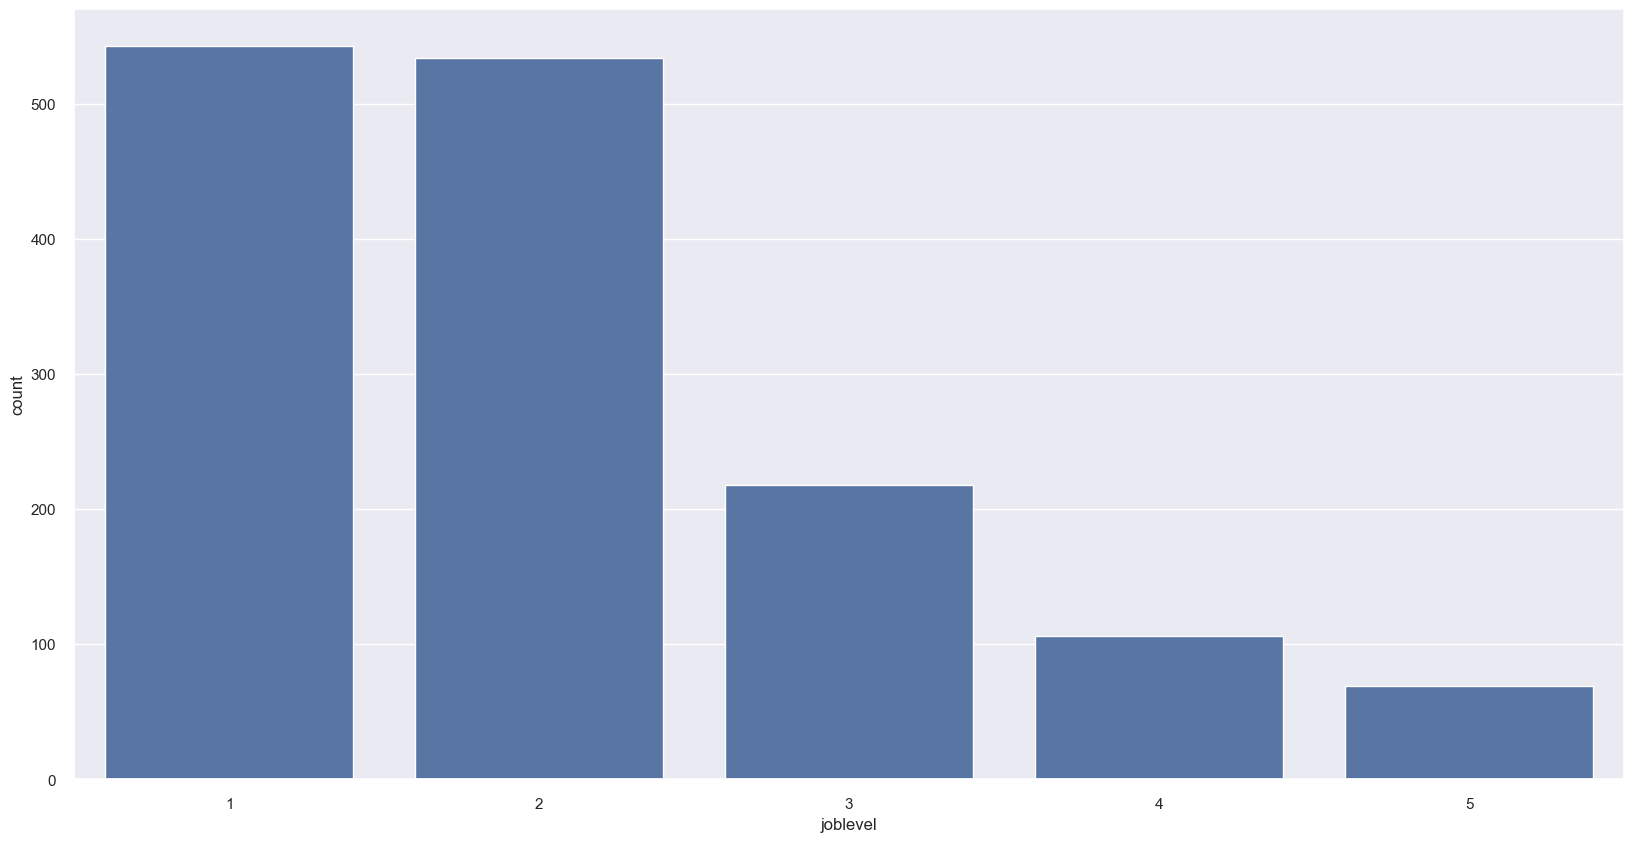



##########################################


                 jobsatisfaction  Ratio  TARGET_SUM
jobsatisfaction                                    
1                            289 19.660          66
2                            280 19.048          46
3                            442 30.068          73
4                            459 31.224          52




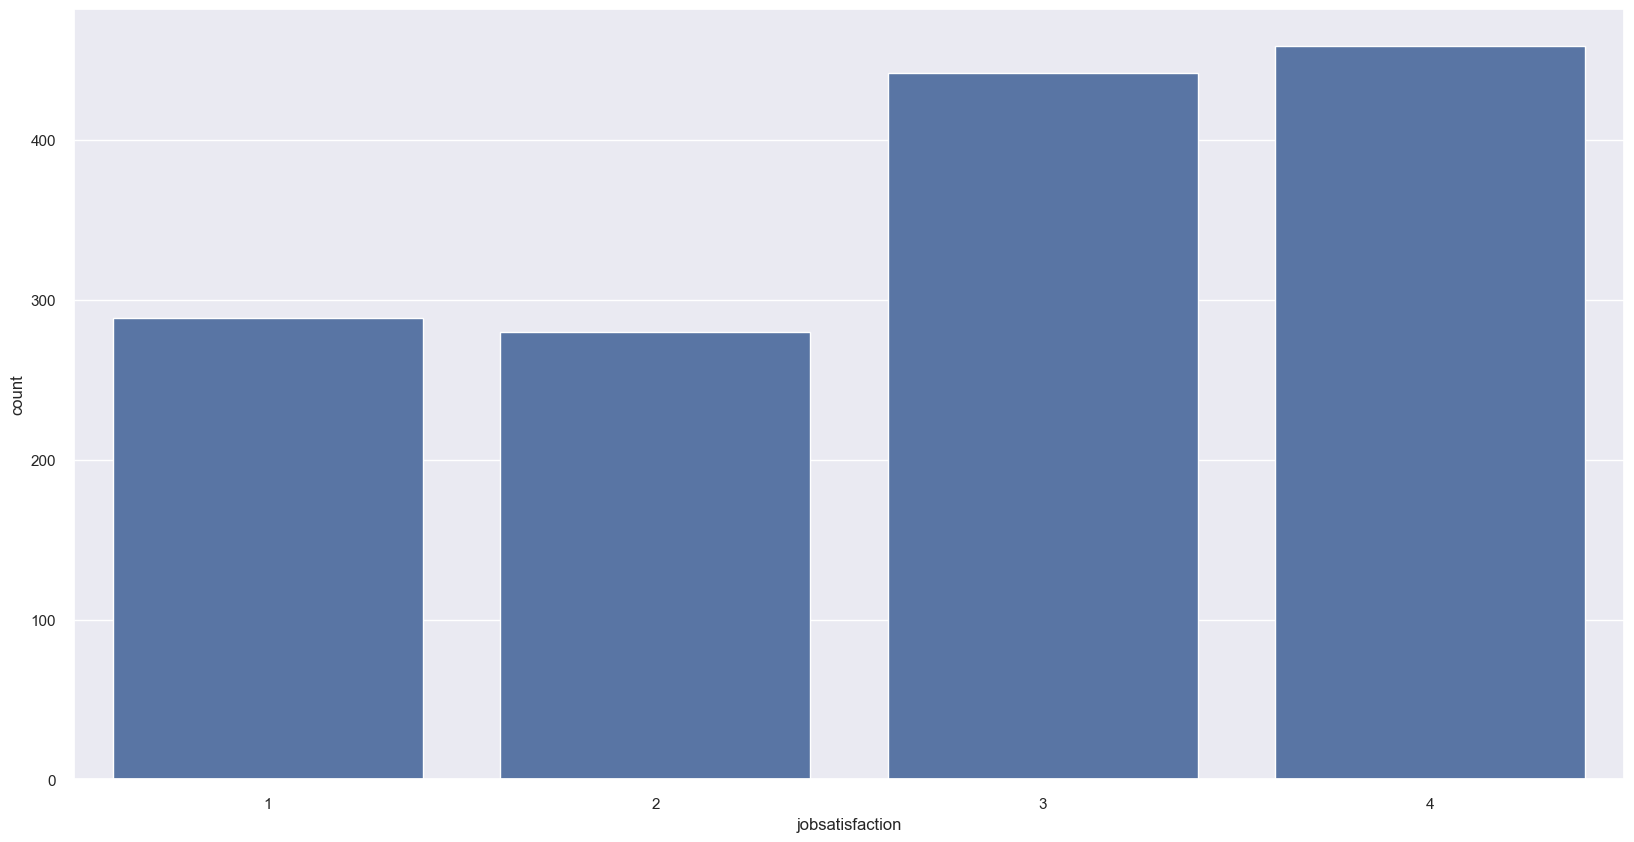



##########################################


                   performancerating  Ratio  TARGET_SUM
performancerating                                      
3                               1244 84.626         200
4                                226 15.374          37




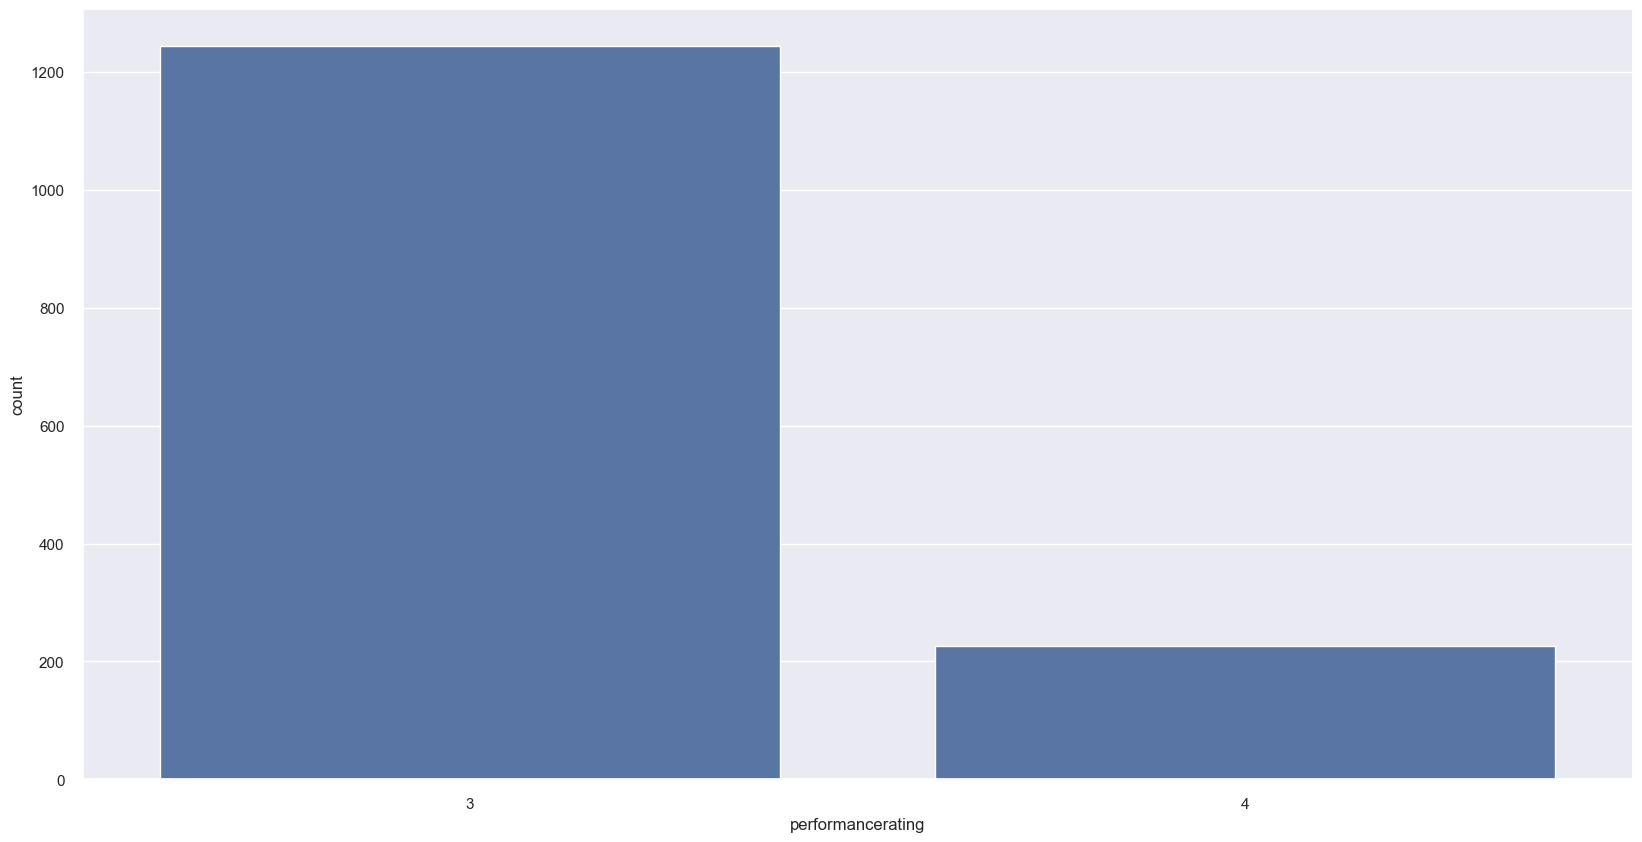



##########################################


                          relationshipsatisfaction  Ratio  TARGET_SUM
relationshipsatisfaction                                             
1                                              276 18.776          57
2                                              303 20.612          45
3                                              459 31.224          71
4                                              432 29.388          64




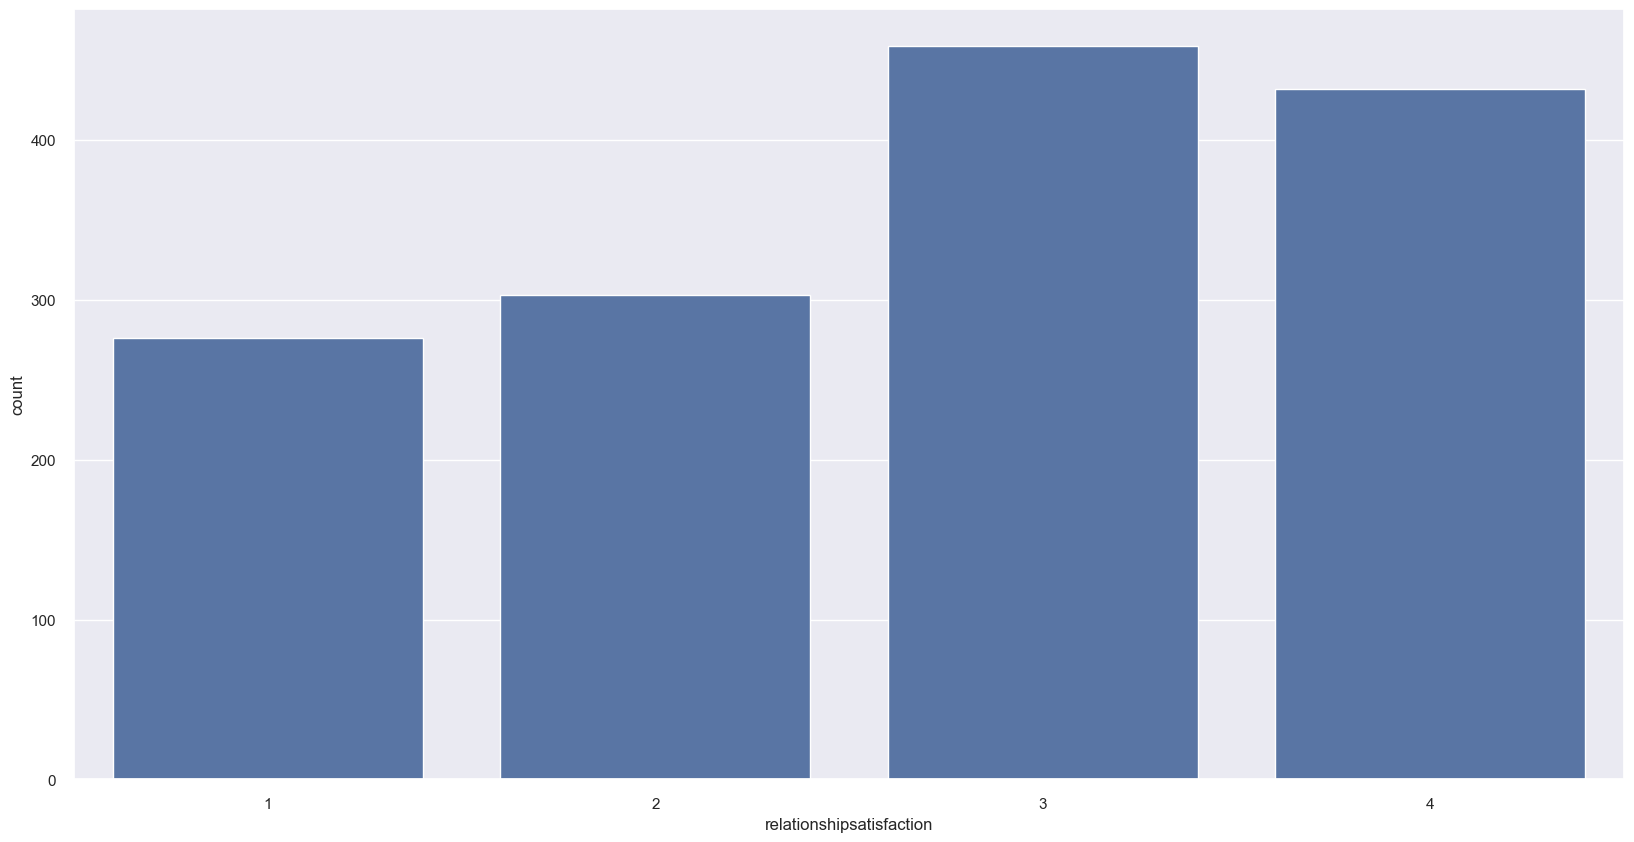



##########################################


                  stockoptionlevel  Ratio  TARGET_SUM
stockoptionlevel                                     
0                              631 42.925         154
1                              596 40.544          56
2                              158 10.748          12
3                               85  5.782          15




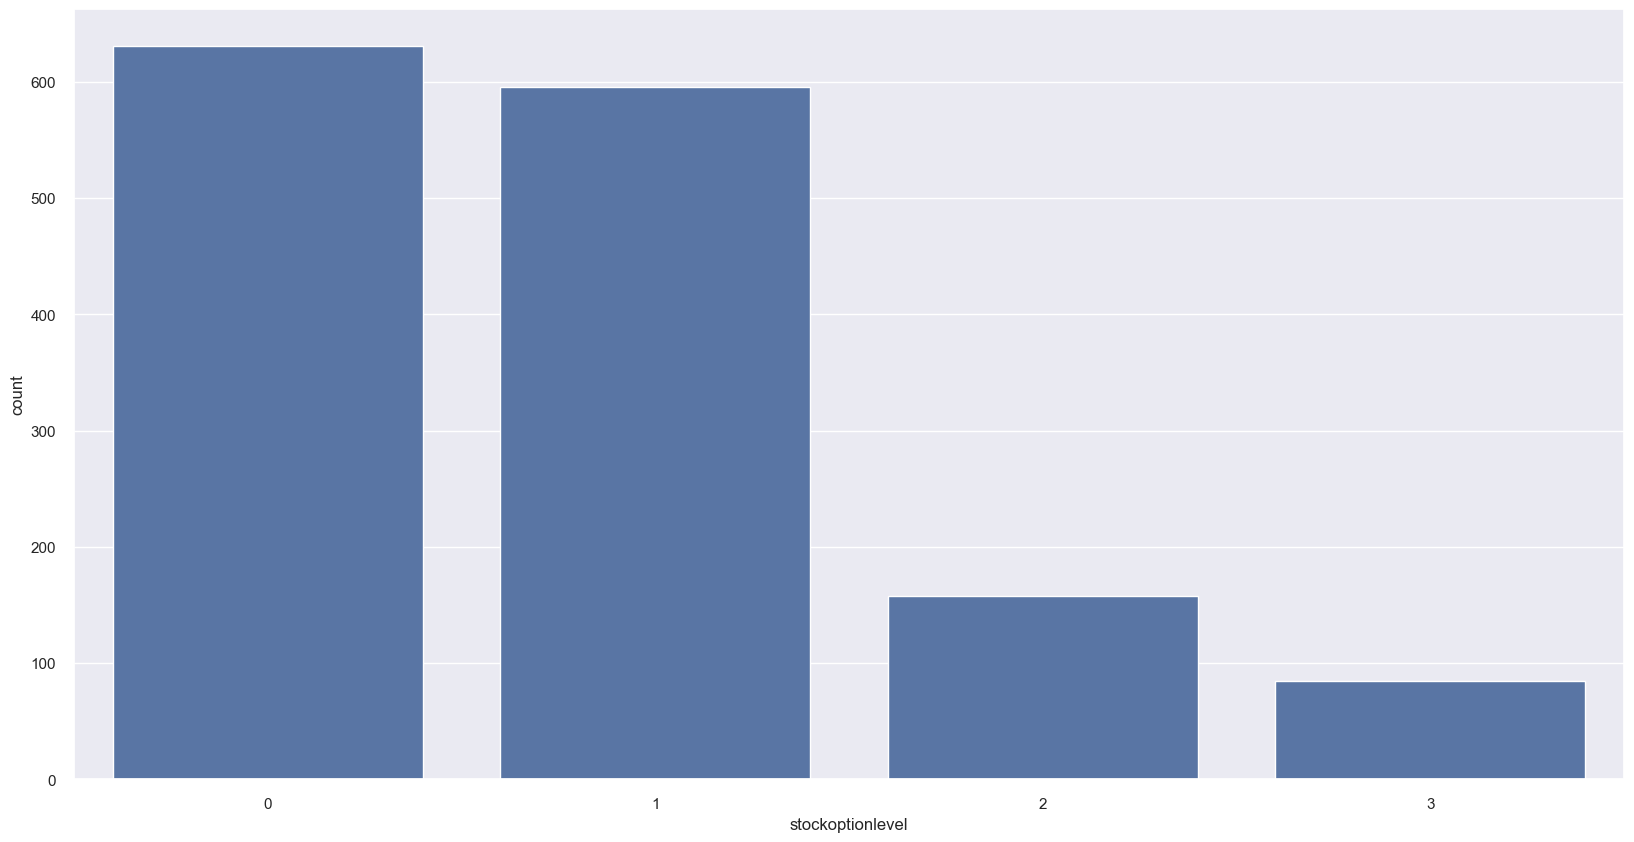



##########################################


                       trainingtimeslastyear  Ratio  TARGET_SUM
trainingtimeslastyear                                          
0                                         54  3.673          15
1                                         71  4.830           9
2                                        547 37.211          98
3                                        491 33.401          69
4                                        123  8.367          26
5                                        119  8.095          14
6                                         65  4.422           6




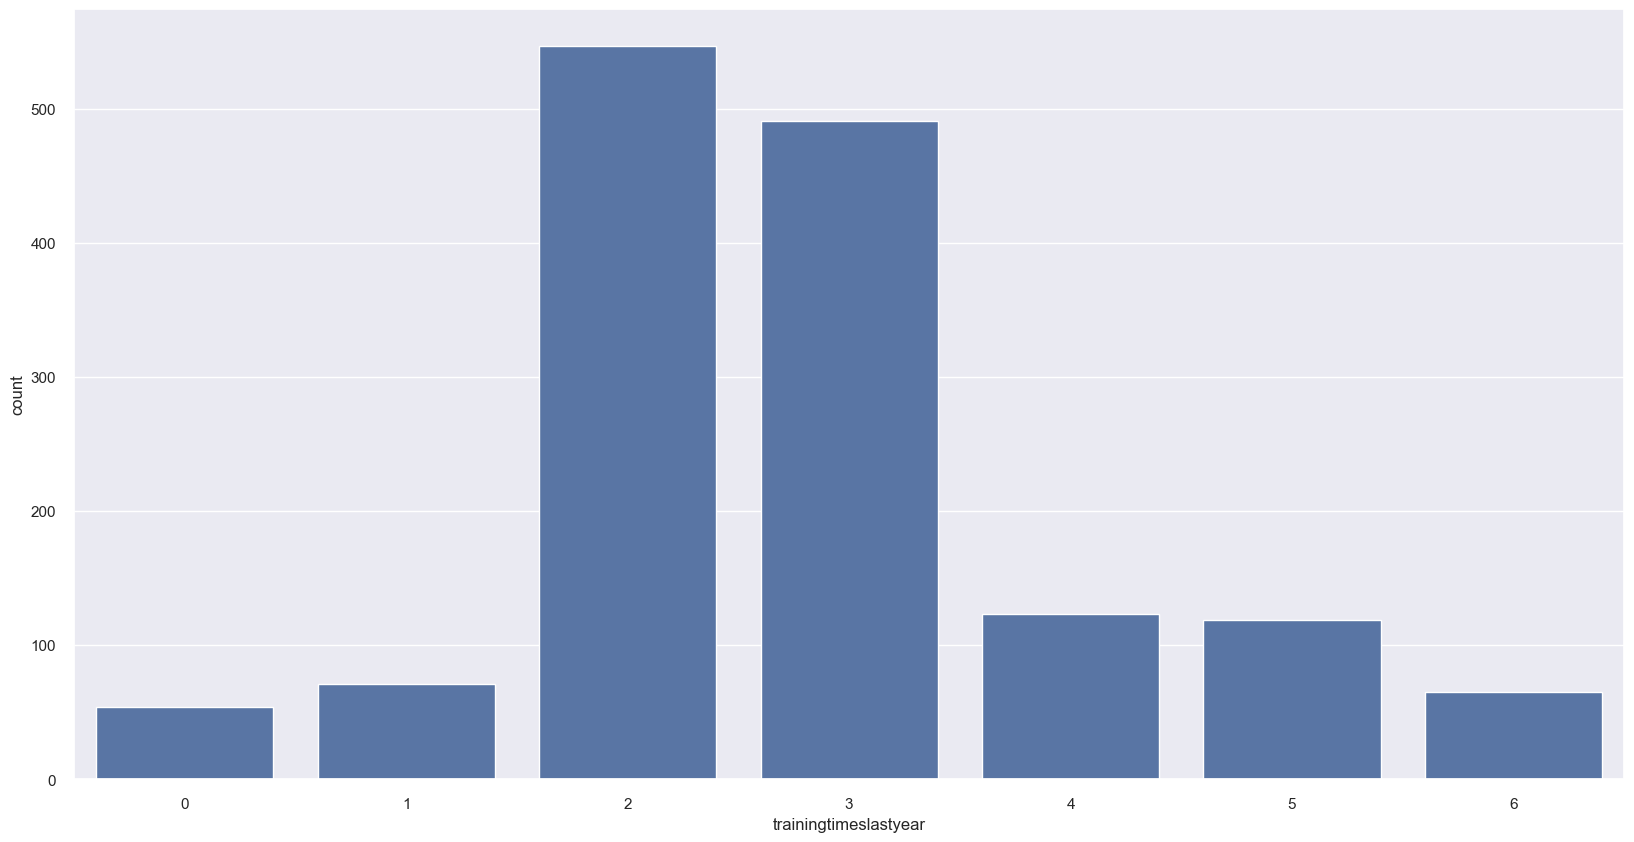



##########################################


                 worklifebalance  Ratio  TARGET_SUM
worklifebalance                                    
1                             80  5.442          25
2                            344 23.401          58
3                            893 60.748         127
4                            153 10.408          27




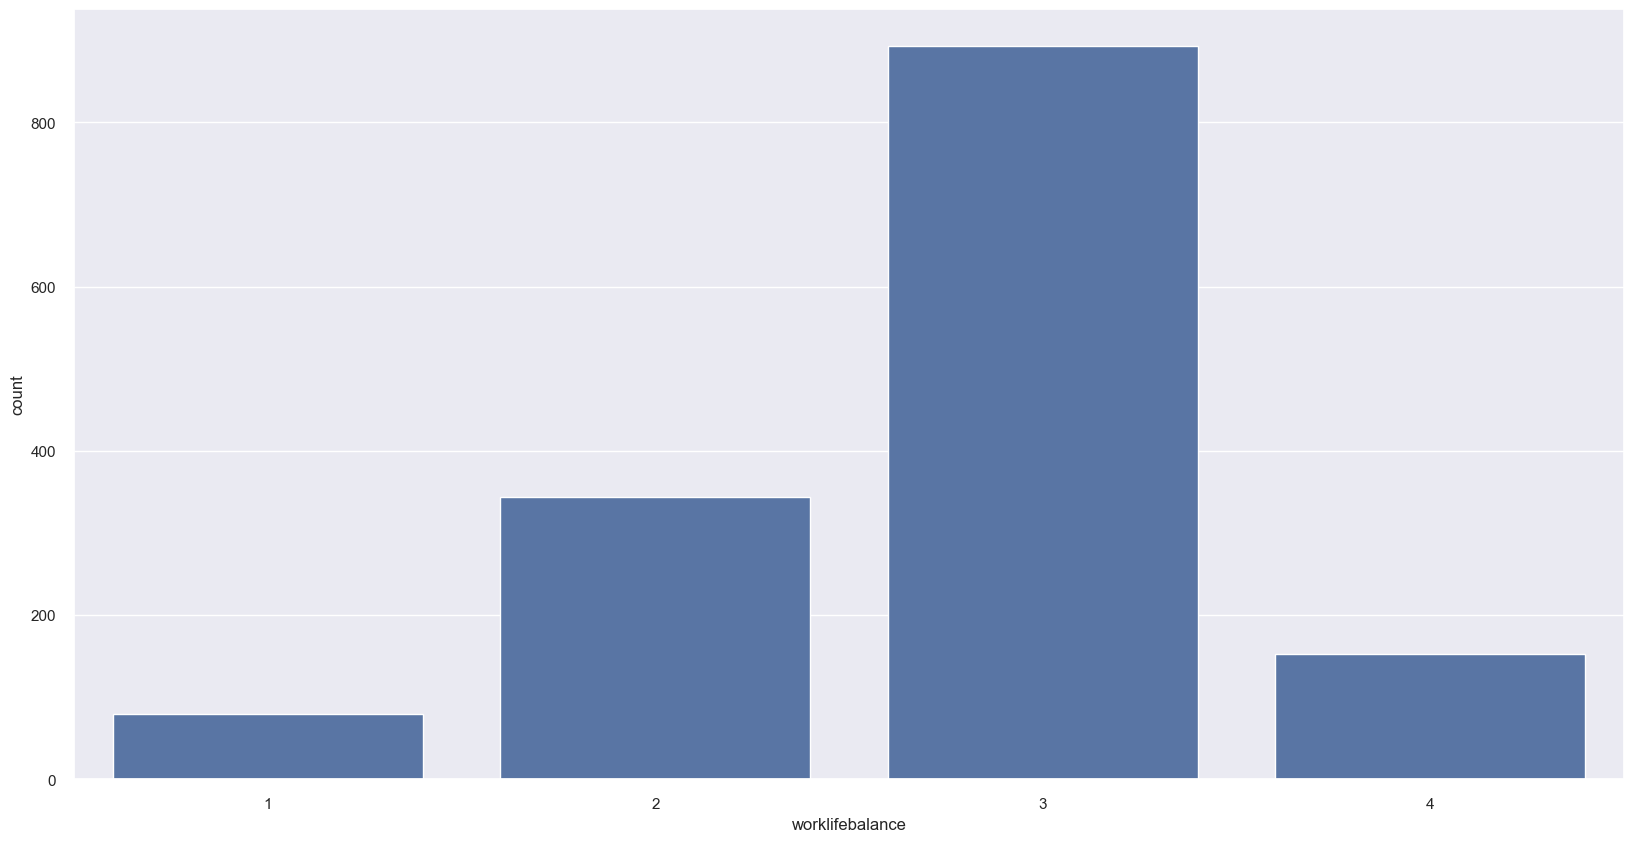



##########################################


      att  Ratio  TARGET_SUM
att                         
0    1233 83.878           0
1     237 16.122         237




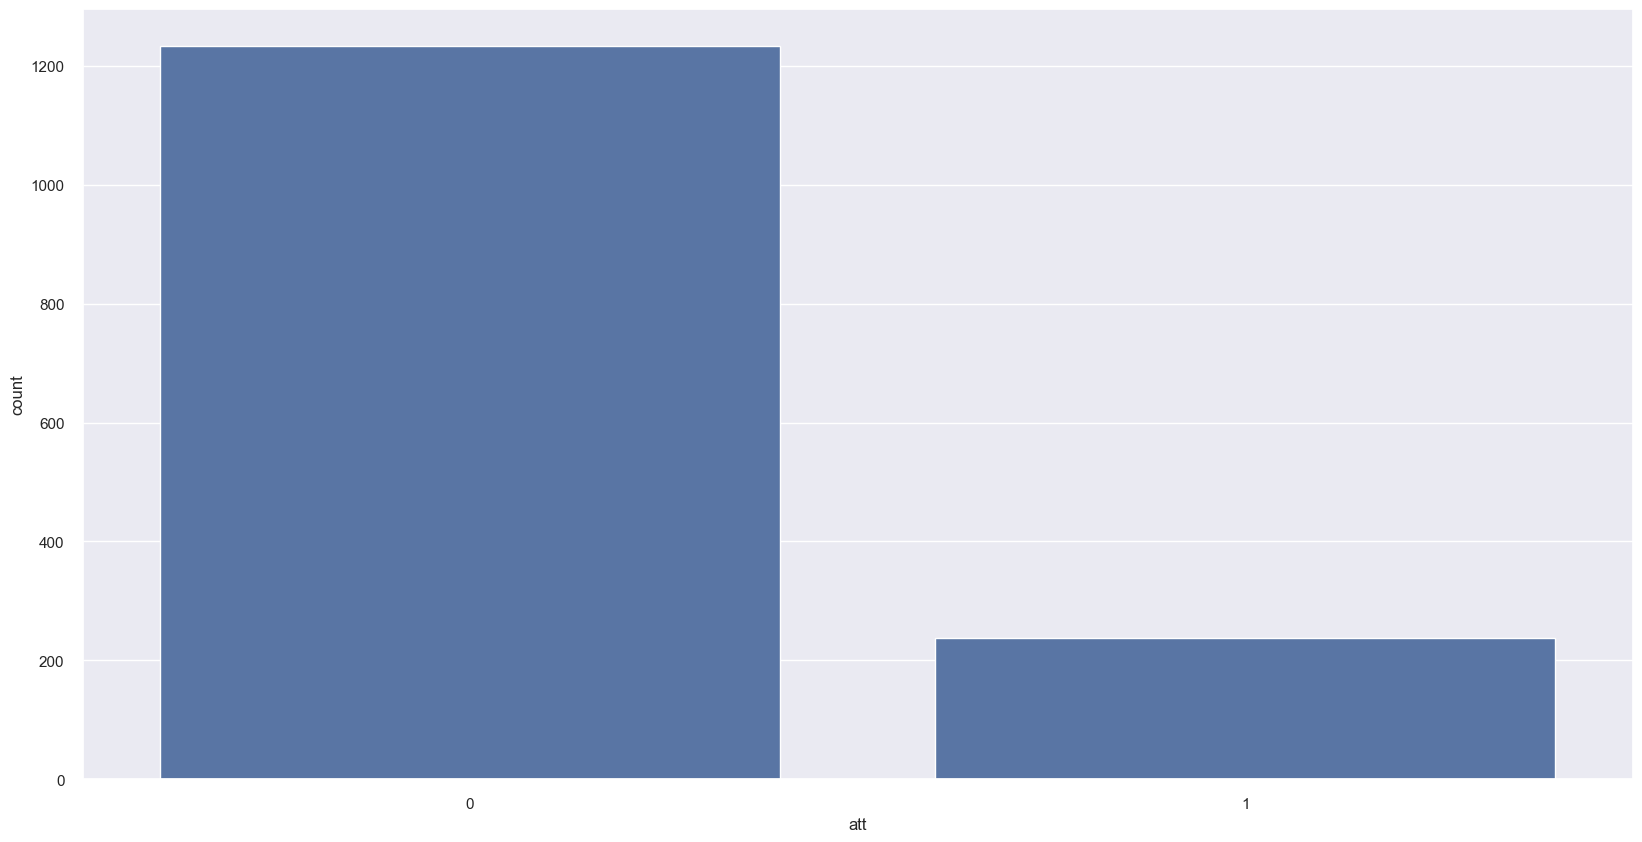



##########################################




In [1201]:
for col in cat_cols:
    cat_summary(hr, col, target="att", plot=True)

## Sayısal Değişken Analizi

In [1203]:
hr.describe([0.01, 0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]).T
# [0.10, 0.25, 0.50, 0.75, 0.90]
# Boxplot, scatter plot, bar plot vb diğer bütün görselleştirmeleri sayısal değişken analizi için kullanabiliriz.

count      mean      std      min       1%       5%      10%      20%      30%       40%       50%       60%       70%       80%       90%       95%       99%       max
age                      1470.000    36.924    9.135   18.000   19.000   24.000   26.000   29.000   31.000    34.000    36.000    38.000    41.000    45.000    50.000    54.000    58.310    60.000
dailyrate                1470.000   802.486  403.509  102.000  117.000  165.350  242.800  391.800  530.700   656.200   802.000   942.400  1094.600  1224.200  1356.000  1424.100  1485.000  1499.000
distancefromhome         1470.000     9.193    8.107    1.000    1.000    1.000    1.000    2.000    3.000     5.000     7.000     9.000    11.000    17.000    23.000    26.000    29.000    29.000
education                1470.000     2.913    1.024    1.000    1.000    1.000    1.000    2.000    2.000     3.000     3.000     3.000     4.000     4.000     4.000     4.000     5.000     5.000
employeenumber           1470.000  1024.865  602.024    1.000   19.690   96.450  198.900  402.600  590.700   814.200  1020.500  1235.800  1448.300  1654.200  1857.100  1967.550  2046.620  2068.000
environmentsatisfaction  1470.000     2.722    1.093    1.000    1.000    1.000    1.000    2.000    2.000     3.000     3.000     3.000     4.000     4.000     4.000     4.000     4.000     4.000
hourlyrate               1470.000    65.891   20.329   30.000   30.000   33.000   38.000   45.000   52.000    59.000    66.000    73.000    80.000    87.000    94.000    97.000   100.000   100.000
jobinvolvement           1470.000     2.730    0.712    1.000    1.000    1.000    2.000    2.000    2.000     3.000     3.000     3.000     3.000     3.000     3.000     4.000     4.000     4.000
joblevel                 1470.000     2.064    1.107    1.000    1.000    1.000    1.000    1.000    1.000     2.000     2.000     2.000     2.000     3.000     4.000     4.000     5.000     5.000
jobsatisfaction          1470.000     2.729    1.103    1.000    1.000    1.000    1.000    2.000    2.000     3.000     3.000     3.000     4.000     4.000     4.000     4.000     4.000     4.000
monthlyincome            1470.000  6502.931 4707.957 1009.000 1382.460 2097.900 2317.600 2695.800 3316.900  4228.800  4919.000  5743.400  6886.000  9860.000 13775.600 17821.350 19626.310 19999.000
monthlyrate              1470.000 14313.103 7117.786 2094.000 2325.070 3384.550 4603.000 6887.400 9255.700 11773.000 14235.500 16714.200 19376.000 21712.000 24001.700 25431.900 26704.240 26999.000
numcompaniesworked       1470.000     2.693    2.498    0.000    0.000    0.000    0.000    1.000    1.000     1.000     2.000     3.000     4.000     5.000     7.000     8.000     9.000     9.000
percentsalaryhike        1470.000    15.210    3.660   11.000   11.000   11.000   11.000   12.000   13.000    13.000    14.000    15.000    17.000    19.000    21.000    22.000    25.000    25.000
performancerating        1470.000     3.154    0.361    3.000    3.000    3.000    3.000    3.000    3.000     3.000     3.000     3.000     3.000     3.000     4.000     4.000     4.000     4.000
relationshipsatisfaction 1470.000     2.712    1.081    1.000    1.000    1.000    1.000    2.000    2.000     3.000     3.000     3.000     3.000     4.000     4.000     4.000     4.000     4.000
stockoptionlevel         1470.000     0.794    0.852    0.000    0.000    0.000    0.000    0.000    0.000     0.000     1.000     1.000     1.000     1.000     2.000     3.000     3.000     3.000
totalworkingyears        1470.000    11.280    7.781    0.000    1.000    1.000    3.000    5.000    6.700     8.000    10.000    10.000    13.000    17.000    23.000    28.000    35.000    40.000
trainingtimeslastyear    1470.000     2.799    1.289    0.000    0.000    1.000    2.000    2.000    2.000     2.000     3.000     3.000     3.000     4.000     5.000     5.000     6.000     6.000
worklifebalance          1470.000     2.761    0.706    1.000    1.000    1.000    2.000

### Num_SUMMARY

In [1205]:
def num_summary(dataframe, numerical_col, plot=False):
    quantiles = [0.05, 0.1, 0.25, 0.50, 0.75, 0.90, 0.95]
    print(dataframe[numerical_col].describe(quantiles).T)
    # print("########BU YAZI NEREDE GÖRÜNÜYOR#############")
    
    if plot:
        dataframe[numerical_col].hist()
        plt.xlabel(numerical_col)
        plt.title(numerical_col)
        plt.show(block=True)

    print("#####################")
    print(" ")

count   1470.000
mean      36.924
std        9.135
min       18.000
5%        24.000
10%       26.000
25%       30.000
50%       36.000
75%       43.000
90%       50.000
95%       54.000
max       60.000
Name: age, dtype: float64


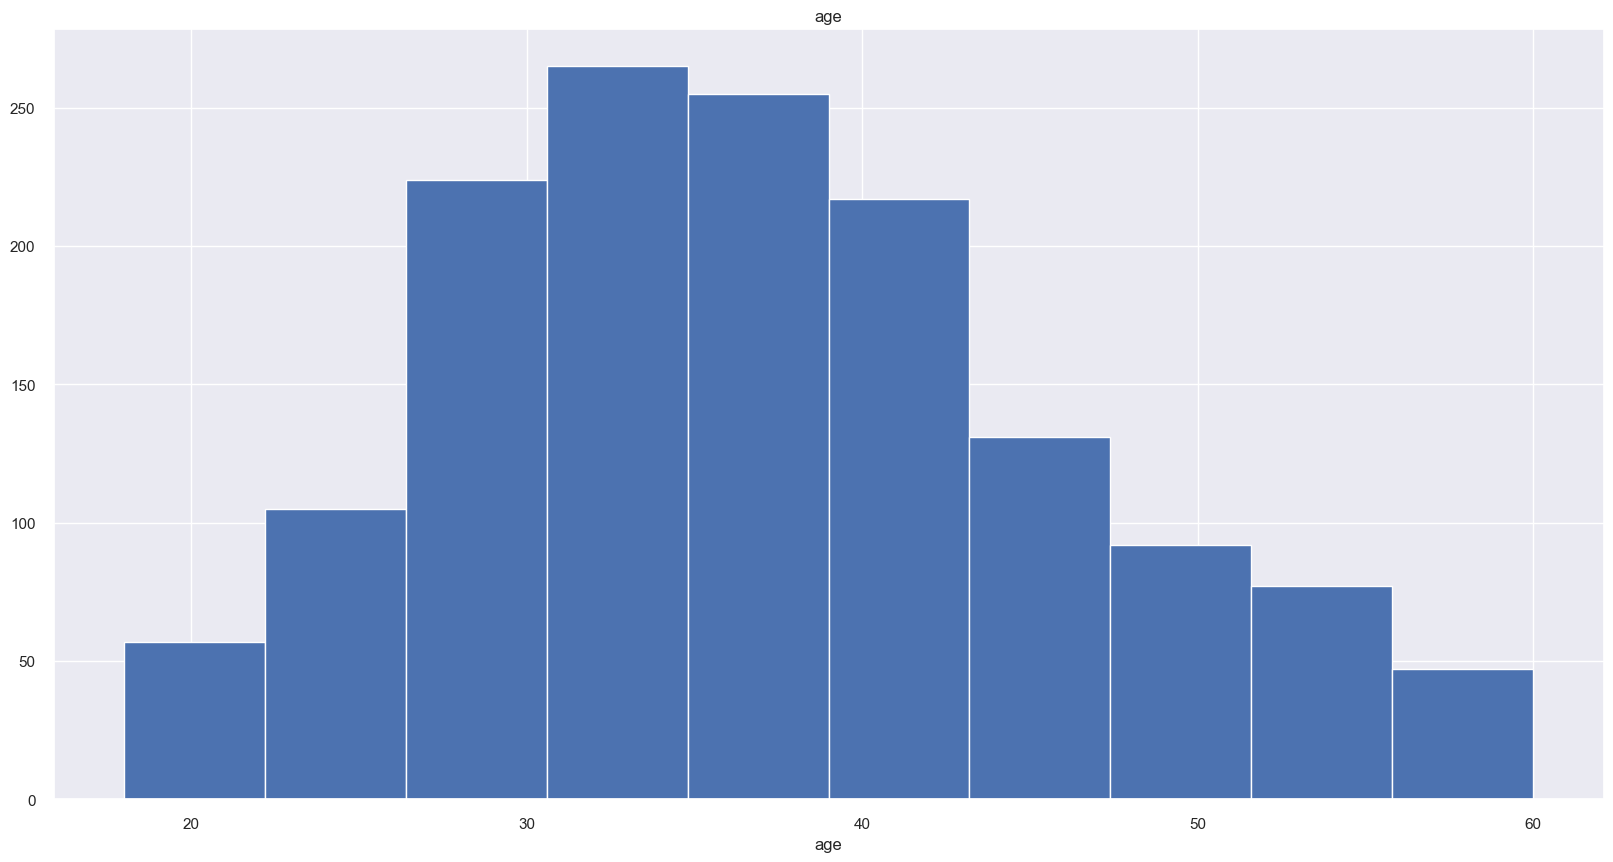

#####################
 
count   1470.000
mean     802.486
std      403.509
min      102.000
5%       165.350
10%      242.800
25%      465.000
50%      802.000
75%     1157.000
90%     1356.000
95%     1424.100
max     1499.000
Name: dailyrate, dtype: float64


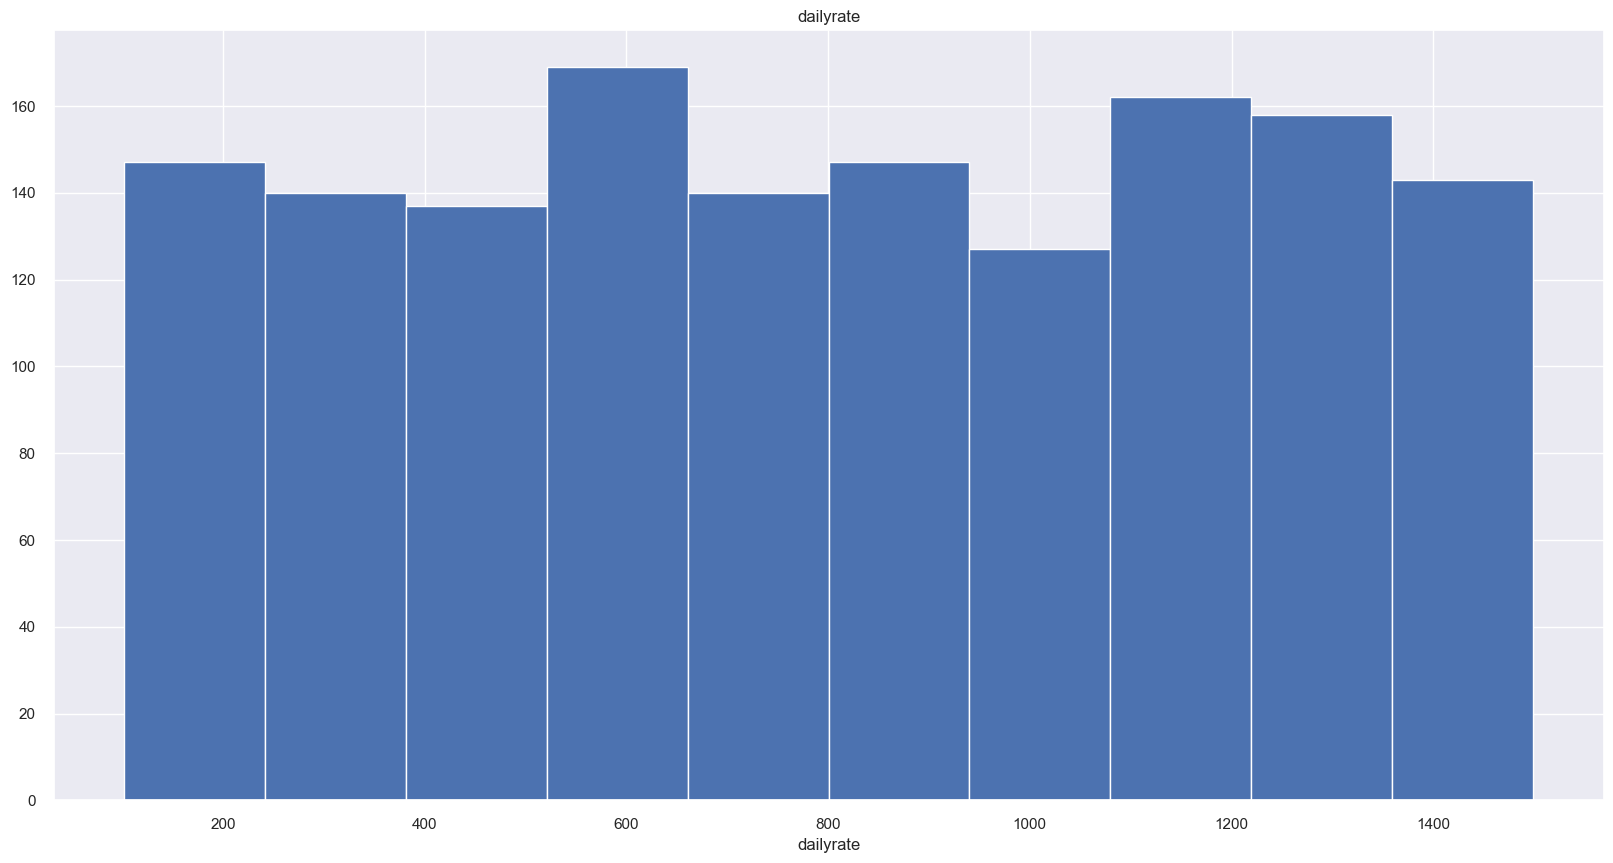

#####################
 
count   1470.000
mean       9.193
std        8.107
min        1.000
5%         1.000
10%        1.000
25%        2.000
50%        7.000
75%       14.000
90%       23.000
95%       26.000
max       29.000
Name: distancefromhome, dtype: float64


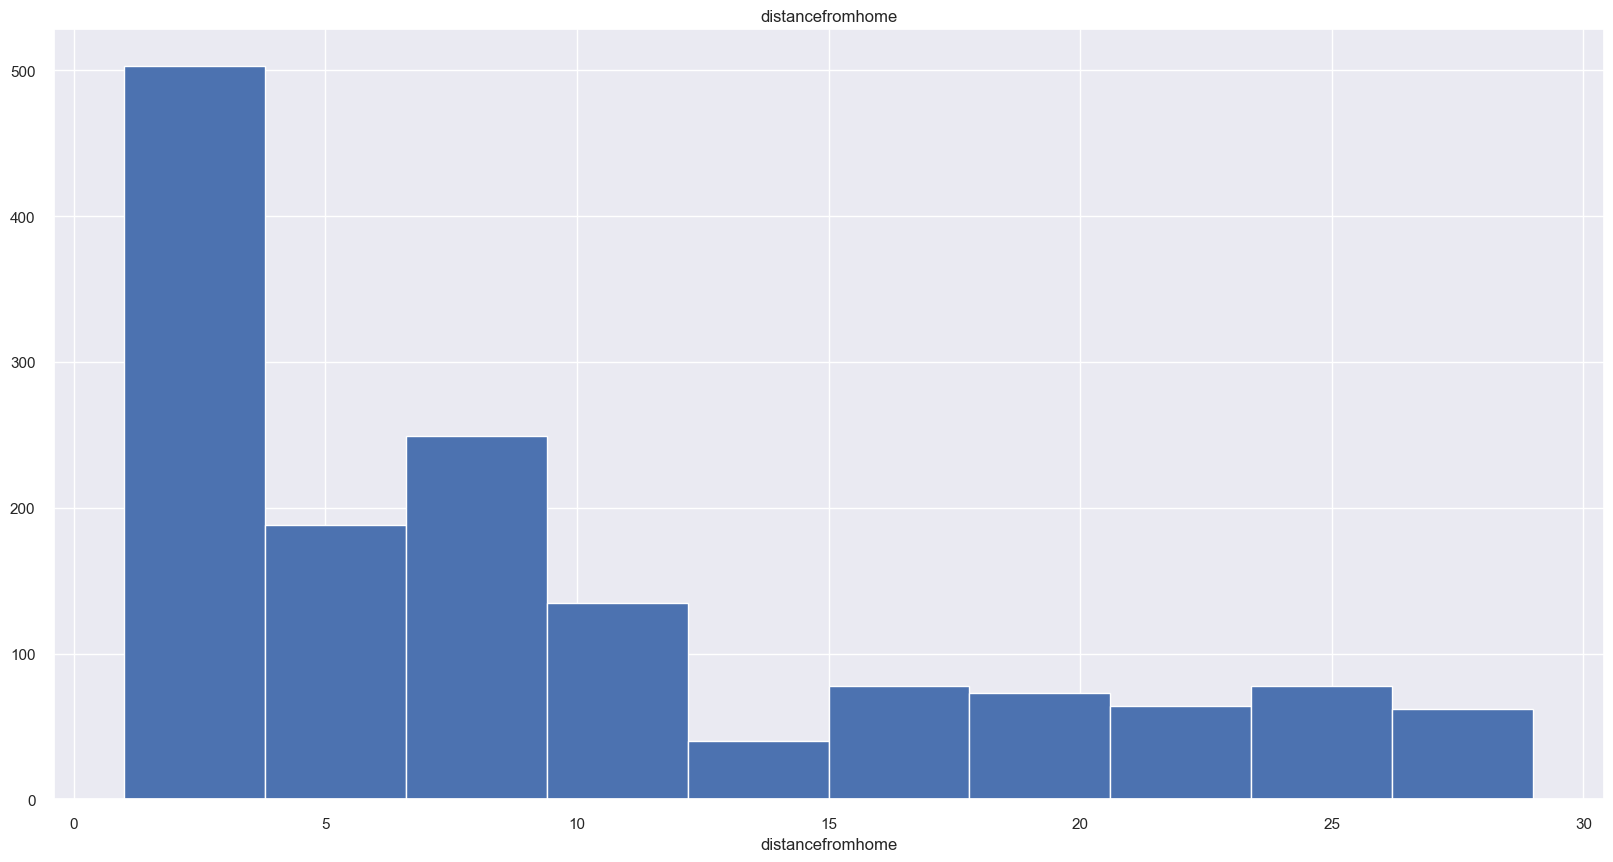

#####################
 
count   1470.000
mean    1024.865
std      602.024
min        1.000
5%        96.450
10%      198.900
25%      491.250
50%     1020.500
75%     1555.750
90%     1857.100
95%     1967.550
max     2068.000
Name: employeenumber, dtype: float64


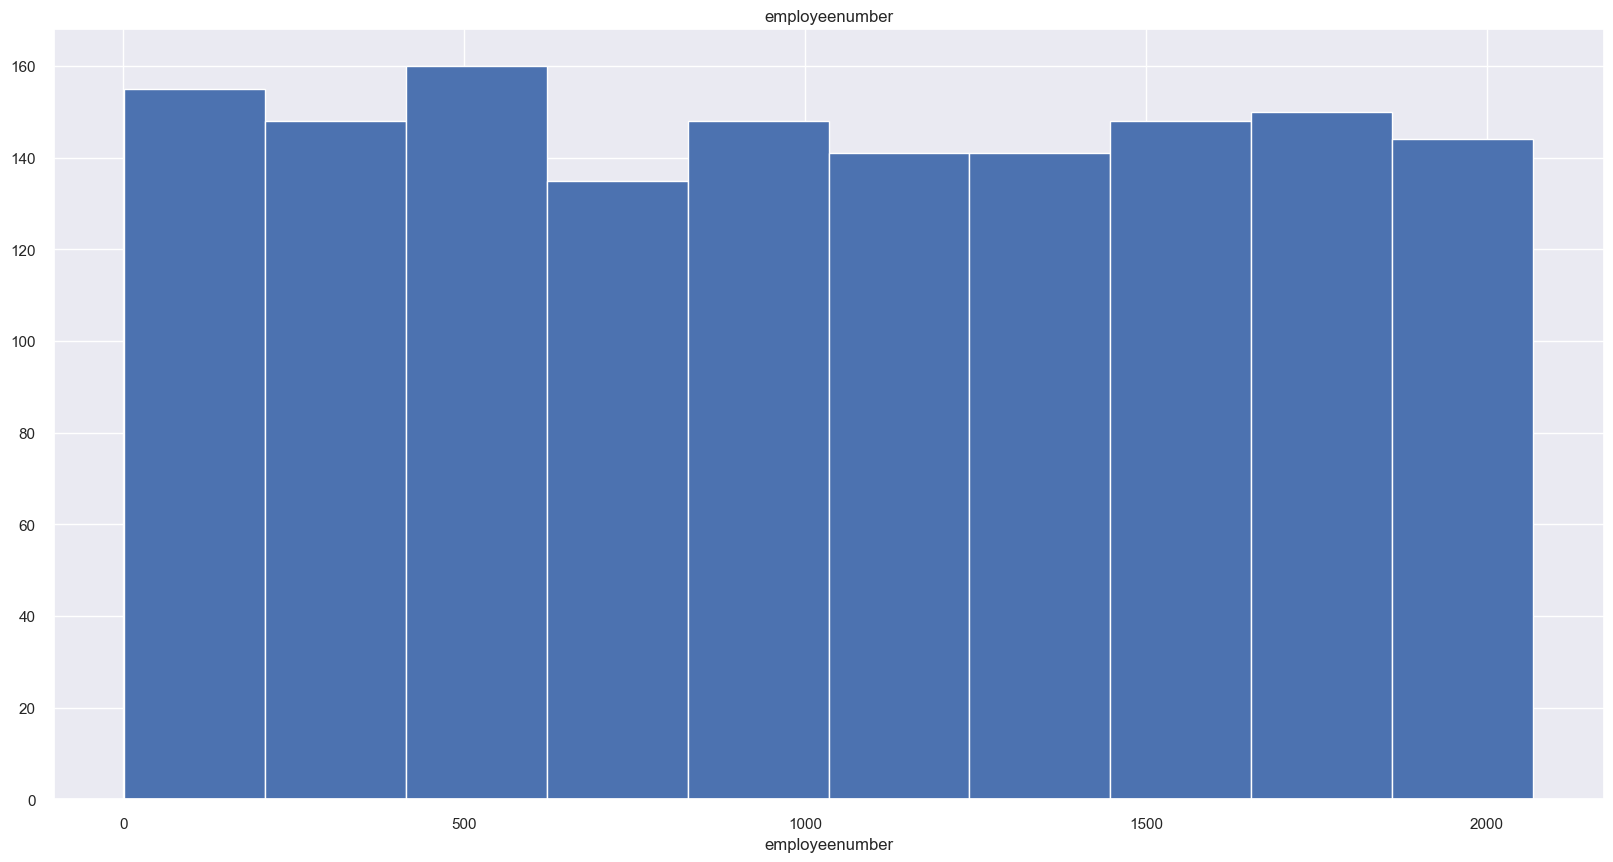

#####################
 
count   1470.000
mean      65.891
std       20.329
min       30.000
5%        33.000
10%       38.000
25%       48.000
50%       66.000
75%       83.750
90%       94.000
95%       97.000
max      100.000
Name: hourlyrate, dtype: float64


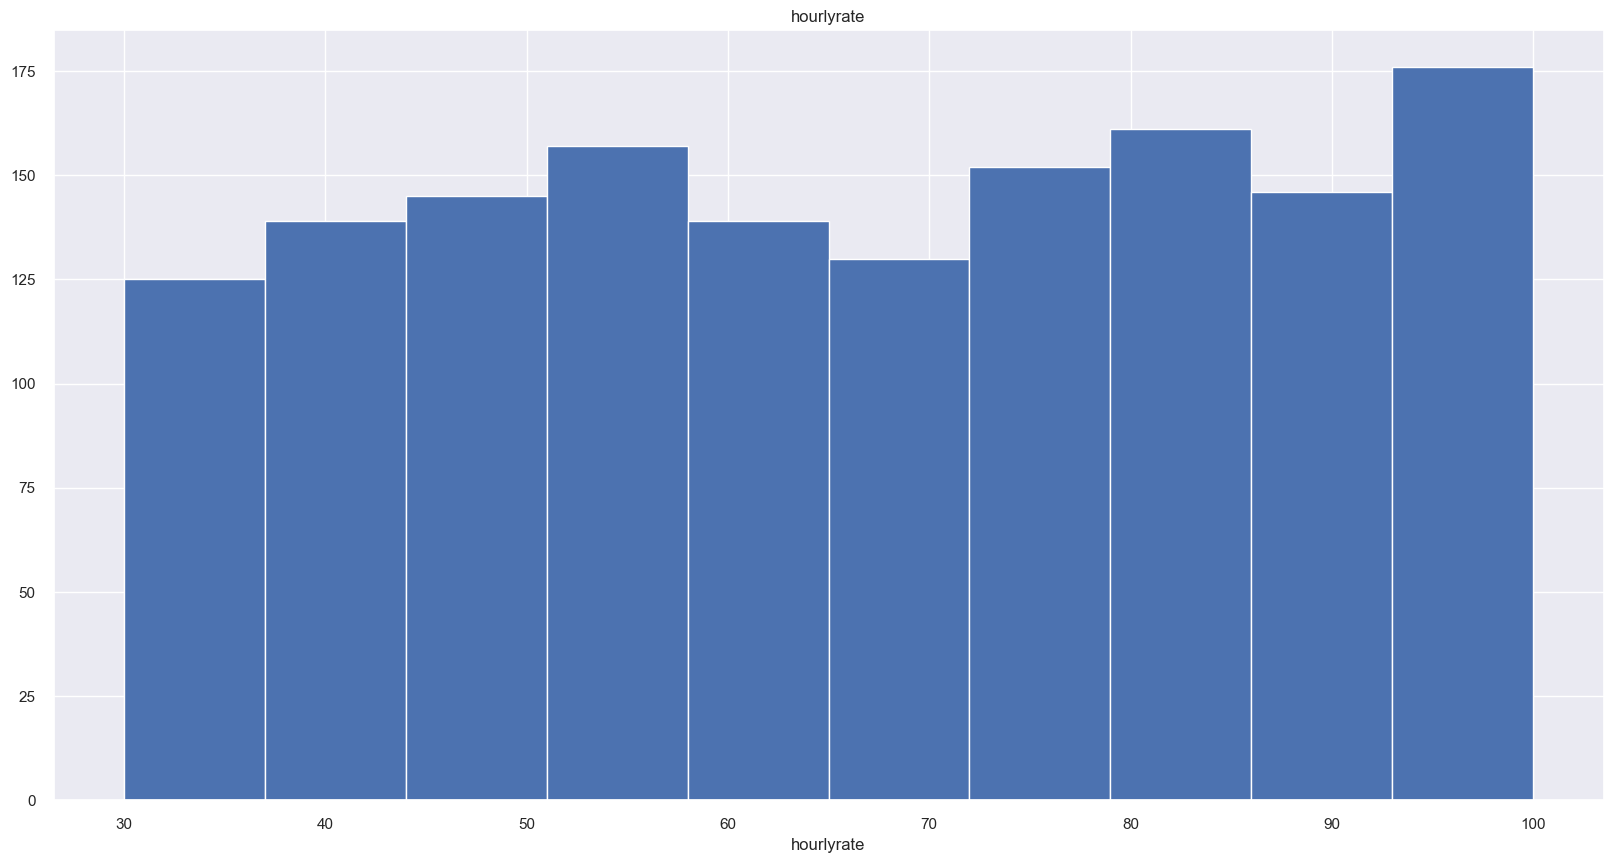

#####################
 
count    1470.000
mean     6502.931
std      4707.957
min      1009.000
5%       2097.900
10%      2317.600
25%      2911.000
50%      4919.000
75%      8379.000
90%     13775.600
95%     17821.350
max     19999.000
Name: monthlyincome, dtype: float64


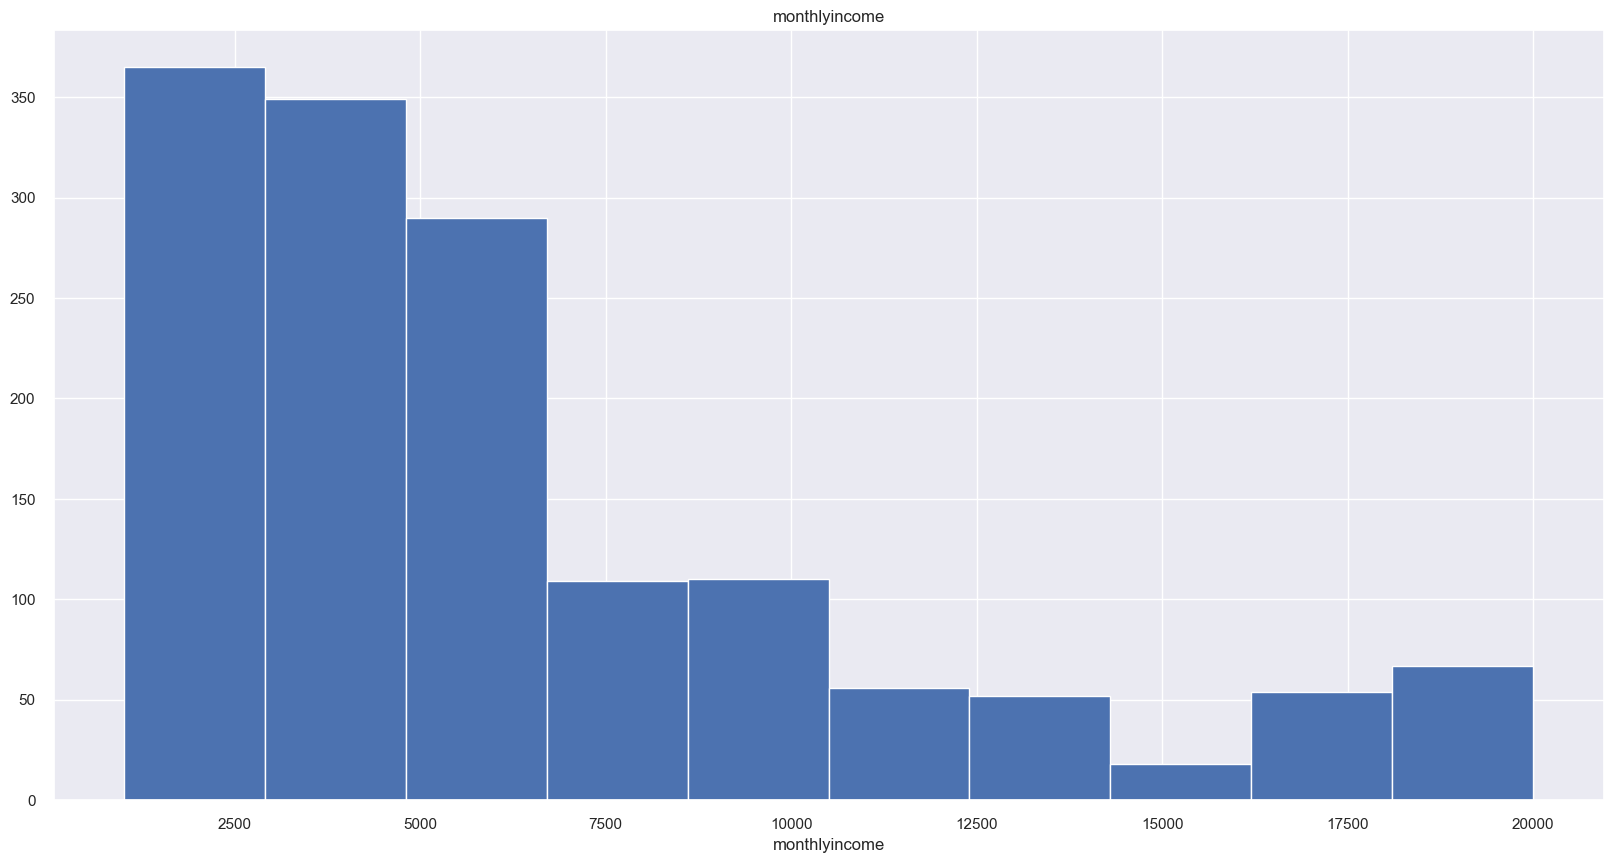

#####################
 
count    1470.000
mean    14313.103
std      7117.786
min      2094.000
5%       3384.550
10%      4603.000
25%      8047.000
50%     14235.500
75%     20461.500
90%     24001.700
95%     25431.900
max     26999.000
Name: monthlyrate, dtype: float64


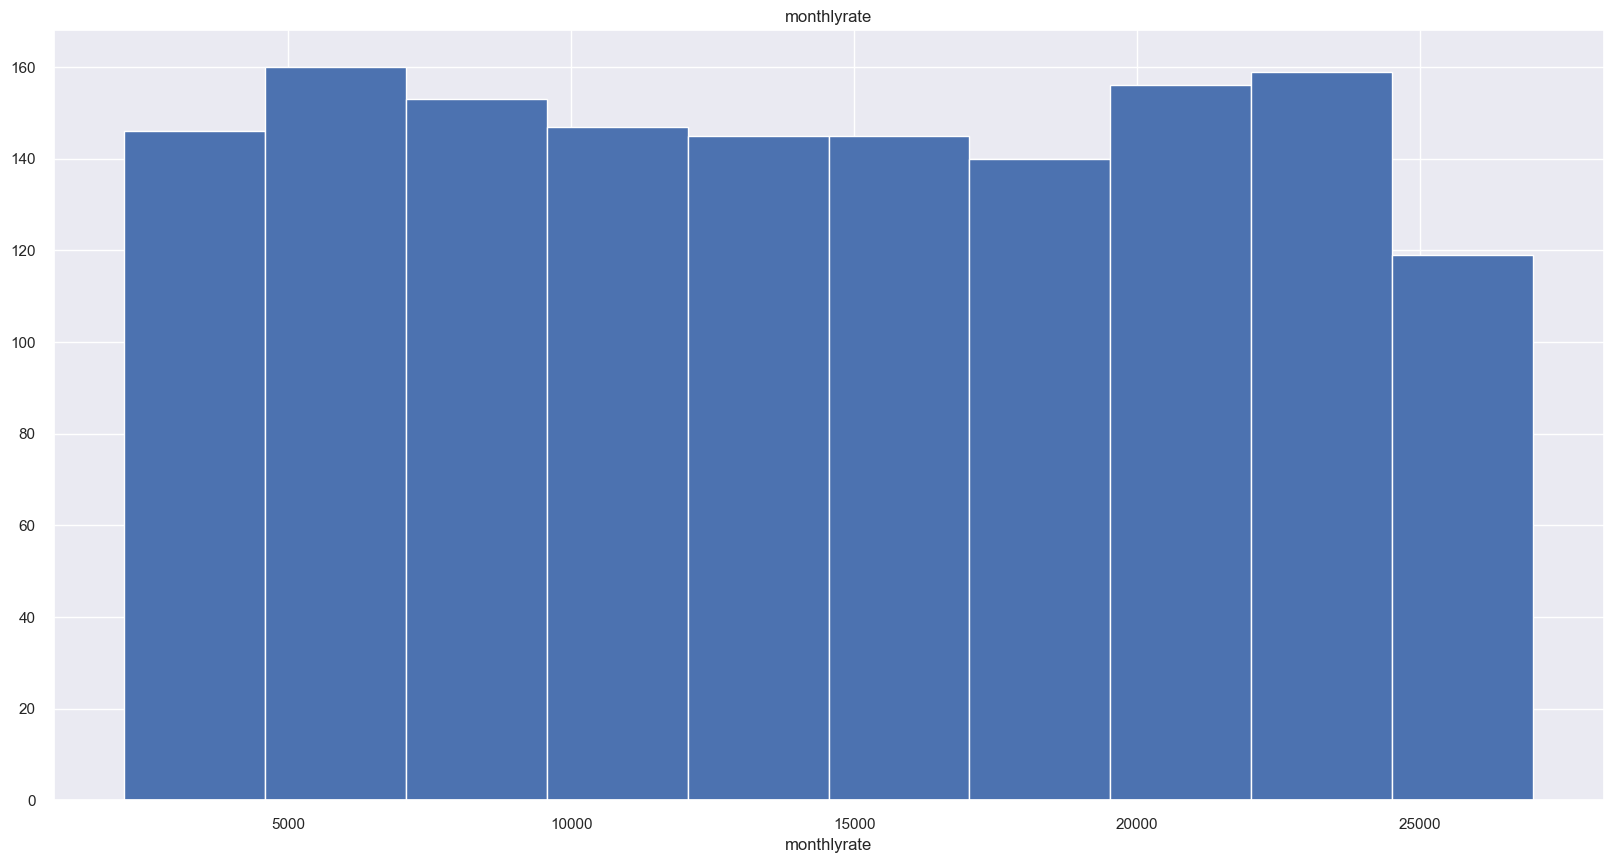

#####################
 
count   1470.000
mean       2.693
std        2.498
min        0.000
5%         0.000
10%        0.000
25%        1.000
50%        2.000
75%        4.000
90%        7.000
95%        8.000
max        9.000
Name: numcompaniesworked, dtype: float64


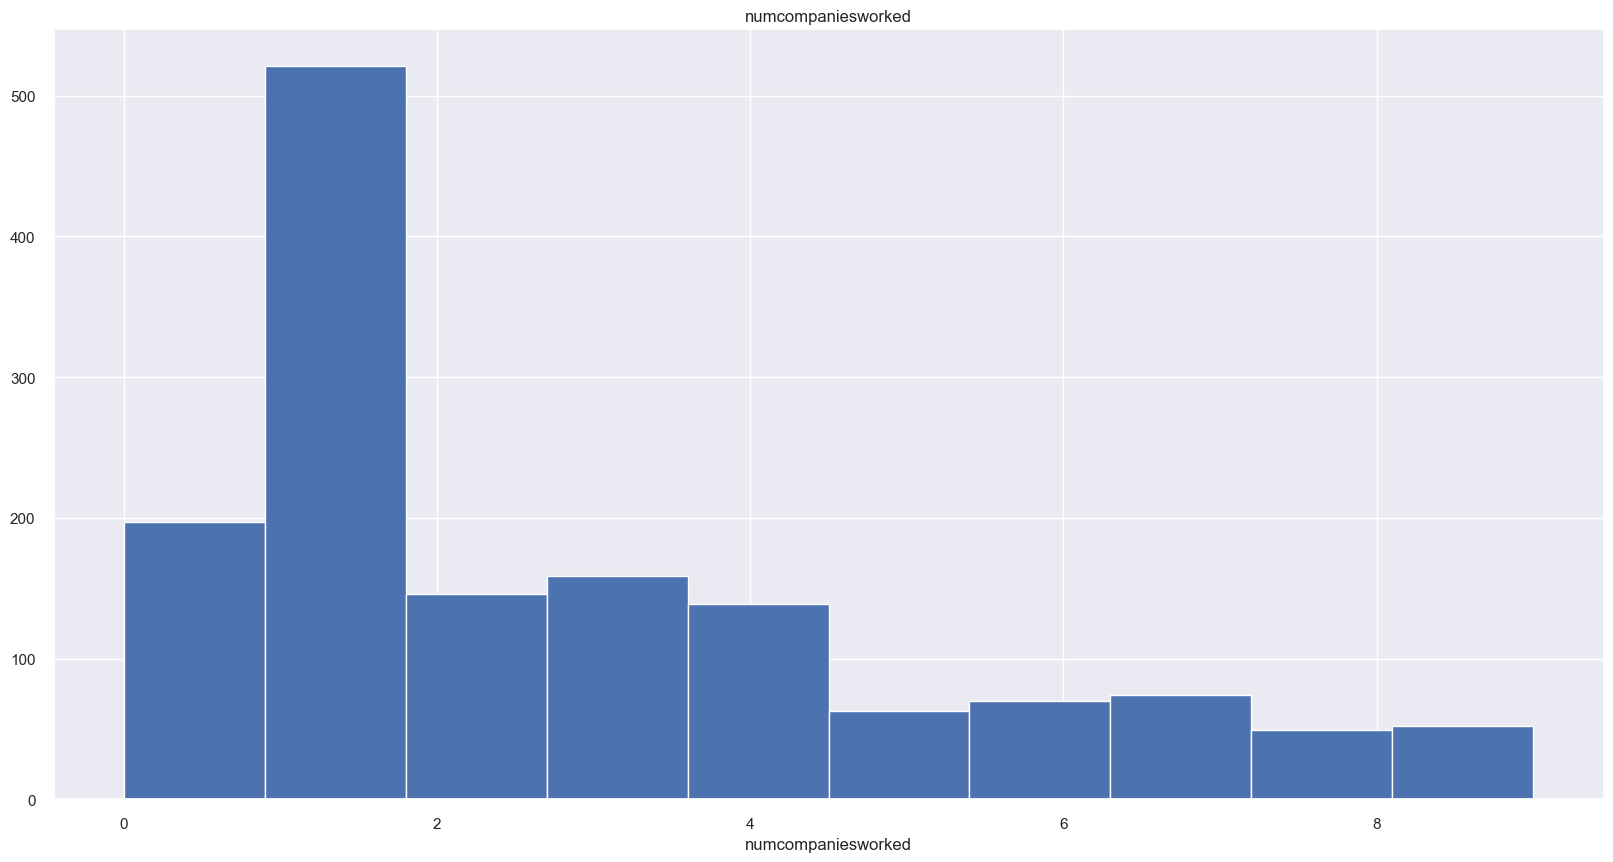

#####################
 
count   1470.000
mean      15.210
std        3.660
min       11.000
5%        11.000
10%       11.000
25%       12.000
50%       14.000
75%       18.000
90%       21.000
95%       22.000
max       25.000
Name: percentsalaryhike, dtype: float64


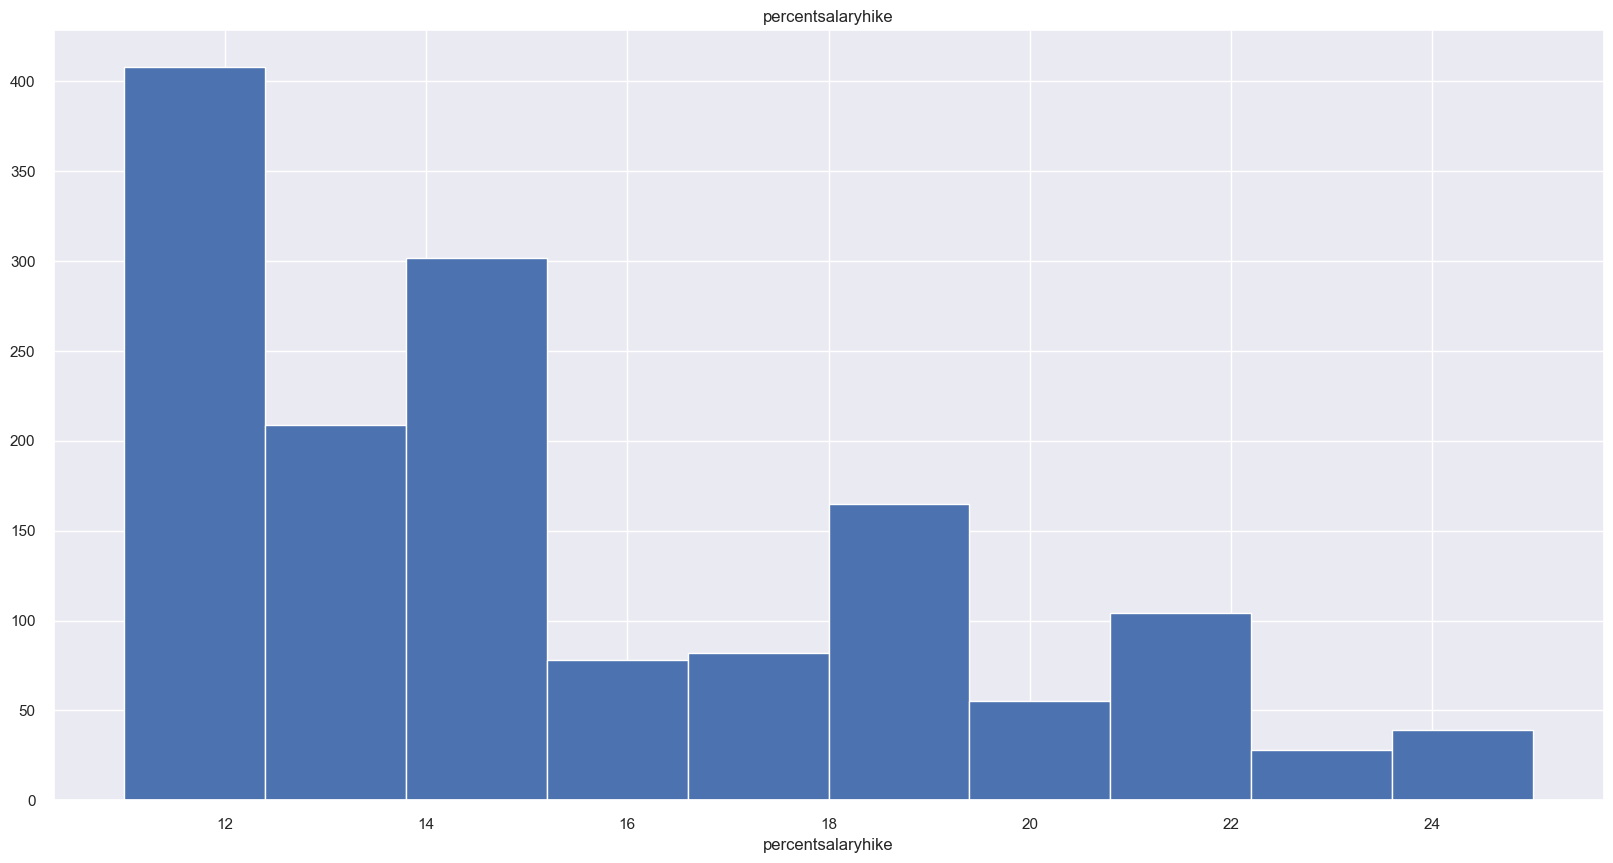

#####################
 
count   1470.000
mean      11.280
std        7.781
min        0.000
5%         1.000
10%        3.000
25%        6.000
50%       10.000
75%       15.000
90%       23.000
95%       28.000
max       40.000
Name: totalworkingyears, dtype: float64


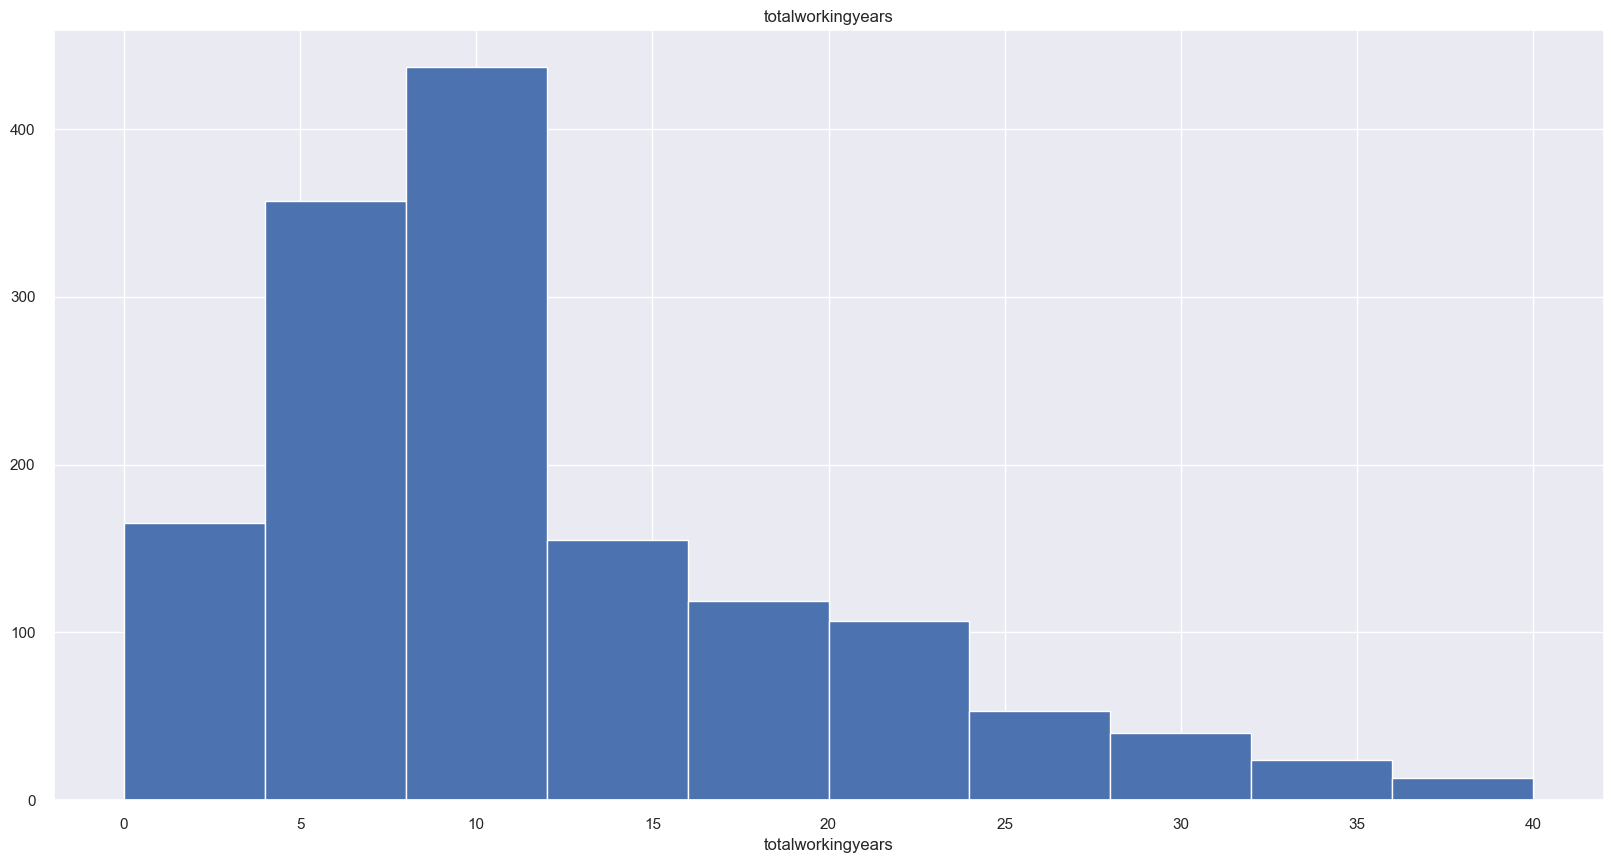

#####################
 
count   1470.000
mean       7.008
std        6.127
min        0.000
5%         1.000
10%        1.000
25%        3.000
50%        5.000
75%        9.000
90%       15.000
95%       20.000
max       40.000
Name: yearsatcompany, dtype: float64


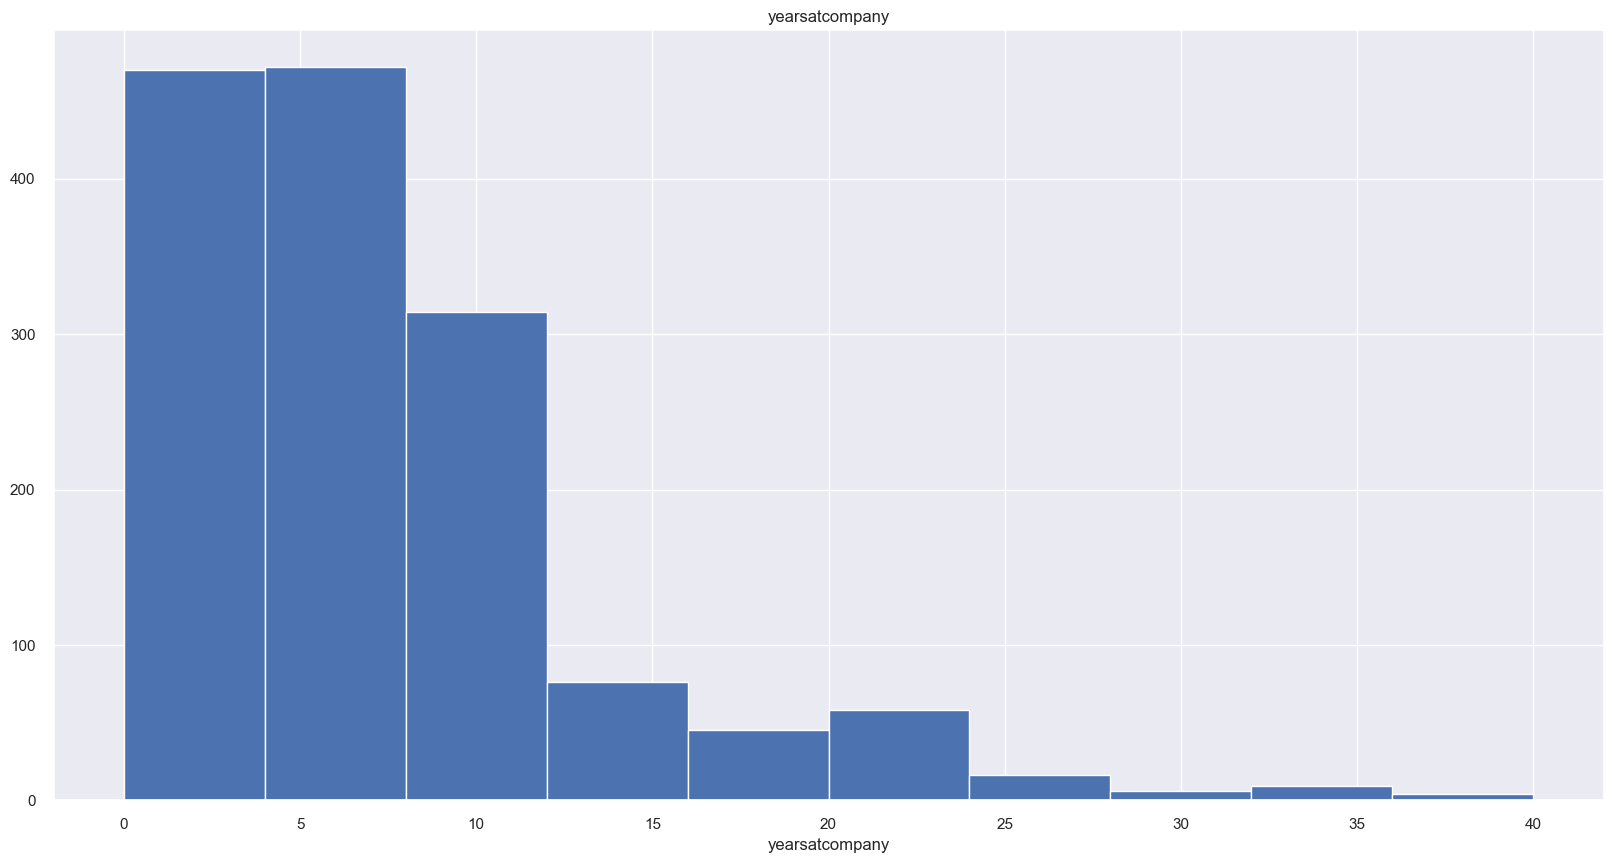

#####################
 
count   1470.000
mean       4.229
std        3.623
min        0.000
5%         0.000
10%        0.000
25%        2.000
50%        3.000
75%        7.000
90%        9.000
95%       11.000
max       18.000
Name: yearsincurrentrole, dtype: float64


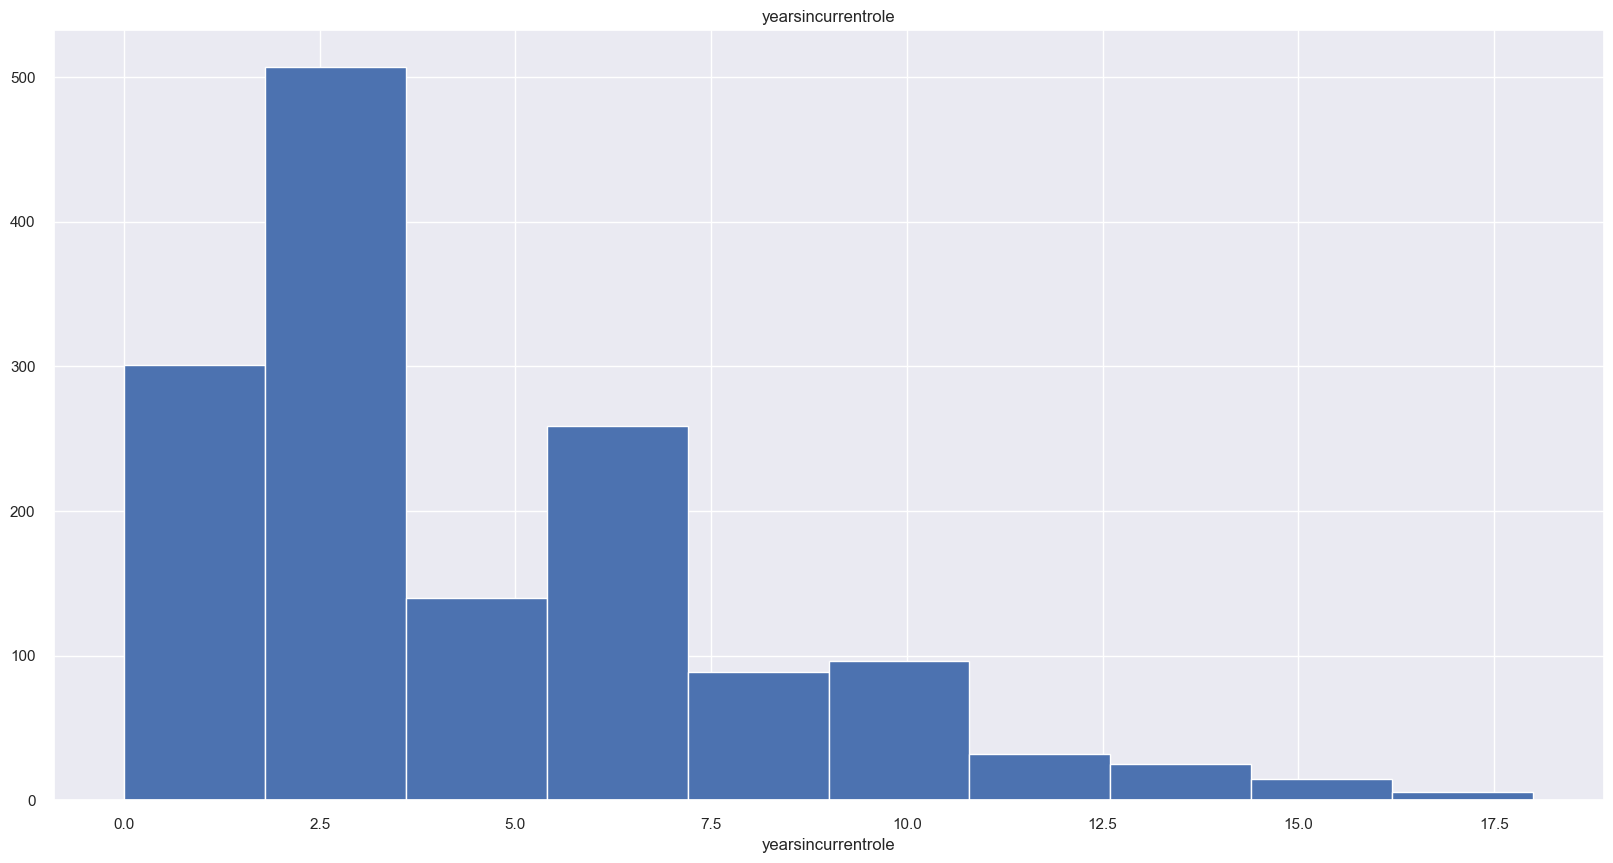

#####################
 
count   1470.000
mean       2.188
std        3.222
min        0.000
5%         0.000
10%        0.000
25%        0.000
50%        1.000
75%        3.000
90%        7.000
95%        9.000
max       15.000
Name: yearssincelastpromotion, dtype: float64


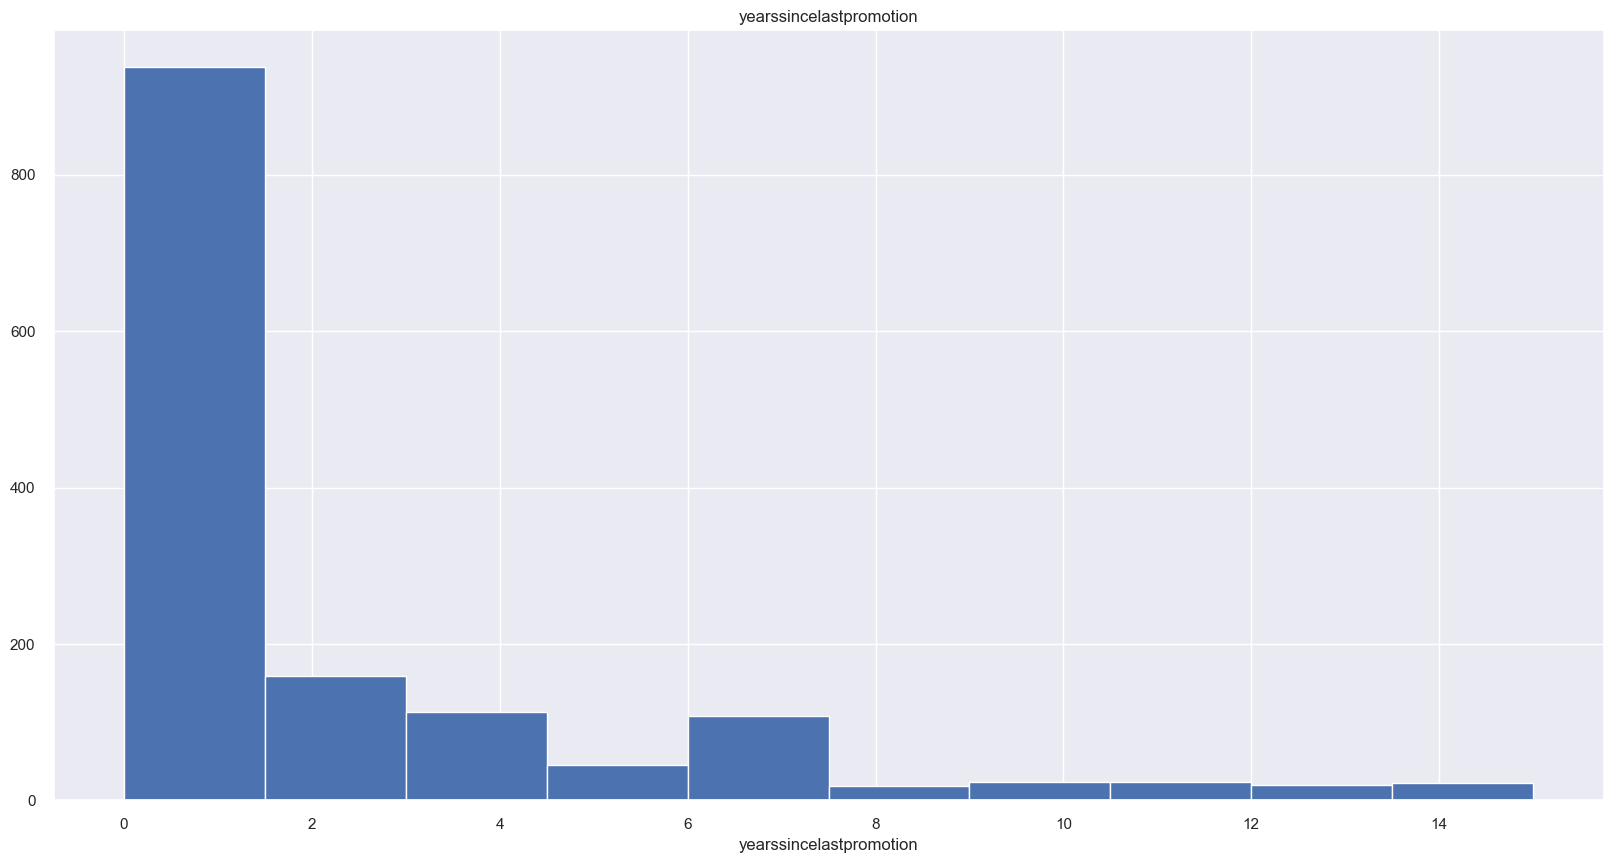

#####################
 
count   1470.000
mean       4.123
std        3.568
min        0.000
5%         0.000
10%        0.000
25%        2.000
50%        3.000
75%        7.000
90%        9.000
95%       10.000
max       17.000
Name: yearswithcurrmanager, dtype: float64


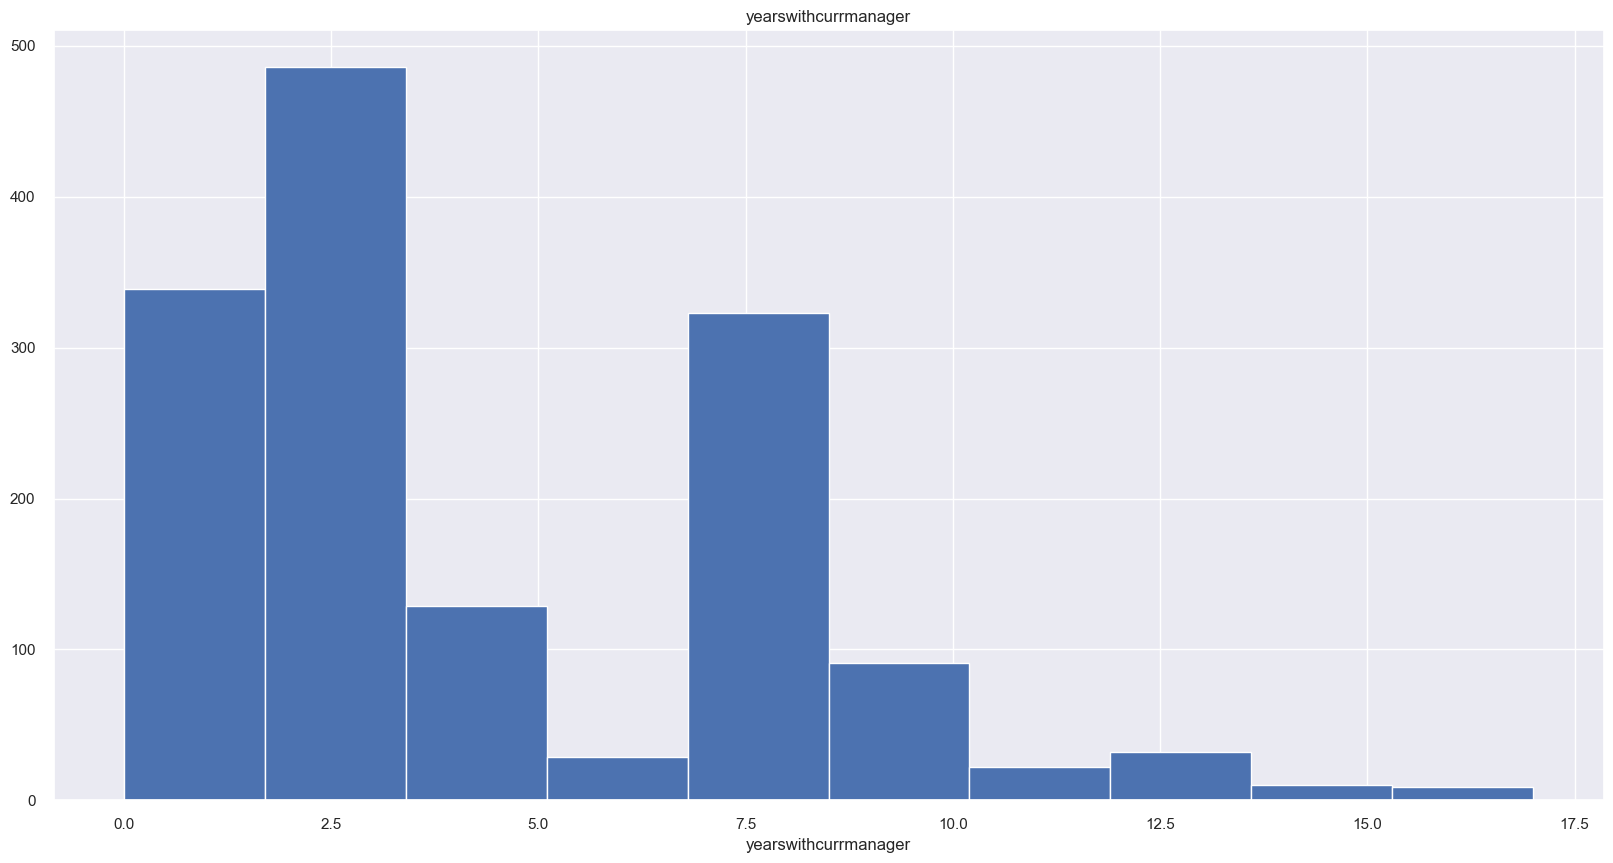

#####################
 


In [1206]:
for col in num_cols:
    num_summary(hr, col, plot=True)

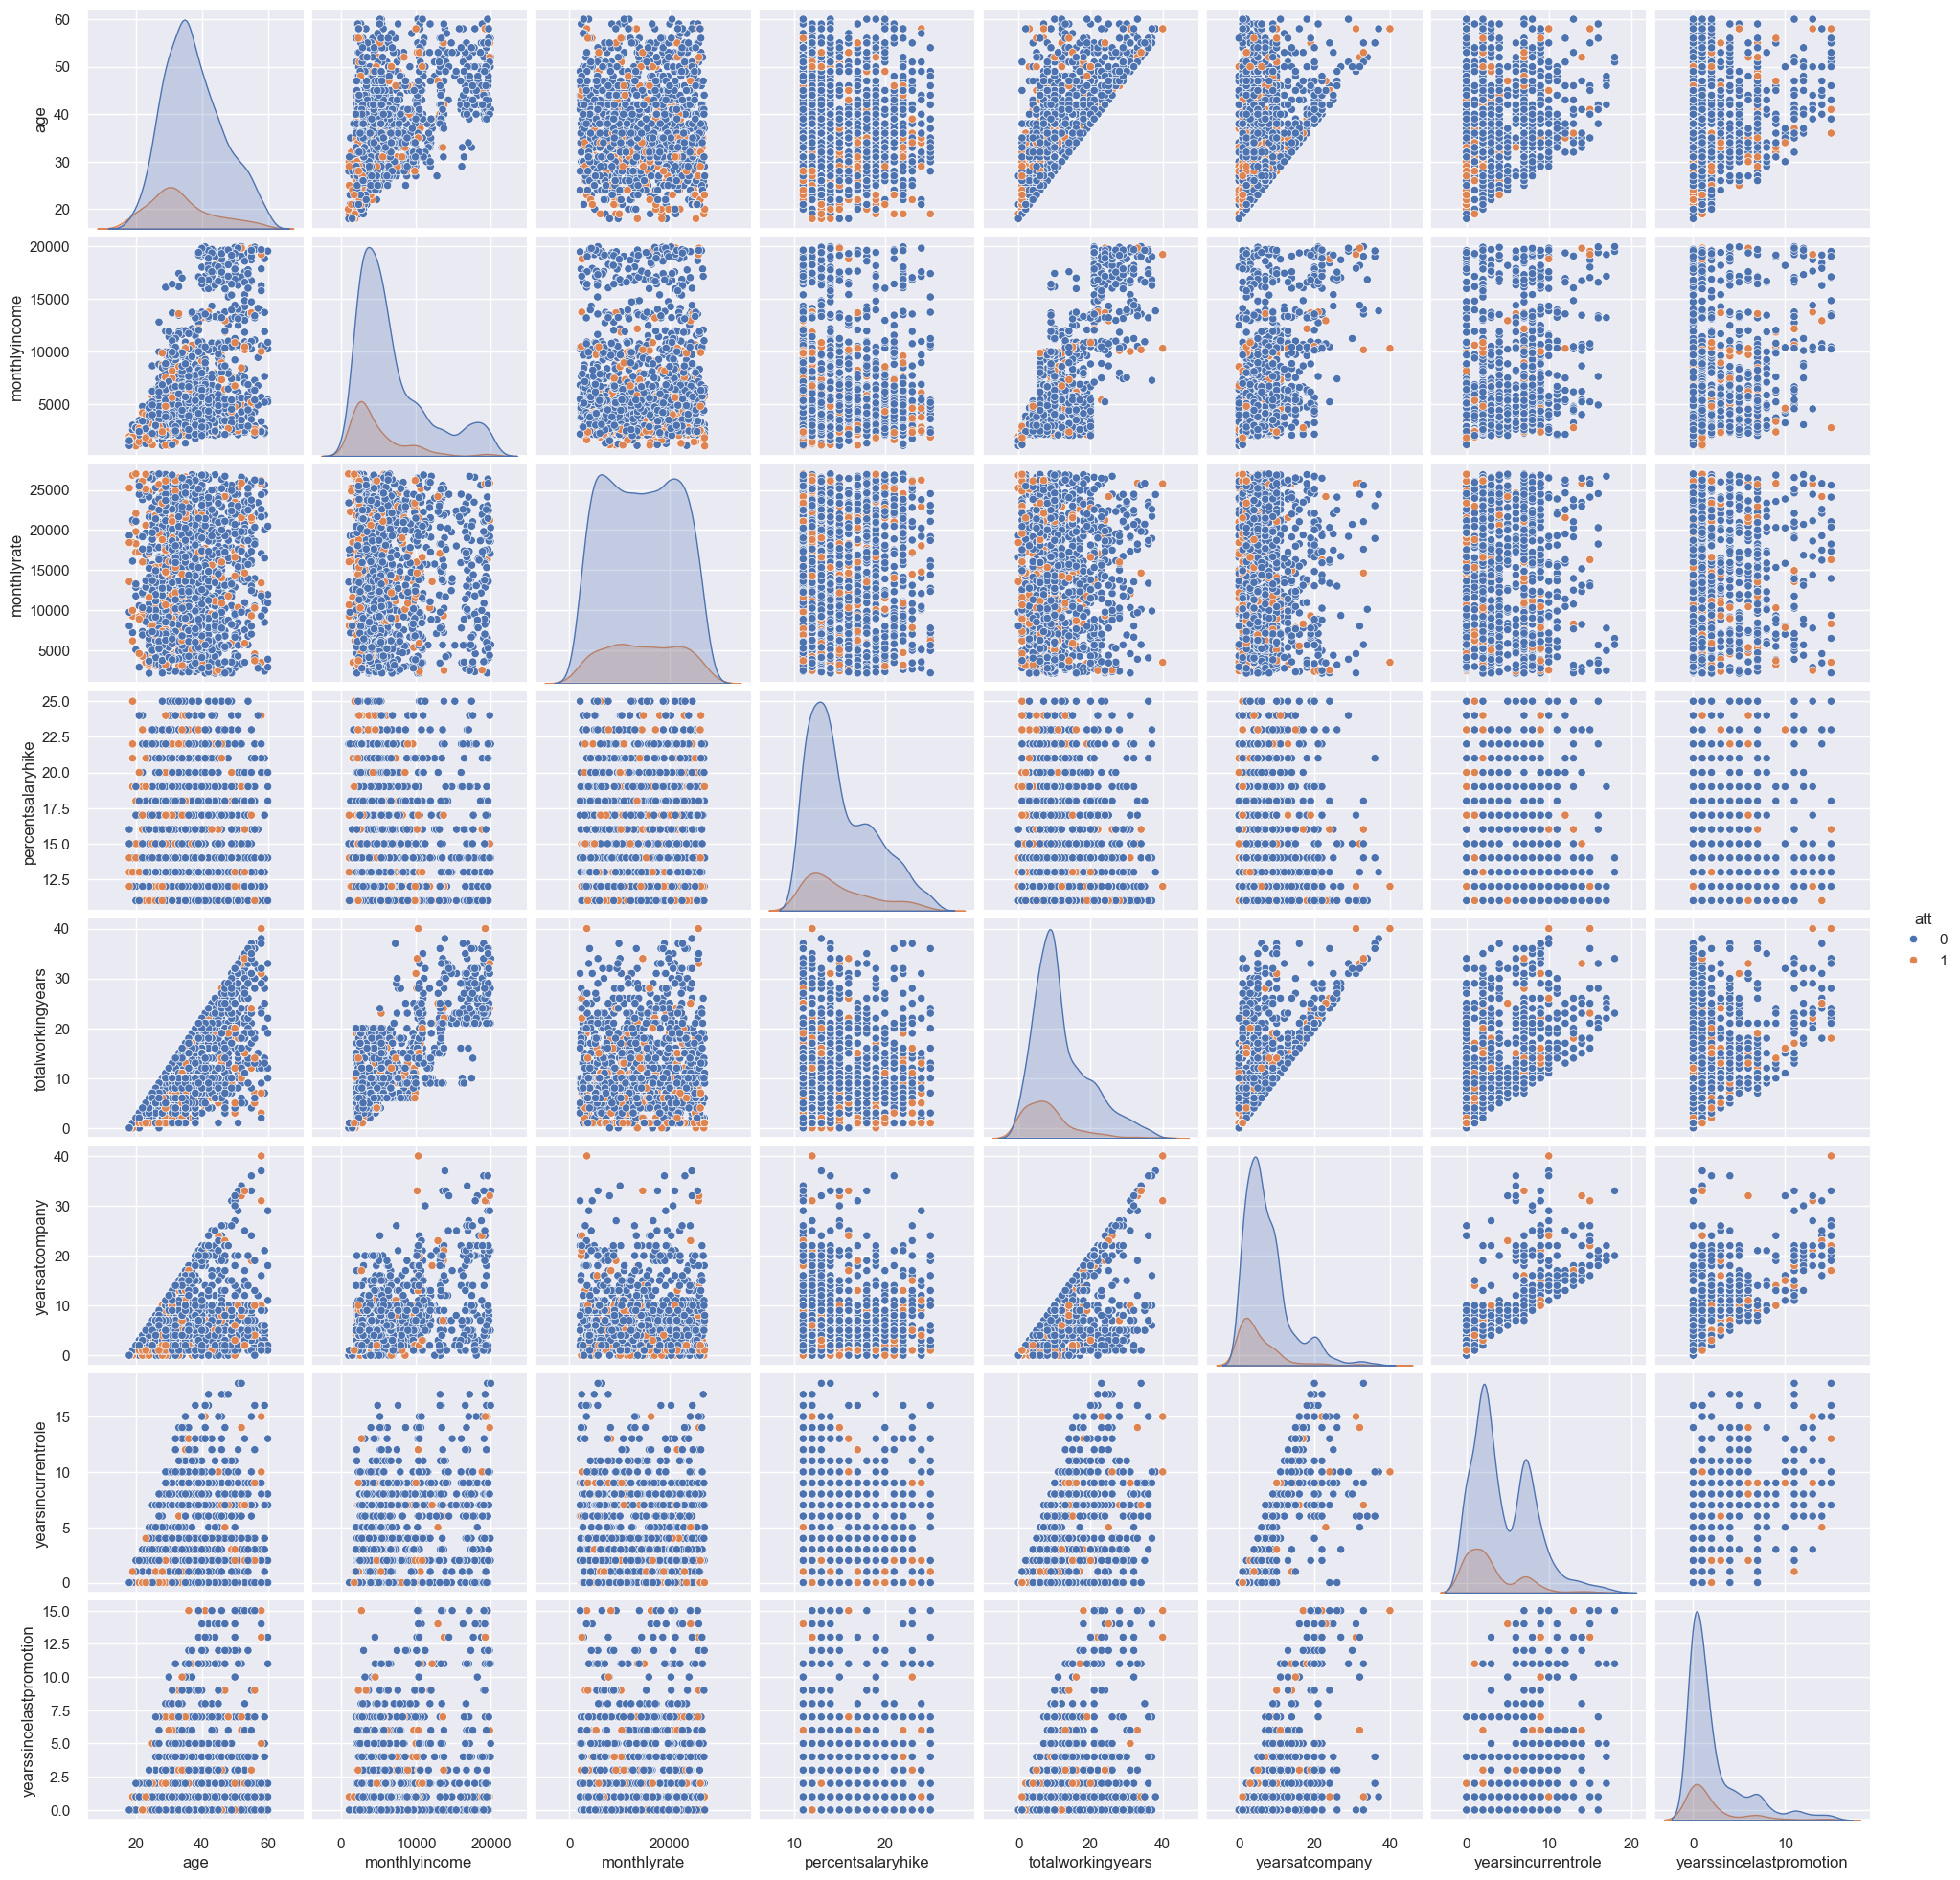

In [1207]:
hr_pair = hr[['age',
 'monthlyincome',
 'monthlyrate',
 'percentsalaryhike',
 'totalworkingyears',
 'yearsatcompany',
 'yearsincurrentrole',
 'yearssincelastpromotion',
              "att"]]
sns.pairplot(hr_pair, 
             hue='att'
            )
plt.show();

## Num_But_Cat Değişken Analizi

In [1209]:
hr[num_but_cat]

education  environmentsatisfaction  jobinvolvement  joblevel  jobsatisfaction  performancerating  relationshipsatisfaction  stockoptionlevel  trainingtimeslastyear  worklifebalance  att
0             2                        2               3         2                4                  3                         1                 0                      0                1    1
1             1                        3               2         2                2                  4                         4                 1                      3                3    0
2             2                        4               2         1                3                  3                         2                 0                      3                3    1
3             4                        4               3         1                3                  3                         3                 0                      3                3    0
4             1                        1               3         1                2                  3                         4                 1                      3                3    0
5             2                        4               3         1                4                  3                         3                 0                      2                2    0
6             3                        3               4         1                1                  4                         1                 3                      3                2    0
7             1                        4               3         1                3                  4                         2                 1                      2                3    0
8             3                        4               2         3                3                  4                         2                 0                      2                3    0
9             3                        3               3         2                3                  3                         2                 2                      3                2    0
10            3                        1               4         1                2                  3                         3                 1                      5                3    0
11            2                        4               2         2                3                  3                         4                 0                      3                3    0
12            1                        1               3         1                3                  3                         4                 1                      1                2    0
13            2                        2               3         1                4                  3                         3                 1                      2                3    0
14            3                        3               2         1                3                  3                         2                 0                      4                3    1
15            4                        2               4         3                1                  3                         3                 1                      1                3    0
16            2                        1               4         1                2                  3                         4                 2                      5                2    0
17            2                        4               4         1                4                  3                         2                 2                      2                2    0
18            4                        1               2         4                4                  3                         3                 0                      3                3    0
19            3                        4               3         1                4                  3                         3                 0                    

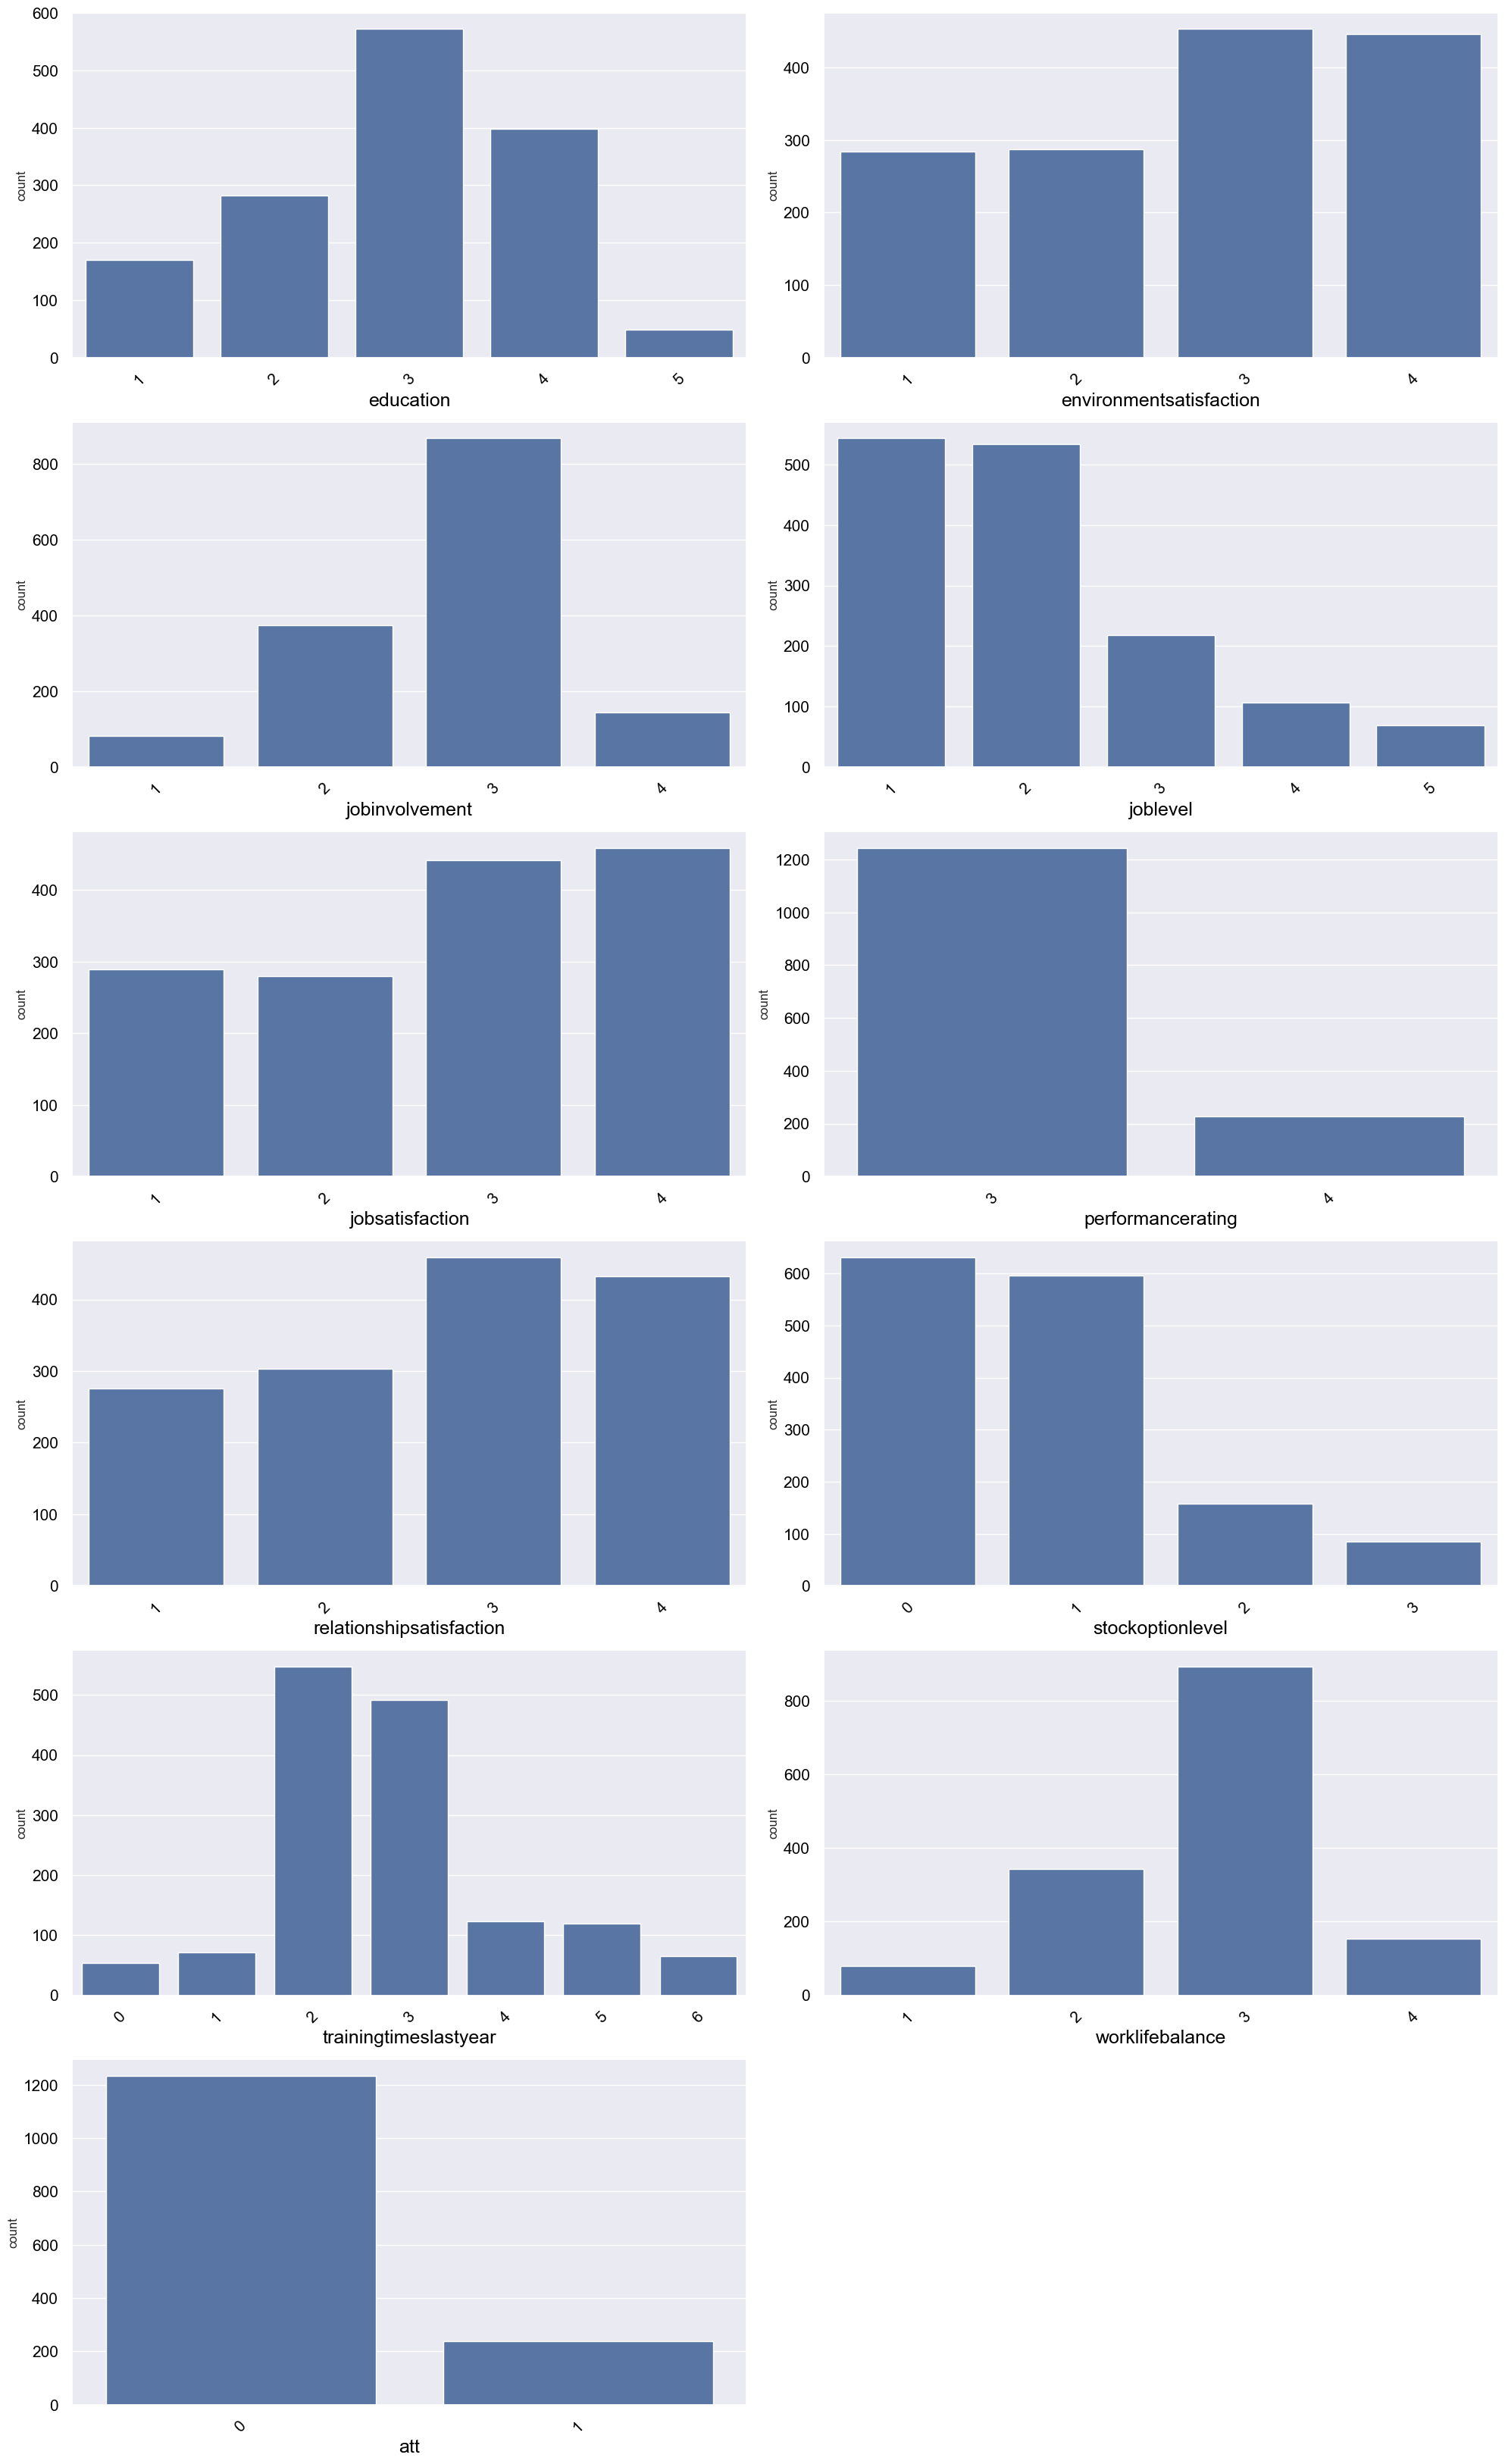

In [1210]:
fig = plt.figure(figsize=(20,140))
for index,col in enumerate(num_but_cat):
    plt.subplot(26,2,index+1)
    sns.countplot(x=hr[num_but_cat].iloc[:,index], data=hr[num_but_cat].dropna())
    plt.xlabel(col, fontsize = 18,color="black")

    plt.xticks(size = 15,color="black", rotation = 45 )
    plt.yticks(size = 15,color="black" )

fig.tight_layout(pad=1.0)

## Hedef Değişken Analizi

### Hedef Değişkenin Kategorik Değişkenler ile Analizi

In [1213]:
cat_cols

['businesstravel',
 'department',
 'educationfield',
 'gender',
 'jobrole',
 'maritalstatus',
 'overtime',
 'education',
 'environmentsatisfaction',
 'jobinvolvement',
 'joblevel',
 'jobsatisfaction',
 'performancerating',
 'relationshipsatisfaction',
 'stockoptionlevel',
 'trainingtimeslastyear',
 'worklifebalance',
 'att']

In [1214]:
hr.groupby("education")["att"].mean()

education
1   0.182
2   0.156
3   0.173
4   0.146
5   0.104
Name: att, dtype: float64

In [1215]:
# Fonksiyonlaştırılmış hali!
def target_summary_with_cat(dataframe, target, categorical_col):
    print(pd.DataFrame({"TARGET_MEAN": dataframe.groupby(categorical_col)[target].mean()}), end="\n\n\n")

In [1216]:
for col in cat_cols:
    target_summary_with_cat(hr, target="att", categorical_col=col)

                   TARGET_MEAN
businesstravel                
Non-Travel               0.080
Travel_Frequently        0.249
Travel_Rarely            0.150


                        TARGET_MEAN
department                         
Human Resources               0.190
Research & Development        0.138
Sales                         0.206


                  TARGET_MEAN
educationfield               
Human Resources         0.259
Life Sciences           0.147
Marketing               0.220
Medical                 0.136
Other                   0.134
Technical Degree        0.242


        TARGET_MEAN
gender             
Female        0.148
Male          0.170


                           TARGET_MEAN
jobrole                               
Healthcare Representative        0.069
Human Resources                  0.231
Laboratory Technician            0.239
Manager                          0.049
Manufacturing Director           0.069
Research Director                0.025
Research Scientist       

### Hedef Değişkenin Sayısal Değişkenler ile Analizi

In [1218]:
def target_summary_with_num(dataframe, target, numerical_col):
    print(dataframe.groupby(target).agg({numerical_col: "mean"}), end="\n\n\n")

In [1219]:
for col in num_cols:
    target_summary_with_num(hr, "att", col)

       age
att       
0   37.561
1   33.608


     dailyrate
att           
0      812.504
1      750.363


     distancefromhome
att                  
0               8.916
1              10.633


     employeenumber
att                
0          1027.656
1          1010.346


     hourlyrate
att            
0        65.952
1        65.574


     monthlyincome
att               
0         6832.740
1         4787.093


     monthlyrate
att             
0      14265.779
1      14559.308


     numcompaniesworked
att                    
0                 2.646
1                 2.941


     percentsalaryhike
att                   
0               15.231
1               15.097


     totalworkingyears
att                   
0               11.863
1                8.245


     yearsatcompany
att                
0             7.369
1             5.131


     yearsincurrentrole
att                    
0                 4.484
1                 2.903


     yearssincelastpromotion
att        

## Korelasyon Analizi

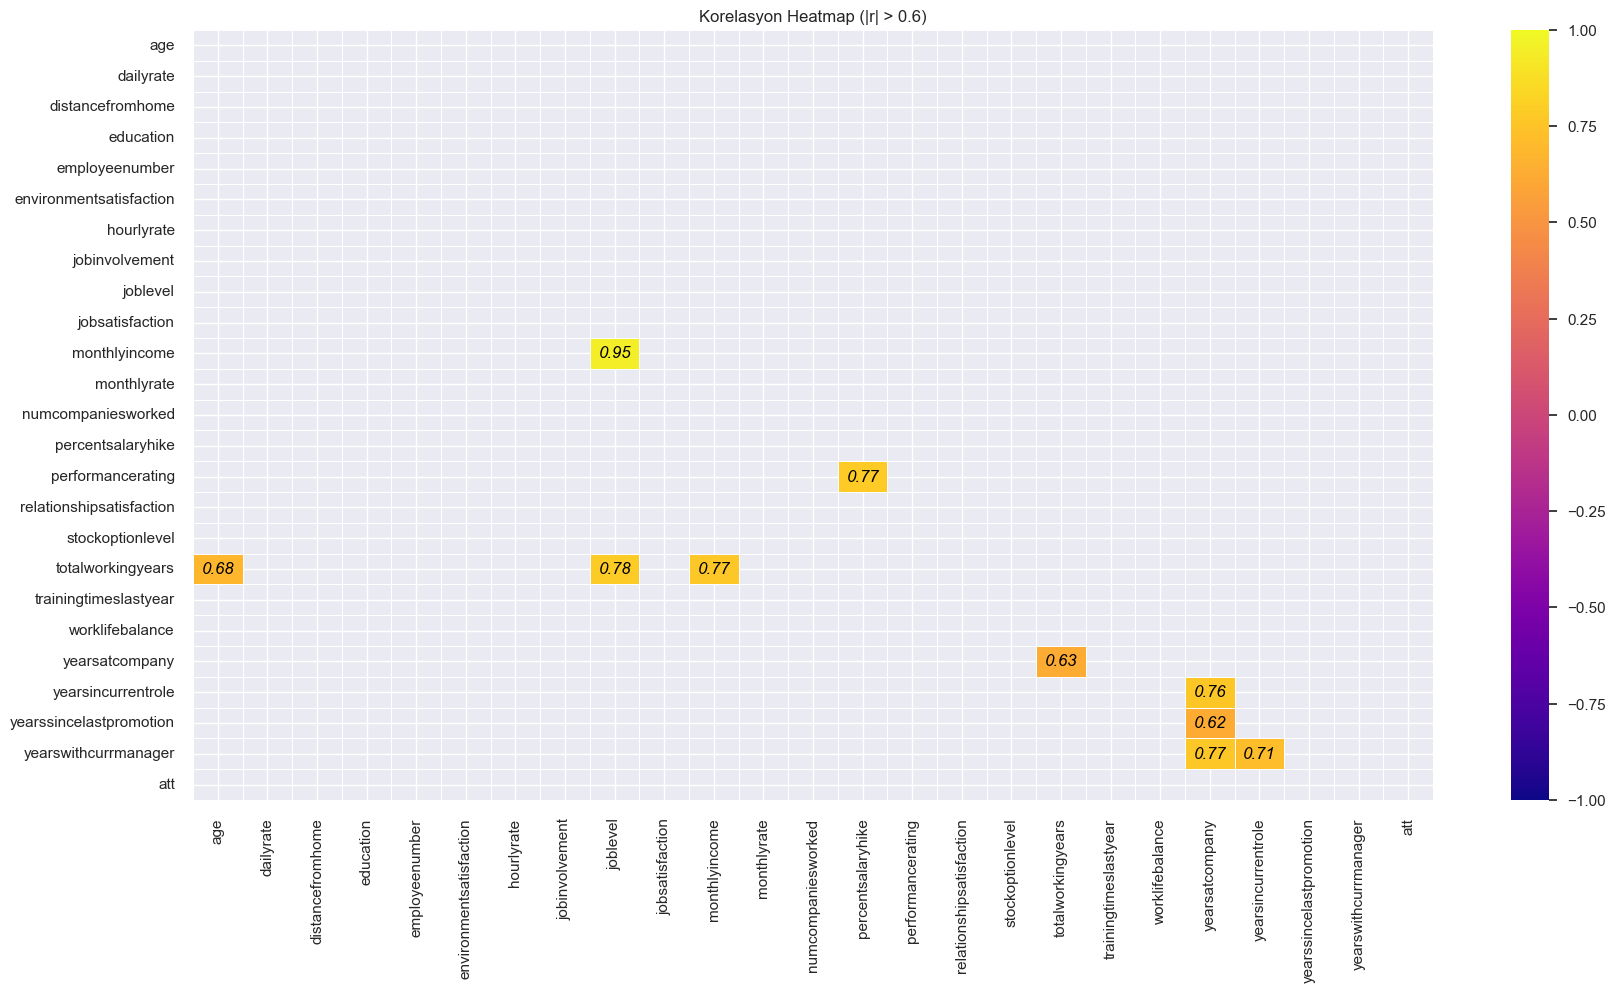

In [1221]:
# num_cols = [col for col in hr.columns if hr[col].dtype in [int, float]]
hr_numcols = hr.select_dtypes(include=['int'])  # Sadece sayısal kolonları seçiyoruz
hr_corr = hr_numcols.corr()  # Sayısal kolonların korelasyon matrisini alıyoruz

# Eşik değerin altındaki korelasyonları gizle (NaN yap)
threshold = 0.60  # Eşik değer
mask = (hr_corr < threshold) & (hr_corr > -threshold) # Eşik değerinin altındakileri seç 
corr_filtered = hr_corr.mask(mask)  # Seçilenleri NaN yap
triangle_mask = np.triu(np.ones_like(corr_filtered, dtype=bool)) #---> haritayi üçgen şeklinde çıkarır.

sns.set(rc={'figure.figsize': (20, 10)}) # annot=True ile değerleri gösteriyoruz
sns.heatmap(corr_filtered, 
            annot=True, 
            cmap="plasma", #RdBu
            linewidths=.5, 
            fmt=".2f", 
            linecolor='white', 
            # square=True,
            mask = triangle_mask,
            vmin=-1,
            vmax=1,
            annot_kws={"size": 12, "color": 'black', "style": 'italic'})
plt.title(f"Korelasyon Heatmap (|r| > {threshold})")
plt.show();


### Yüksek Korelasyonlu Değişkenlerin Silinmesi

In [1223]:
def high_correlated_cols(dataframe, plot=False, corr_th=0.90):
    corr = dataframe.corr()
    cor_matrix = corr.abs()
    upper_triangle_matrix = cor_matrix.where(np.triu(np.ones(cor_matrix.shape), k=1).astype(bool))
    drop_list = [col for col in upper_triangle_matrix.columns if any(upper_triangle_matrix[col] > corr_th)]
    if plot:
        import seaborn as sns
        import matplotlib.pyplot as plt
        sns.set(rc={'figure.figsize': (15, 15)})
        sns.heatmap(corr, cmap="RdBu")
        plt.show()
    return drop_list

In [1224]:
high_correlated_cols(hr[num_cols], corr_th=0.8) # Normalde drop'lama eşiği %80 ve üstüdür!

[]

In [1225]:
drop_list = high_correlated_cols(hr[num_cols], corr_th=0.8, plot=False)
drop_list

[]

In [1226]:
# Yüksek korelasyon ilişkisi olan değişkenleri dropluyoruz. 
hr_corr_dropped = hr.drop(drop_list, axis=1)

#### hr_corr_dropped checkpoint - hr_v2

In [1228]:
# EDA tekerrürden ibarettir!
hr = hr_corr_dropped.copy()
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   age                       1470 non-null   int64 
 1   businesstravel            1470 non-null   object
 2   dailyrate                 1470 non-null   int64 
 3   department                1470 non-null   object
 4   distancefromhome          1470 non-null   int64 
 5   education                 1470 non-null   int64 
 6   educationfield            1470 non-null   object
 7   employeenumber            1470 non-null   int64 
 8   environmentsatisfaction   1470 non-null   int64 
 9   gender                    1470 non-null   object
 10  hourlyrate                1470 non-null   int64 
 11  jobinvolvement            1470 non-null   int64 
 12  joblevel                  1470 non-null   int64 
 13  jobrole                   1470 non-null   object
 14  jobsatisfaction         

In [1229]:
cat_cols, num_cols, cat_but_car, num_but_cat = grab_col_names(hr)

Observations: 1470
Variables: 32
cat_cols: 18
num_cols: 14
cat_but_car: 0
num_but_cat: 11


# Features Inspection

## Categorical Features

### Dropping %95 columns

In [1233]:
# hr.drop(["over18", "standardhours", "employeecount"], axis=1, inplace=True)

In [1234]:
hr.shape

(1470, 32)

In [1235]:
# EDA tekerrürden ibarettir :) 
# cat_cols, num_cols, cat_but_car, num_but_cat = grab_col_names(hr)

### Rare Encoding

In [1237]:
#############################################
# Rare Encoding
#############################################

# 1. Kategorik değişkenlerin azlık çokluk durumunun analiz edilmesi.
# 2. Rare kategoriler ile bağımlı değişken arasındaki ilişkinin analiz edilmesi.
# 3. Rare encoder yazacağız.

###################
# 1. Kategorik değişkenlerin azlık çokluk durumunun analiz edilmesi.
###################


In [1238]:
hr["education"].value_counts(1)

education
3   0.389
4   0.271
2   0.192
1   0.116
5   0.033
Name: proportion, dtype: float64

In [1239]:
###################
# 2. Rare kategoriler ile bağımlı değişken arasındaki ilişkinin analiz edilmesi.
###################

def rare_analyser(dataframe, target, cat_cols):
    for col in cat_cols:
        print(col, ":", len(dataframe[col].value_counts()))
        print(pd.DataFrame({"COUNT": dataframe[col].value_counts(),
                            "RATIO": dataframe[col].value_counts() / len(dataframe),
                            "TARGET_MEAN": dataframe.groupby(col)[target].mean()}), end="\n\n\n")

In [1240]:
rare_analyser(hr, "att", cat_cols)

businesstravel : 3
                   COUNT  RATIO  TARGET_MEAN
businesstravel                              
Non-Travel           150  0.102        0.080
Travel_Frequently    277  0.188        0.249
Travel_Rarely       1043  0.710        0.150


department : 3
                        COUNT  RATIO  TARGET_MEAN
department                                       
Human Resources            63  0.043        0.190
Research & Development    961  0.654        0.138
Sales                     446  0.303        0.206


educationfield : 6
                  COUNT  RATIO  TARGET_MEAN
educationfield                             
Human Resources      27  0.018        0.259
Life Sciences       606  0.412        0.147
Marketing           159  0.108        0.220
Medical             464  0.316        0.136
Other                82  0.056        0.134
Technical Degree    132  0.090        0.242


gender : 2
        COUNT  RATIO  TARGET_MEAN
gender                           
Female    588  0.400        0.148
M

In [1241]:
#############################################
# 3. Rare encoder'ın yazılması.
#############################################

def rare_encoder(dataframe, rare_perc):
    temp_df = dataframe.copy()

    rare_columns = [col for col in temp_df.columns if temp_df[col].dtypes == 'O'
                    and (temp_df[col].value_counts() / len(temp_df) < rare_perc).any(axis=None)]

    for var in rare_columns:
        tmp = temp_df[var].value_counts() / len(temp_df)
        rare_labels = tmp[tmp < rare_perc].index
        temp_df[var] = np.where(temp_df[var].isin(rare_labels), 'Rare_CAT', temp_df[var])

    return temp_df

In [1242]:
hr_rare_encoded = rare_encoder(hr, 0.06)

In [1243]:
rare_analyser(hr_rare_encoded, "att", cat_cols)

businesstravel : 3
                   COUNT  RATIO  TARGET_MEAN
businesstravel                              
Non-Travel           150  0.102        0.080
Travel_Frequently    277  0.188        0.249
Travel_Rarely       1043  0.710        0.150


department : 3
                        COUNT  RATIO  TARGET_MEAN
department                                       
Rare_CAT                   63  0.043        0.190
Research & Development    961  0.654        0.138
Sales                     446  0.303        0.206


educationfield : 5
                  COUNT  RATIO  TARGET_MEAN
educationfield                             
Life Sciences       606  0.412        0.147
Marketing           159  0.108        0.220
Medical             464  0.316        0.136
Rare_CAT            109  0.074        0.165
Technical Degree    132  0.090        0.242


gender : 2
        COUNT  RATIO  TARGET_MEAN
gender                           
Female    588  0.400        0.148
Male      882  0.600        0.170


jobrole :

## Numerical Features

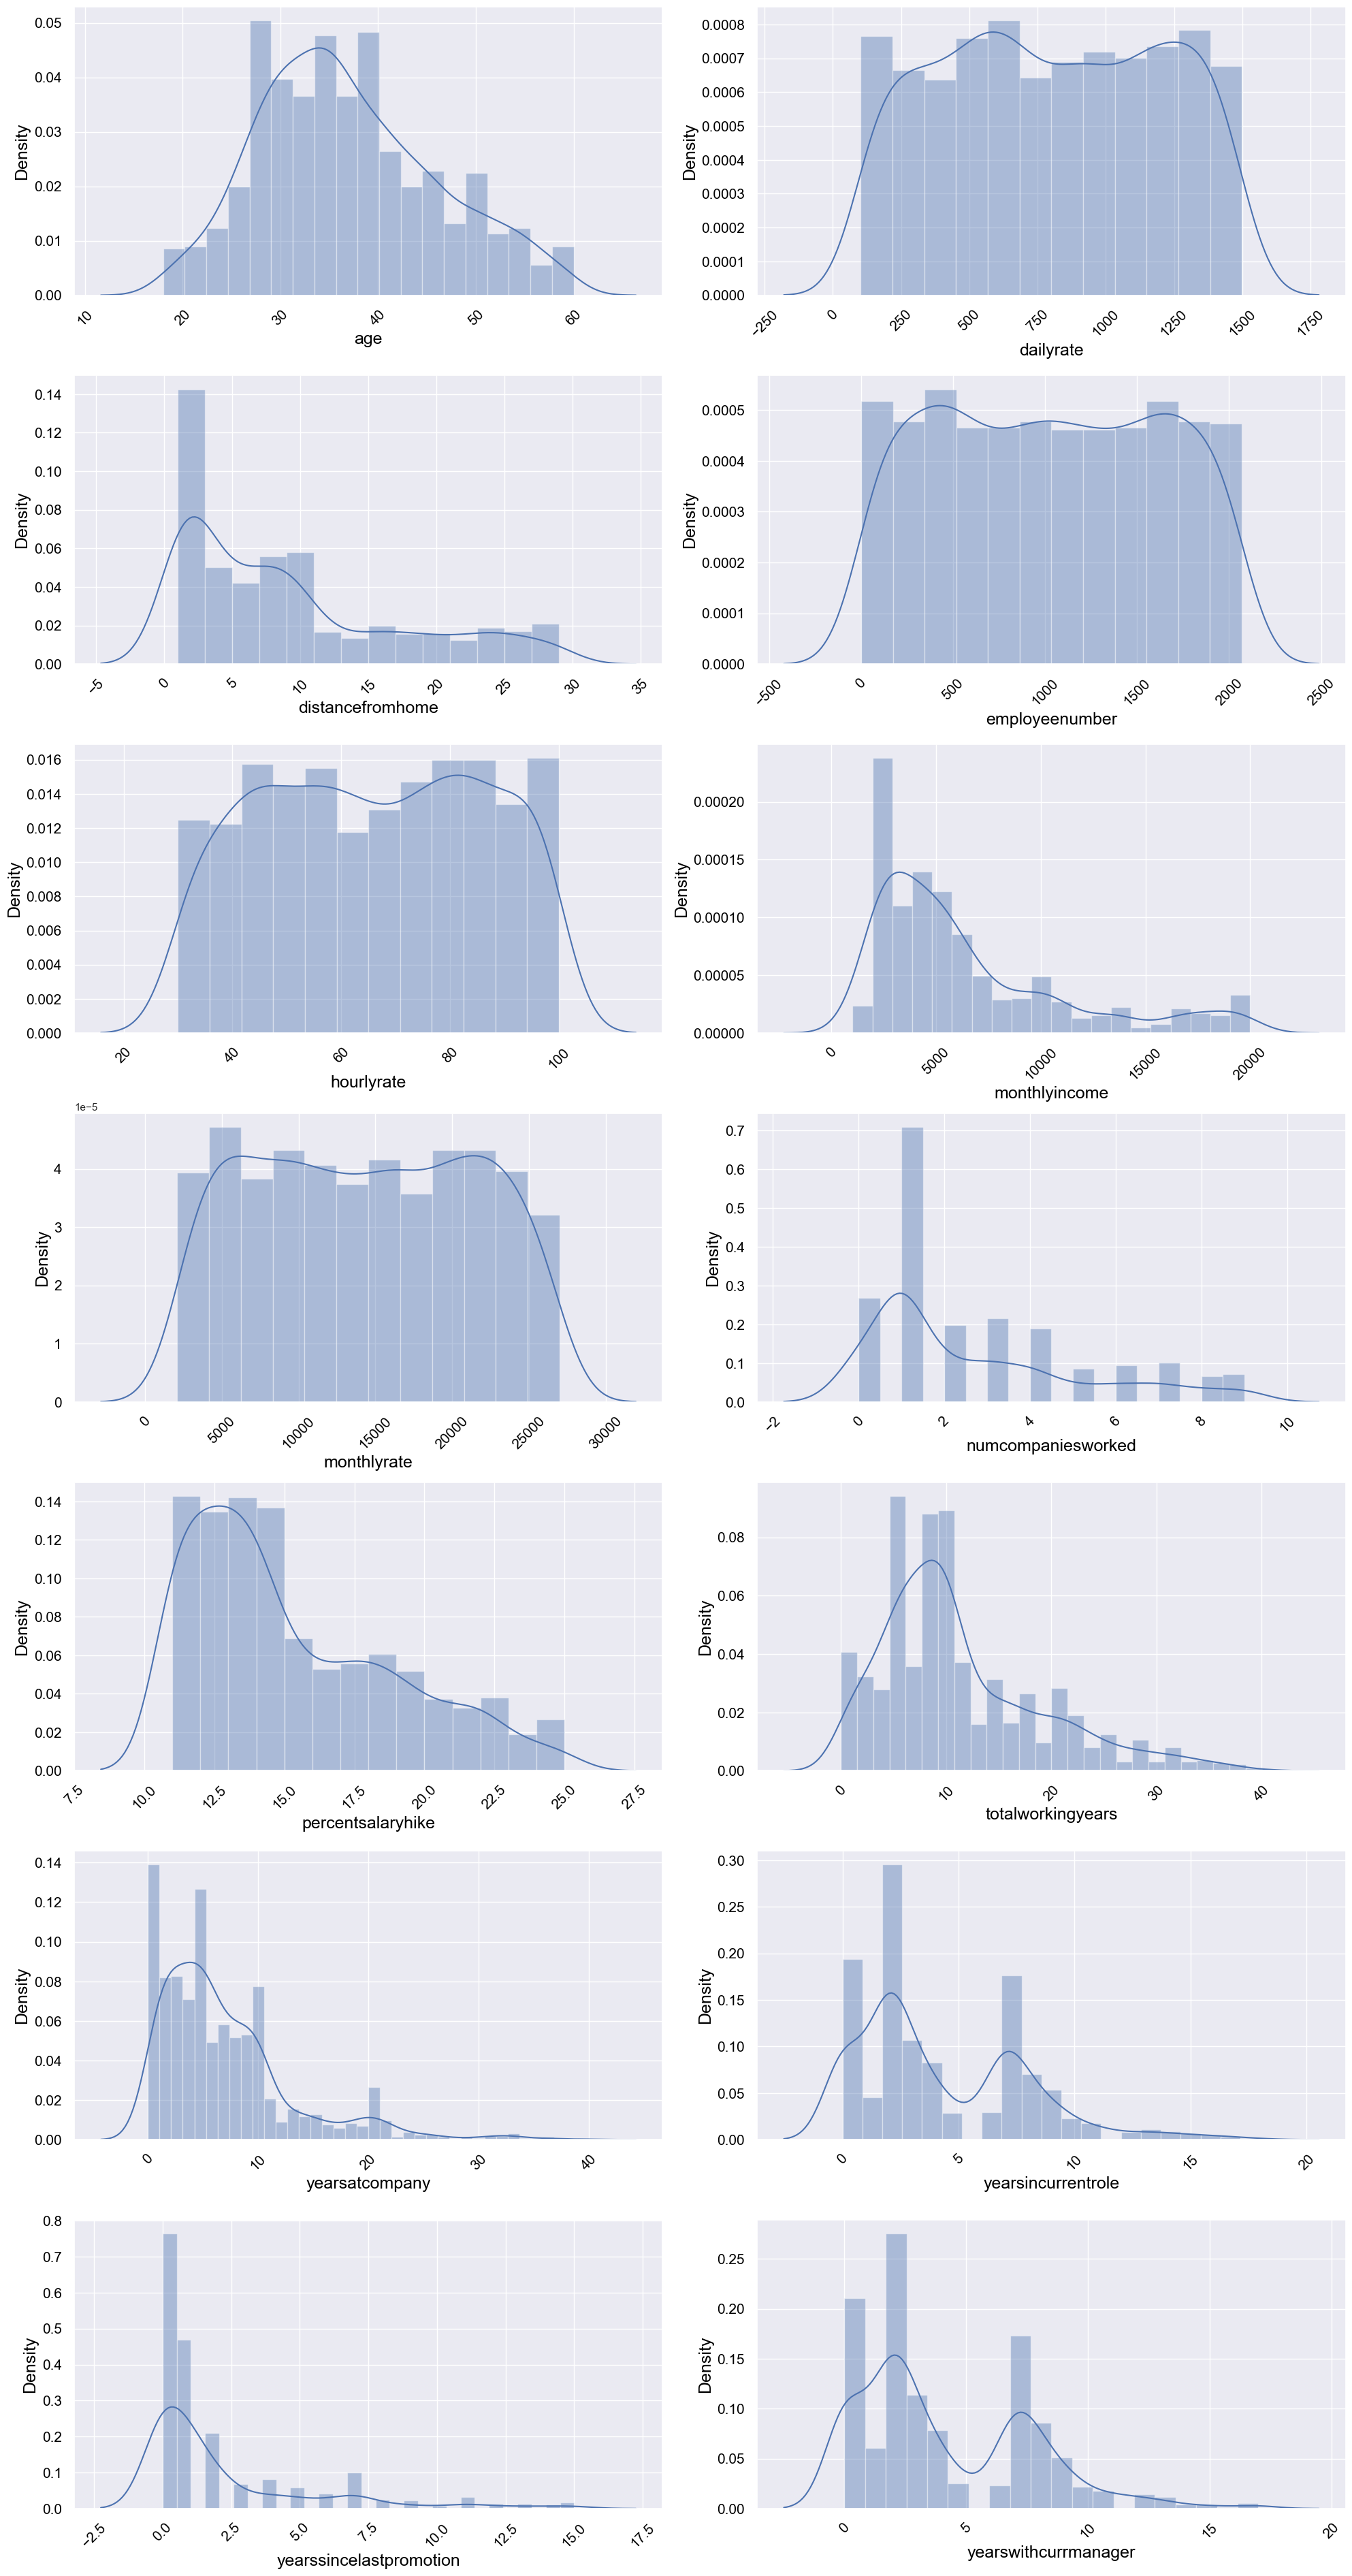

In [1245]:
fig = plt.figure(figsize=(20,140))
for index,col in enumerate (num_cols):
    plt.subplot(26,2,index+1)
    sns.distplot(x=hr[num_cols].iloc[:,index])
    plt.ylabel('Density', size = 18,color="black")
    plt.xlabel(col, fontsize = 18,color="black")

    plt.xticks(size = 15,color="black", rotation = 45 )
    plt.yticks(size = 15,color="black" )

fig.tight_layout(pad=1.0)

# Feature Engineering

In [1247]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report

# from sklearn.linear_model import LogisticRegression  #1
# from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
# from sklearn.model_selection import GridSearchCV, cross_validate
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier, VotingClassifier     #2
# from sklearn.svm import SVC

# from catboost import CatBoostClassifier       #3
# from lightgbm import LGBMClassifier
# from xgboost import XGBClassifier

## Missing Values

## Outliers

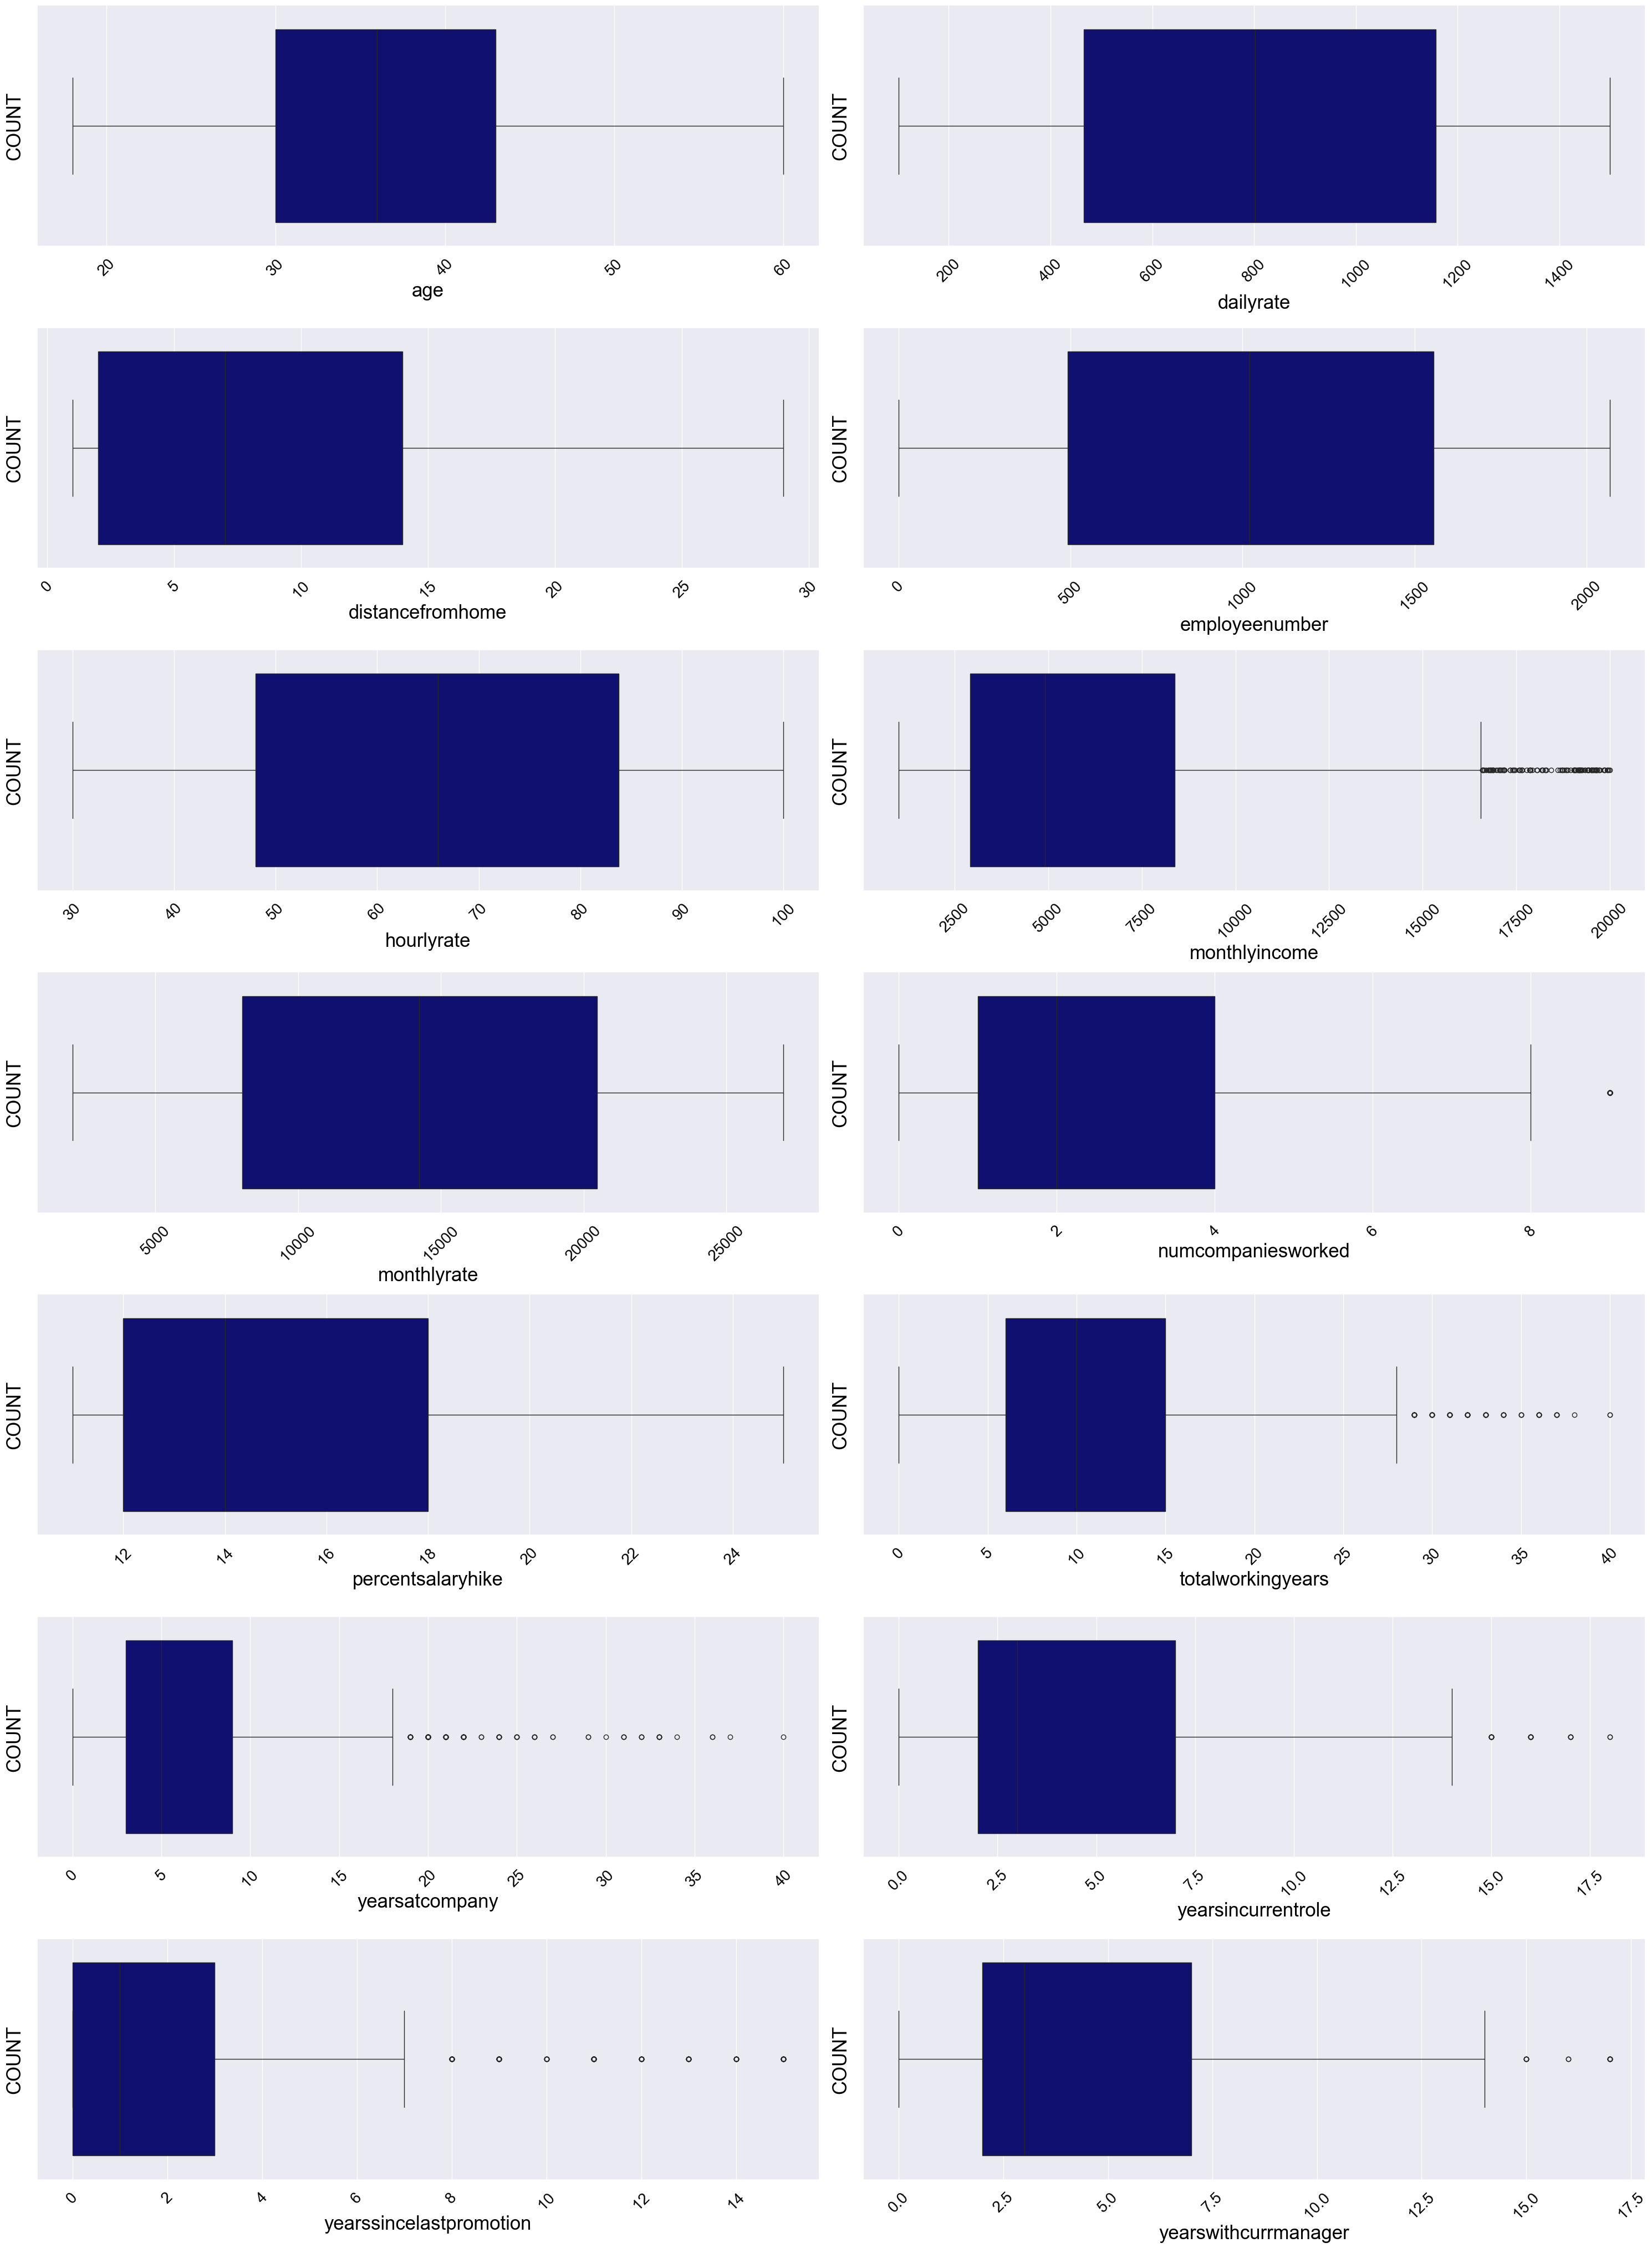

In [1250]:
fig = plt.figure(figsize=(30,150))
for index,col in enumerate(num_cols):
    plt.subplot(26,2,index+1)
    sns.boxplot(x=col, data=hr[num_cols].dropna(), color='navy')
    plt.ylabel('COUNT', size = 25,color="black" )
    plt.xlabel(col, fontsize = 25,color="black" )
    plt.xticks(size = 20,color="black", rotation = 45 )
    plt.yticks(size = 20,color="black" )

fig.tight_layout(pad=1.0)

### Outlier Eşiğini Belirliyoruz

In [1252]:
def outlier_thresholds(dataframe, col_name, q1=0.25, q3=0.75):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

In [1253]:
for col in num_cols:
    print(col, outlier_thresholds(hr, col))

age (10.5, 62.5)
dailyrate (-573.0, 2195.0)
distancefromhome (-16.0, 32.0)
employeenumber (-1105.5, 3152.5)
hourlyrate (-5.625, 137.375)
monthlyincome (-5291.0, 16581.0)
monthlyrate (-10574.75, 39083.25)
numcompaniesworked (-3.5, 8.5)
percentsalaryhike (3.0, 27.0)
totalworkingyears (-7.5, 28.5)
yearsatcompany (-6.0, 18.0)
yearsincurrentrole (-5.5, 14.5)
yearssincelastpromotion (-4.5, 7.5)
yearswithcurrmanager (-5.5, 14.5)


### Outlier Kontrolü

In [1255]:
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

In [1256]:
for col in num_cols:
    print(col, check_outlier(hr, col))

age False
dailyrate False
distancefromhome False
employeenumber False
hourlyrate False
monthlyincome True
monthlyrate False
numcompaniesworked True
percentsalaryhike False
totalworkingyears True
yearsatcompany True
yearsincurrentrole True
yearssincelastpromotion True
yearswithcurrmanager True


### Outlier'ları Trashold Değerlerine Baskılama(Capping)

In [1258]:
def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [1259]:
for col in num_cols:
    replace_with_thresholds(hr, col)

In [1260]:
# Tekrar kontrol ediyoruz
for col in num_cols:
    print(col, check_outlier(hr, col))

age False
dailyrate False
distancefromhome False
employeenumber False
hourlyrate False
monthlyincome False
monthlyrate False
numcompaniesworked False
percentsalaryhike False
totalworkingyears False
yearsatcompany False
yearsincurrentrole False
yearssincelastpromotion False
yearswithcurrmanager False


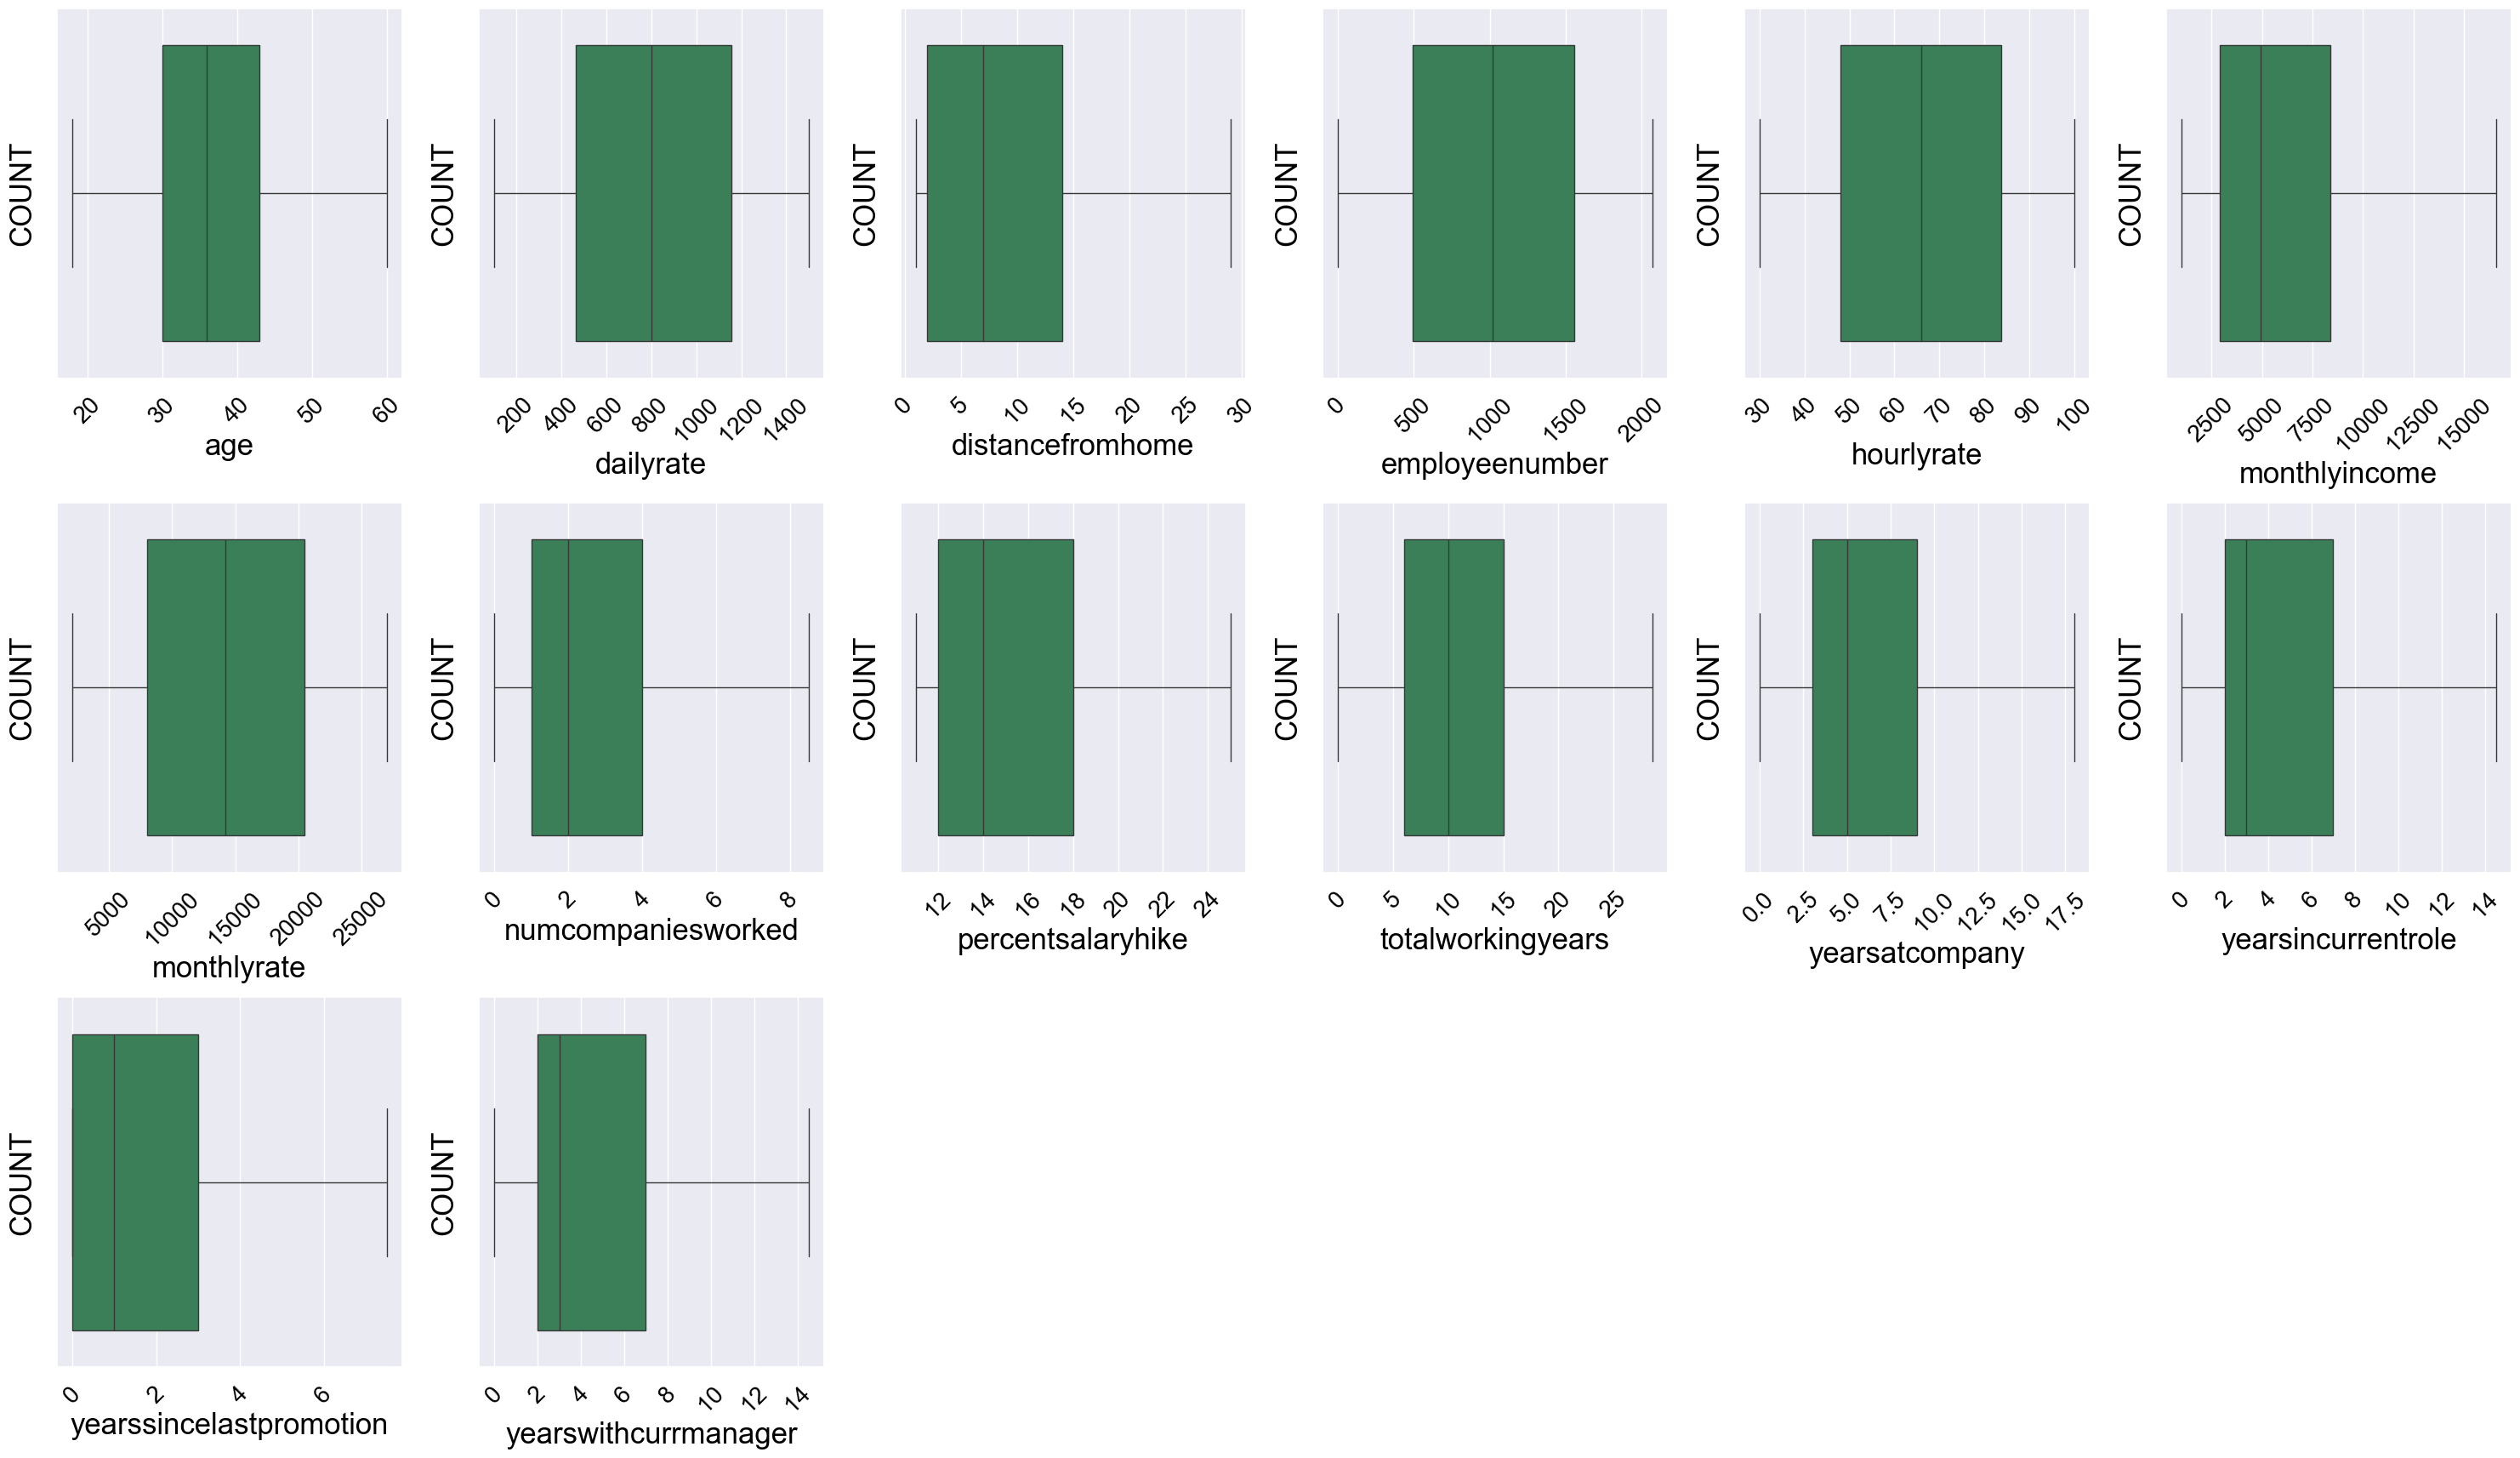

In [1261]:
# After capping Outliers

fig = plt.figure(figsize=(30,150))
for index,col in enumerate(num_cols):
    plt.subplot(26,6,index+1)
    sns.boxplot(x=col, data=hr.dropna(), color='seagreen')
    plt.ylabel('COUNT', size = 25,color="black" )
    plt.xlabel(col, fontsize = 25,color="black" )
    plt.xticks(size = 20,color="black", rotation = 45 )
    plt.yticks(size = 20,color="black" )

fig.tight_layout(pad=1.0)


## Creating New Features

In [1263]:
hr['NEW_tenureratio'] = hr['yearsatcompany'] / hr['totalworkingyears']
hr['NEW_promotiongap'] = hr['yearsatcompany'] - hr['yearssincelastpromotion']
hr['NEW_rolestabilityratio'] = hr['yearsincurrentrole'] / hr['yearsatcompany']
hr['NEW_managertenureratio'] = hr['yearswithcurrmanager'] / hr['yearsatcompany']
hr["NEW_Income-Rate"] = hr["monthlyincome"] / hr["monthlyrate"]

In [1264]:
age_bins = [18, 25, 35, 45, 55, 60]
age_labels = ["18–24", "25–34", "35–44", "45–54", "55–60"]
hr["NEW_age_cat"] = pd.cut(hr["age"], bins=age_bins, labels=age_labels, right=False)

## Label Encoding

In [1266]:
cat_cols, num_cols, cat_but_car, num_but_cat = grab_col_names(hr)

Observations: 1470
Variables: 38
cat_cols: 20
num_cols: 18
cat_but_car: 0
num_but_cat: 12


In [1267]:
hr["education"].value_counts(0)

education
3    572
4    398
2    282
1    170
5     48
Name: count, dtype: int64

In [1268]:
num_but_cat

['education',
 'environmentsatisfaction',
 'jobinvolvement',
 'joblevel',
 'jobsatisfaction',
 'performancerating',
 'relationshipsatisfaction',
 'stockoptionlevel',
 'trainingtimeslastyear',
 'worklifebalance',
 'yearssincelastpromotion',
 'att']

In [1269]:
def label_encoder(dataframe, binary_col):
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe

In [1270]:
binary_cols = [col for col in hr.columns if hr[col].dtypes == "O" and len(hr[col].unique()) == 2]

In [1271]:
binary_cols

['gender', 'overtime']

In [1272]:
hr[['gender', 'overtime']].head()

gender overtime
0  Female      Yes
1    Male       No
2    Male      Yes
3  Female      Yes
4    Male       No

In [1273]:
for col in binary_cols:
    label_encoder(hr, col)

In [1274]:
hr[['gender', 'overtime']].head()

gender  overtime
0       0         1
1       1         0
2       1         1
3       0         1
4       1         0

## One Hot Encoding

In [1276]:
cat_cols, num_cols, cat_but_car, num_but_cat = grab_col_names(hr)

Observations: 1470
Variables: 38
cat_cols: 20
num_cols: 18
cat_but_car: 0
num_but_cat: 14


In [1277]:
def one_hot_encoder(dataframe, categorical_cols, drop_first=False):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe

In [1278]:
hr_onehotencoded = one_hot_encoder(hr, cat_cols, drop_first=True)

In [1279]:
hr_onehotencoded.shape

(1470, 85)

In [1280]:
hr_onehotencoded.head(10)

age  dailyrate  distancefromhome  employeenumber  hourlyrate  monthlyincome  monthlyrate  numcompaniesworked  percentsalaryhike  totalworkingyears  yearsatcompany  yearsincurrentrole  yearswithcurrmanager  NEW_tenureratio  NEW_promotiongap  NEW_rolestabilityratio  NEW_managertenureratio  NEW_Income-Rate  businesstravel_Travel_Frequently  businesstravel_Travel_Rarely  department_Research & Development  department_Sales  educationfield_Life Sciences  educationfield_Marketing  educationfield_Medical  educationfield_Other  educationfield_Technical Degree  jobrole_Human Resources  jobrole_Laboratory Technician  jobrole_Manager  jobrole_Manufacturing Director  jobrole_Research Director  jobrole_Research Scientist  jobrole_Sales Executive  jobrole_Sales Representative  maritalstatus_Married  maritalstatus_Single  NEW_age_cat_25–34  NEW_age_cat_35–44  NEW_age_cat_45–54  NEW_age_cat_55–60  education_2  education_3  education_4  education_5  environmentsatisfaction_2  environmentsatisfaction_3  environmentsatisfaction_4  gender_1  jobinvolvement_2  jobinvolvement_3  jobinvolvement_4  joblevel_2  joblevel_3  joblevel_4  joblevel_5  jobsatisfaction_2  jobsatisfaction_3  jobsatisfaction_4  overtime_1  performancerating_4  relationshipsatisfaction_2  relationshipsatisfaction_3  relationshipsatisfaction_4  stockoptionlevel_1  stockoptionlevel_2  stockoptionlevel_3  trainingtimeslastyear_1  trainingtimeslastyear_2  trainingtimeslastyear_3  trainingtimeslastyear_4  trainingtimeslastyear_5  trainingtimeslastyear_6  worklifebalance_2  worklifebalance_3  worklifebalance_4  yearssincelastpromotion_1.0  yearssincelastpromotion_2.0  yearssincelastpromotion_3.0  yearssincelastpromotion_4.0  yearssincelastpromotion_5.0  yearssincelastpromotion_6.0  yearssincelastpromotion_7.0  yearssincelastpromotion_7.5  att_1
0 41.000       1102                 1           1.000      94.000           5993    19479.000               8.000                 11              8.000               6               4.000                 5.000            0.750             6.000                   0.667                   0.833            0.308                             False                          True                              False              True                          True                     False                   False                 False                            False                    False                          False            False                           False                      False                       False                     True                         False                  False                  True              False               True              False              False         True        False        False        False                       True                      False                      False     False             False              True             False        True       False       False       False              False              False               True        True                False                       False                       False                       False               False               False               False                    False                    False                    False                    False                    False                    False              False              False              False                        False                        False                        False                        False                        False                        False                        False                        False   True
1 49.000        279                 8           2.000      61.000           5130    24907.000               1.000                 23             10.000              10               7.000                 7.000            1.000             9.000                   0.700                   0.700            0.206                              True                

In [1281]:
column_list = hr_onehotencoded.columns.to_list()
column_list

['age',
 'dailyrate',
 'distancefromhome',
 'employeenumber',
 'hourlyrate',
 'monthlyincome',
 'monthlyrate',
 'numcompaniesworked',
 'percentsalaryhike',
 'totalworkingyears',
 'yearsatcompany',
 'yearsincurrentrole',
 'yearswithcurrmanager',
 'NEW_tenureratio',
 'NEW_promotiongap',
 'NEW_rolestabilityratio',
 'NEW_managertenureratio',
 'NEW_Income-Rate',
 'businesstravel_Travel_Frequently',
 'businesstravel_Travel_Rarely',
 'department_Research & Development',
 'department_Sales',
 'educationfield_Life Sciences',
 'educationfield_Marketing',
 'educationfield_Medical',
 'educationfield_Other',
 'educationfield_Technical Degree',
 'jobrole_Human Resources',
 'jobrole_Laboratory Technician',
 'jobrole_Manager',
 'jobrole_Manufacturing Director',
 'jobrole_Research Director',
 'jobrole_Research Scientist',
 'jobrole_Sales Executive',
 'jobrole_Sales Representative',
 'maritalstatus_Married',
 'maritalstatus_Single',
 'NEW_age_cat_25–34',
 'NEW_age_cat_35–44',
 'NEW_age_cat_45–54',
 'NEW

## Feature Scaling

In [1283]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

In [1284]:
hr = hr_onehotencoded.copy()

In [1285]:
cat_cols, num_cols, cat_but_car, num_but_cat = grab_col_names(hr)

Observations: 1470
Variables: 85
cat_cols: 67
num_cols: 18
cat_but_car: 0
num_but_cat: 0


In [1286]:
hr_onehotencoded.head()

age  dailyrate  distancefromhome  employeenumber  hourlyrate  monthlyincome  monthlyrate  numcompaniesworked  percentsalaryhike  totalworkingyears  yearsatcompany  yearsincurrentrole  yearswithcurrmanager  NEW_tenureratio  NEW_promotiongap  NEW_rolestabilityratio  NEW_managertenureratio  NEW_Income-Rate  businesstravel_Travel_Frequently  businesstravel_Travel_Rarely  department_Research & Development  department_Sales  educationfield_Life Sciences  educationfield_Marketing  educationfield_Medical  educationfield_Other  educationfield_Technical Degree  jobrole_Human Resources  jobrole_Laboratory Technician  jobrole_Manager  jobrole_Manufacturing Director  jobrole_Research Director  jobrole_Research Scientist  jobrole_Sales Executive  jobrole_Sales Representative  maritalstatus_Married  maritalstatus_Single  NEW_age_cat_25–34  NEW_age_cat_35–44  NEW_age_cat_45–54  NEW_age_cat_55–60  education_2  education_3  education_4  education_5  environmentsatisfaction_2  environmentsatisfaction_3  environmentsatisfaction_4  gender_1  jobinvolvement_2  jobinvolvement_3  jobinvolvement_4  joblevel_2  joblevel_3  joblevel_4  joblevel_5  jobsatisfaction_2  jobsatisfaction_3  jobsatisfaction_4  overtime_1  performancerating_4  relationshipsatisfaction_2  relationshipsatisfaction_3  relationshipsatisfaction_4  stockoptionlevel_1  stockoptionlevel_2  stockoptionlevel_3  trainingtimeslastyear_1  trainingtimeslastyear_2  trainingtimeslastyear_3  trainingtimeslastyear_4  trainingtimeslastyear_5  trainingtimeslastyear_6  worklifebalance_2  worklifebalance_3  worklifebalance_4  yearssincelastpromotion_1.0  yearssincelastpromotion_2.0  yearssincelastpromotion_3.0  yearssincelastpromotion_4.0  yearssincelastpromotion_5.0  yearssincelastpromotion_6.0  yearssincelastpromotion_7.0  yearssincelastpromotion_7.5  att_1
0 41.000       1102                 1           1.000      94.000           5993    19479.000               8.000                 11              8.000               6               4.000                 5.000            0.750             6.000                   0.667                   0.833            0.308                             False                          True                              False              True                          True                     False                   False                 False                            False                    False                          False            False                           False                      False                       False                     True                         False                  False                  True              False               True              False              False         True        False        False        False                       True                      False                      False     False             False              True             False        True       False       False       False              False              False               True        True                False                       False                       False                       False               False               False               False                    False                    False                    False                    False                    False                    False              False              False              False                        False                        False                        False                        False                        False                        False                        False                        False   True
1 49.000        279                 8           2.000      61.000           5130    24907.000               1.000                 23             10.000              10               7.000                 7.000            1.000             9.000                   0.700                   0.700            0.206                              True                

### Standard Scaling

In [1288]:
###################
# StandardScaler: Klasik standartlaştırma.
# Ortalamayı çıkar, standart sapmaya böl. z = (x - u) / s
###################

hr_ss = hr.copy()
ss = StandardScaler()
hr_ss[num_cols] = ss.fit_transform(hr_ss[num_cols])

In [1289]:
hr_ss.head()

age  dailyrate  distancefromhome  employeenumber  hourlyrate  monthlyincome  monthlyrate  numcompaniesworked  percentsalaryhike  totalworkingyears  yearsatcompany  yearsincurrentrole  yearswithcurrmanager  NEW_tenureratio  NEW_promotiongap  NEW_rolestabilityratio  NEW_managertenureratio  NEW_Income-Rate  businesstravel_Travel_Frequently  businesstravel_Travel_Rarely  department_Research & Development  department_Sales  educationfield_Life Sciences  educationfield_Marketing  educationfield_Medical  educationfield_Other  educationfield_Technical Degree  jobrole_Human Resources  jobrole_Laboratory Technician  jobrole_Manager  jobrole_Manufacturing Director  jobrole_Research Director  jobrole_Research Scientist  jobrole_Sales Executive  jobrole_Sales Representative  maritalstatus_Married  maritalstatus_Single  NEW_age_cat_25–34  NEW_age_cat_35–44  NEW_age_cat_45–54  NEW_age_cat_55–60  education_2  education_3  education_4  education_5  environmentsatisfaction_2  environmentsatisfaction_3  environmentsatisfaction_4  gender_1  jobinvolvement_2  jobinvolvement_3  jobinvolvement_4  joblevel_2  joblevel_3  joblevel_4  joblevel_5  jobsatisfaction_2  jobsatisfaction_3  jobsatisfaction_4  overtime_1  performancerating_4  relationshipsatisfaction_2  relationshipsatisfaction_3  relationshipsatisfaction_4  stockoptionlevel_1  stockoptionlevel_2  stockoptionlevel_3  trainingtimeslastyear_1  trainingtimeslastyear_2  trainingtimeslastyear_3  trainingtimeslastyear_4  trainingtimeslastyear_5  trainingtimeslastyear_6  worklifebalance_2  worklifebalance_3  worklifebalance_4  yearssincelastpromotion_1.0  yearssincelastpromotion_2.0  yearssincelastpromotion_3.0  yearssincelastpromotion_4.0  yearssincelastpromotion_5.0  yearssincelastpromotion_6.0  yearssincelastpromotion_7.0  yearssincelastpromotion_7.5  att_1
0  0.446      0.743            -1.011          -1.701       1.383         -0.085        0.726               2.170             -1.151             -0.425          -0.124              -0.058                 0.254            0.248             0.322                   0.202                   0.778           -0.436                             False                          True                              False              True                          True                     False                   False                 False                            False                    False                          False            False                           False                      False                       False                     True                         False                  False                  True              False               True              False              False         True        False        False        False                       True                      False                      False     False             False              True             False        True       False       False       False              False              False               True        True                False                       False                       False                       False               False               False               False                    False                    False                    False                    False                    False                    False              False              False              False                        False                        False                        False                        False                        False                        False                        False                        False   True
1  1.322     -1.298            -0.147          -1.700      -0.241         -0.283        1.489              -0.683              2.129             -0.151           0.678               0.786                 0.823            1.037             1.062                   0.307                   0.364           -0.564                              True                

### MinMax Scaling

In [1291]:
###################
# MinMaxScaler: Verilen 2 değer arasında değişken dönüşümü
###################

# X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
# X_scaled = X_std * (max - min) + min

hr_mms = hr.copy()
mms = MinMaxScaler()
hr_mms[num_cols] = mms.fit_transform(hr_mms[num_cols])


In [1292]:
hr_mms.describe().T

count  mean   std   min   25%   50%   75%   max
age                    1470.000 0.451 0.218 0.000 0.286 0.429 0.595 1.000
dailyrate              1470.000 0.501 0.289 0.000 0.260 0.501 0.755 1.000
distancefromhome       1470.000 0.293 0.290 0.000 0.036 0.214 0.464 1.000
employeenumber         1470.000 0.495 0.291 0.000 0.237 0.493 0.752 1.000
hourlyrate             1470.000 0.513 0.290 0.000 0.257 0.514 0.768 1.000
monthlyincome          1470.000 0.344 0.280 0.000 0.122 0.251 0.473 1.000
monthlyrate            1470.000 0.491 0.286 0.000 0.239 0.488 0.738 1.000
numcompaniesworked     1470.000 0.315 0.289 0.000 0.118 0.235 0.471 1.000
percentsalaryhike      1470.000 0.301 0.261 0.000 0.071 0.214 0.500 1.000
totalworkingyears      1470.000 0.390 0.256 0.000 0.211 0.351 0.526 1.000
yearsatcompany         1470.000 0.368 0.277 0.000 0.167 0.278 0.500 1.000
yearsincurrentrole     1470.000 0.290 0.245 0.000 0.138 0.207 0.483 1.000
yearswithcurrmanager   1470.000 0.283 0.243 0.000 0.138 0.207 0.483 1.000
NEW_tenureratio        1459.000 0.672 0.317 0.000 0.422 0.750 1.000 1.000
NEW_promotiongap       1470.000 0.261 0.225 0.000 0.056 0.222 0.389 1.000
NEW_rolestabilityratio 1426.000 0.602 0.318 0.000 0.400 0.667 0.833 1.000
NEW_managertenureratio 1426.000 0.583 0.322 0.000 0.400 0.667 0.806 1.000
NEW_Income-Rate        1470.000 0.079 0.102 0.000 0.024 0.046 0.095 1.000

In [1293]:
hr_mms.head()

age  dailyrate  distancefromhome  employeenumber  hourlyrate  monthlyincome  monthlyrate  numcompaniesworked  percentsalaryhike  totalworkingyears  yearsatcompany  yearsincurrentrole  yearswithcurrmanager  NEW_tenureratio  NEW_promotiongap  NEW_rolestabilityratio  NEW_managertenureratio  NEW_Income-Rate  businesstravel_Travel_Frequently  businesstravel_Travel_Rarely  department_Research & Development  department_Sales  educationfield_Life Sciences  educationfield_Marketing  educationfield_Medical  educationfield_Other  educationfield_Technical Degree  jobrole_Human Resources  jobrole_Laboratory Technician  jobrole_Manager  jobrole_Manufacturing Director  jobrole_Research Director  jobrole_Research Scientist  jobrole_Sales Executive  jobrole_Sales Representative  maritalstatus_Married  maritalstatus_Single  NEW_age_cat_25–34  NEW_age_cat_35–44  NEW_age_cat_45–54  NEW_age_cat_55–60  education_2  education_3  education_4  education_5  environmentsatisfaction_2  environmentsatisfaction_3  environmentsatisfaction_4  gender_1  jobinvolvement_2  jobinvolvement_3  jobinvolvement_4  joblevel_2  joblevel_3  joblevel_4  joblevel_5  jobsatisfaction_2  jobsatisfaction_3  jobsatisfaction_4  overtime_1  performancerating_4  relationshipsatisfaction_2  relationshipsatisfaction_3  relationshipsatisfaction_4  stockoptionlevel_1  stockoptionlevel_2  stockoptionlevel_3  trainingtimeslastyear_1  trainingtimeslastyear_2  trainingtimeslastyear_3  trainingtimeslastyear_4  trainingtimeslastyear_5  trainingtimeslastyear_6  worklifebalance_2  worklifebalance_3  worklifebalance_4  yearssincelastpromotion_1.0  yearssincelastpromotion_2.0  yearssincelastpromotion_3.0  yearssincelastpromotion_4.0  yearssincelastpromotion_5.0  yearssincelastpromotion_6.0  yearssincelastpromotion_7.0  yearssincelastpromotion_7.5  att_1
0 0.548      0.716             0.000           0.000       0.914          0.320        0.698               0.941              0.000              0.281           0.333               0.276                 0.345            0.750             0.333                   0.667                   0.833            0.035                             False                          True                              False              True                          True                     False                   False                 False                            False                    False                          False            False                           False                      False                       False                     True                         False                  False                  True              False               True              False              False         True        False        False        False                       True                      False                      False     False             False              True             False        True       False       False       False              False              False               True        True                False                       False                       False                       False               False               False               False                    False                    False                    False                    False                    False                    False              False              False              False                        False                        False                        False                        False                        False                        False                        False                        False   True
1 0.738      0.127             0.250           0.000       0.443          0.265        0.916               0.118              0.857              0.351           0.556               0.483                 0.483            1.000             0.500                   0.700                   0.700            0.022                              True                  

count   1470.000
mean       0.451
std        0.218
min        0.000
5%         0.143
10%        0.190
25%        0.286
50%        0.429
75%        0.595
90%        0.762
95%        0.857
max        1.000
Name: age, dtype: float64


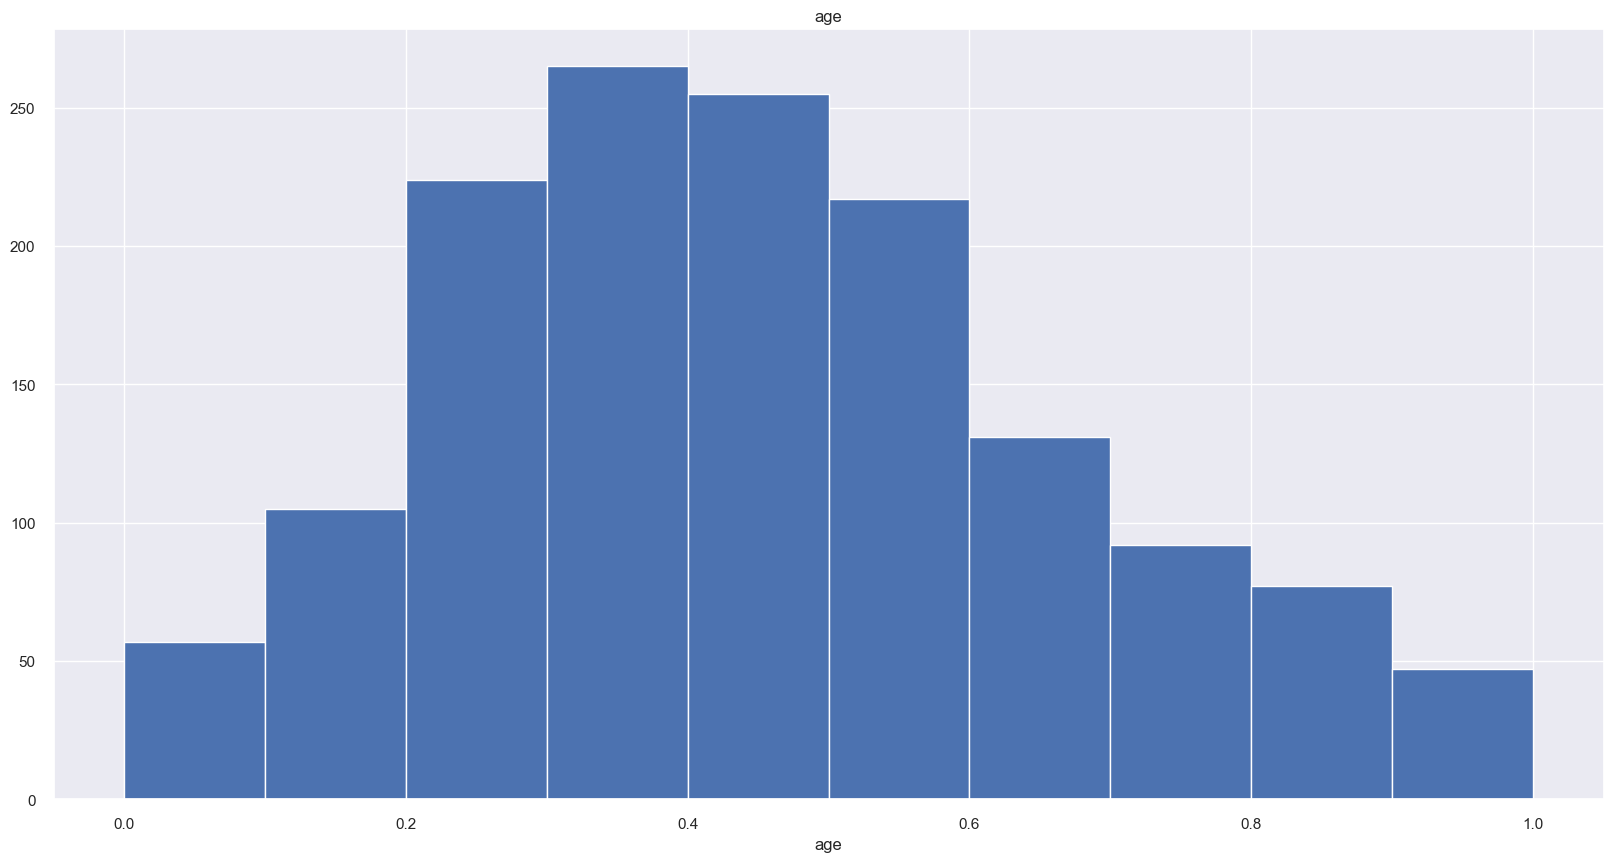

#####################
 
count   1470.000
mean       0.501
std        0.289
min        0.000
5%         0.045
10%        0.101
25%        0.260
50%        0.501
75%        0.755
90%        0.898
95%        0.946
max        1.000
Name: dailyrate, dtype: float64


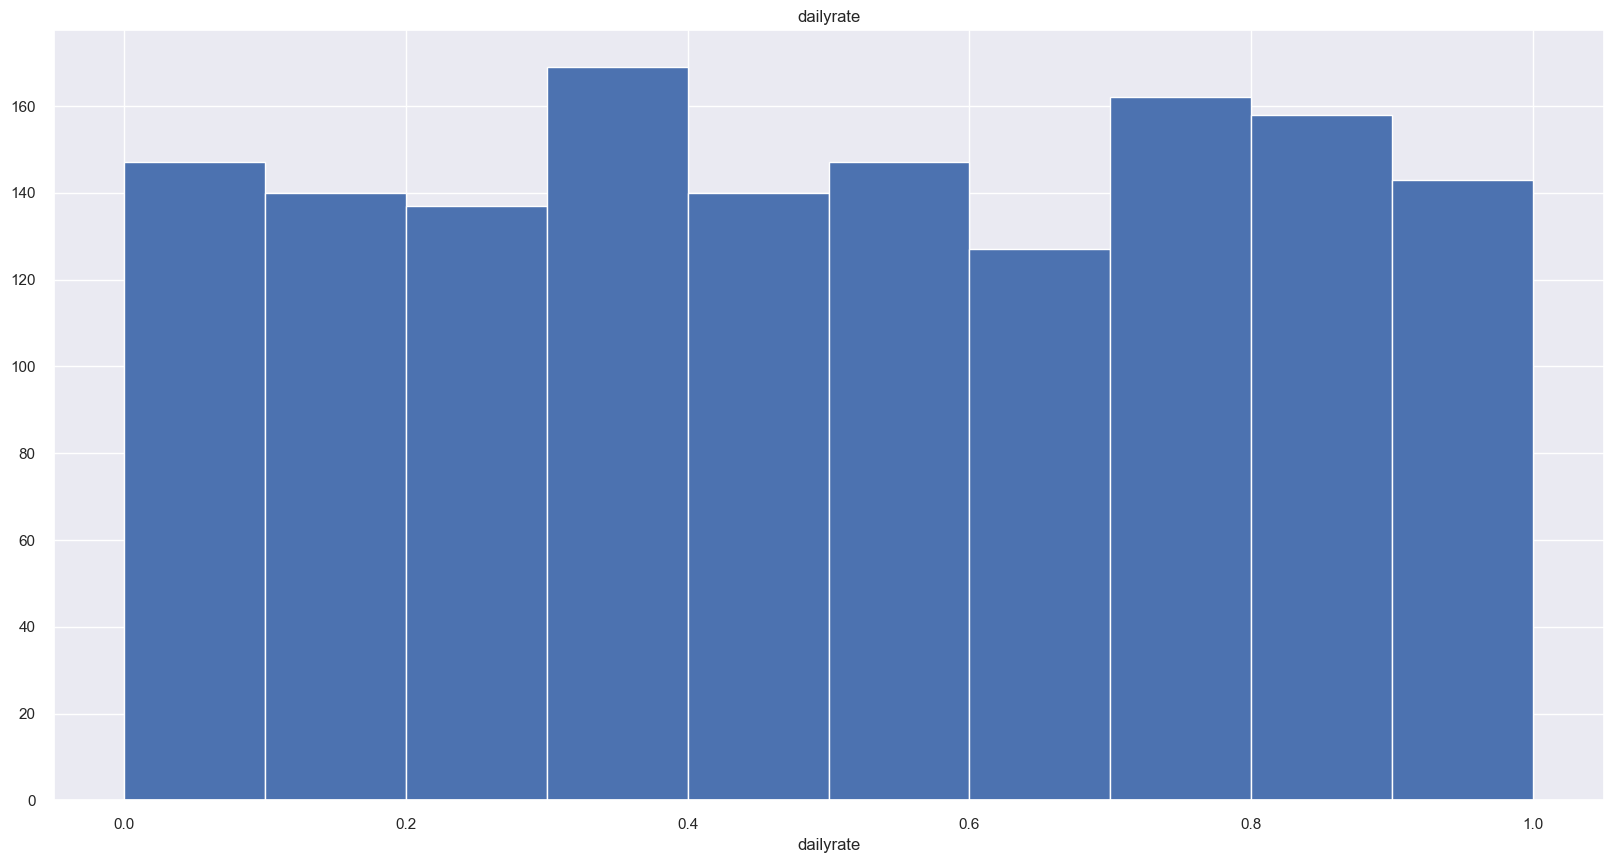

#####################
 
count   1470.000
mean       0.293
std        0.290
min        0.000
5%         0.000
10%        0.000
25%        0.036
50%        0.214
75%        0.464
90%        0.786
95%        0.893
max        1.000
Name: distancefromhome, dtype: float64


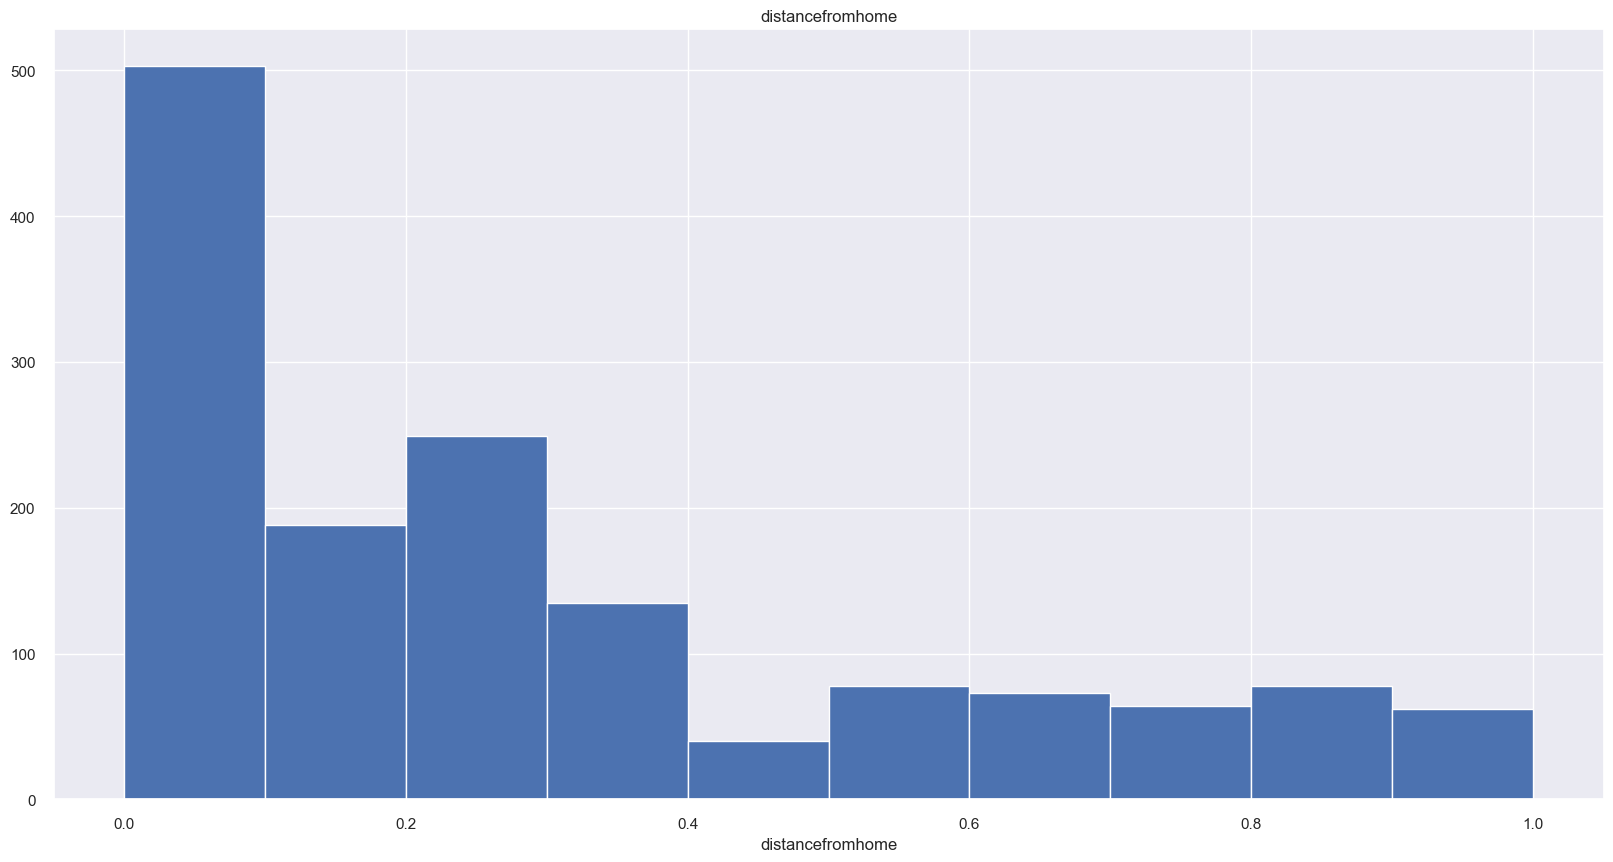

#####################
 
count   1470.000
mean       0.495
std        0.291
min        0.000
5%         0.046
10%        0.096
25%        0.237
50%        0.493
75%        0.752
90%        0.898
95%        0.951
max        1.000
Name: employeenumber, dtype: float64


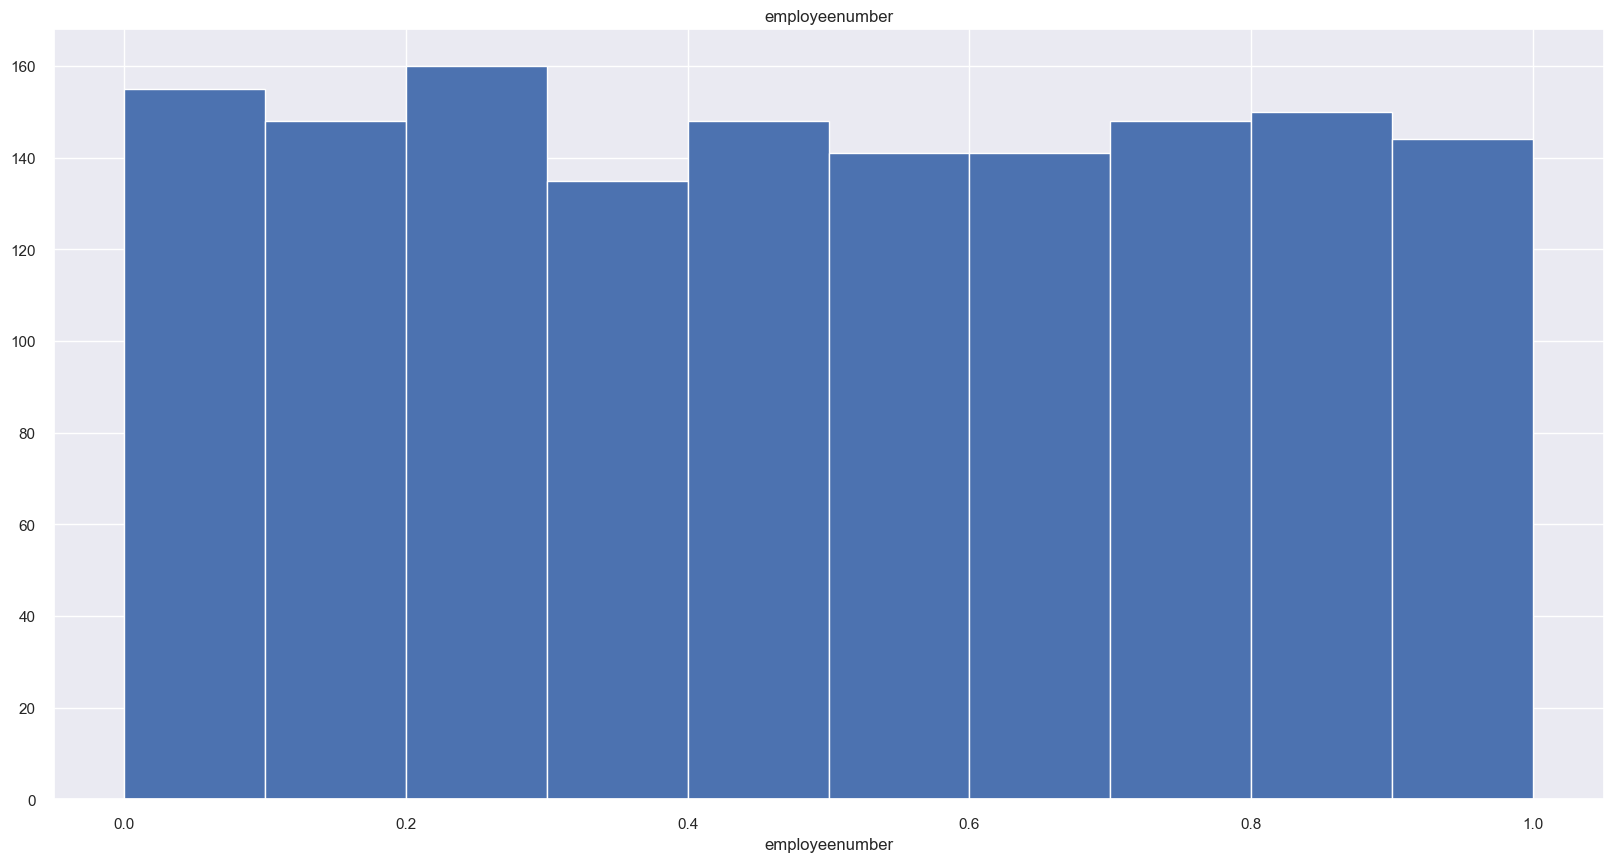

#####################
 
count   1470.000
mean       0.513
std        0.290
min        0.000
5%         0.043
10%        0.114
25%        0.257
50%        0.514
75%        0.768
90%        0.914
95%        0.957
max        1.000
Name: hourlyrate, dtype: float64


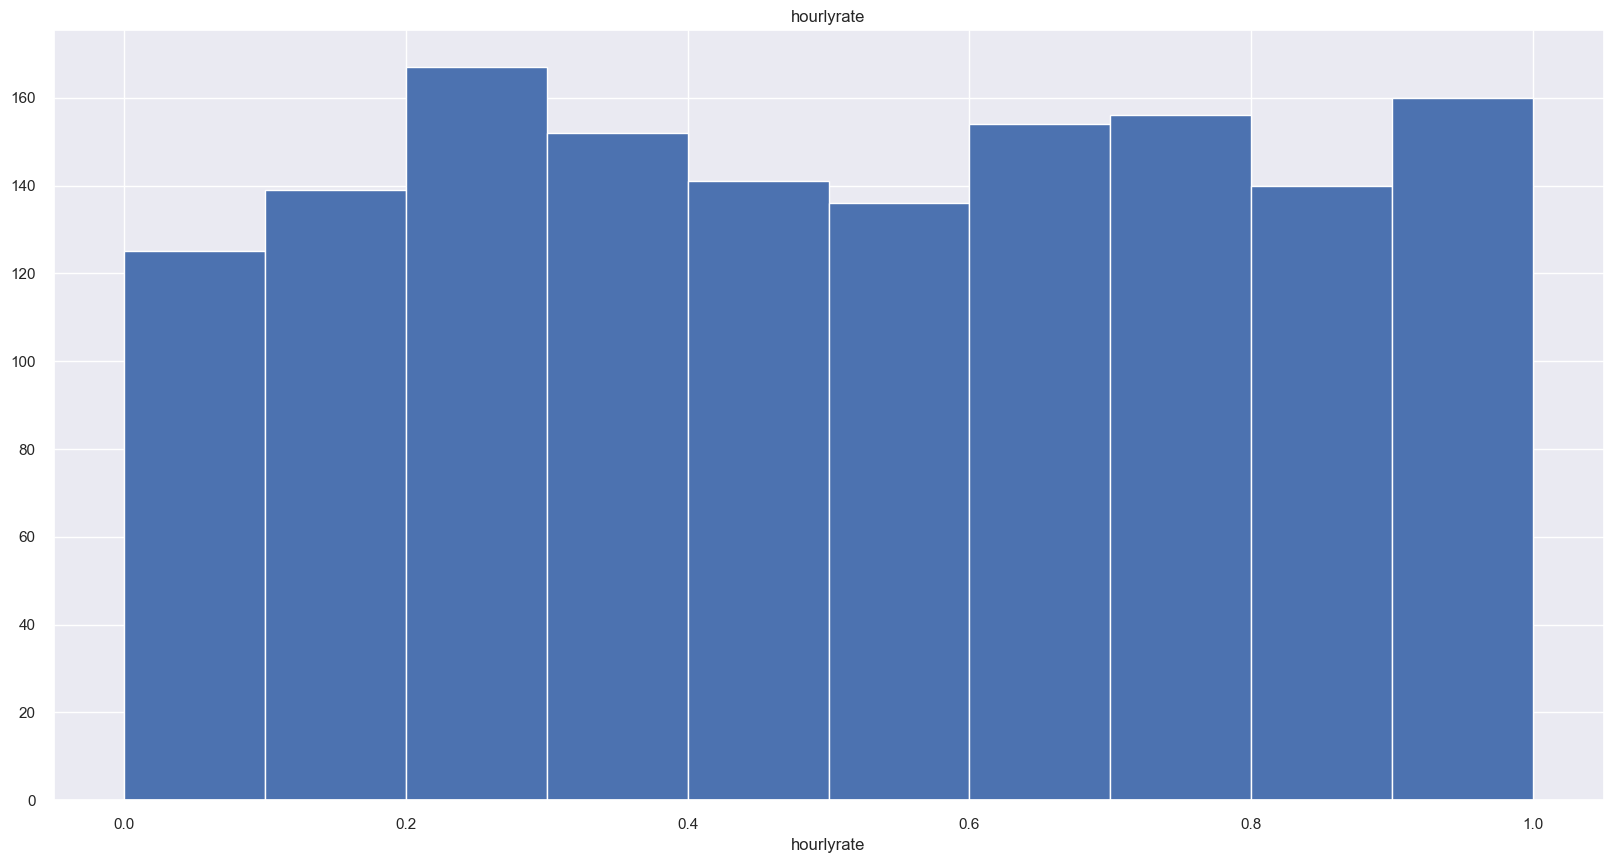

#####################
 
count   1470.000
mean       0.344
std        0.280
min        0.000
5%         0.070
10%        0.084
25%        0.122
50%        0.251
75%        0.473
90%        0.820
95%        1.000
max        1.000
Name: monthlyincome, dtype: float64


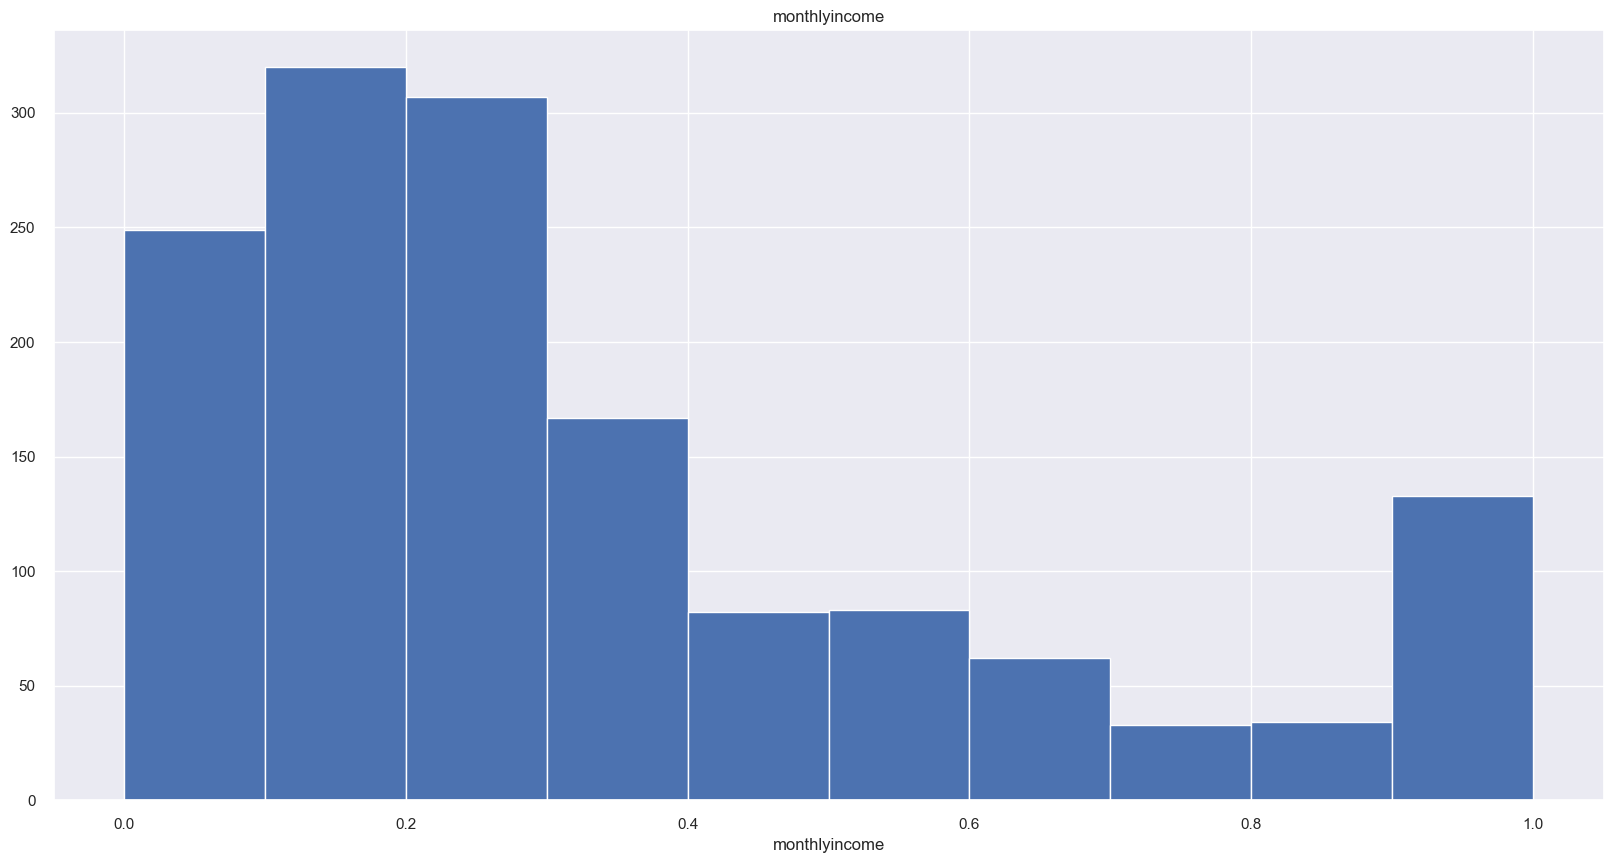

#####################
 
count   1470.000
mean       0.491
std        0.286
min        0.000
5%         0.052
10%        0.101
25%        0.239
50%        0.488
75%        0.738
90%        0.880
95%        0.937
max        1.000
Name: monthlyrate, dtype: float64


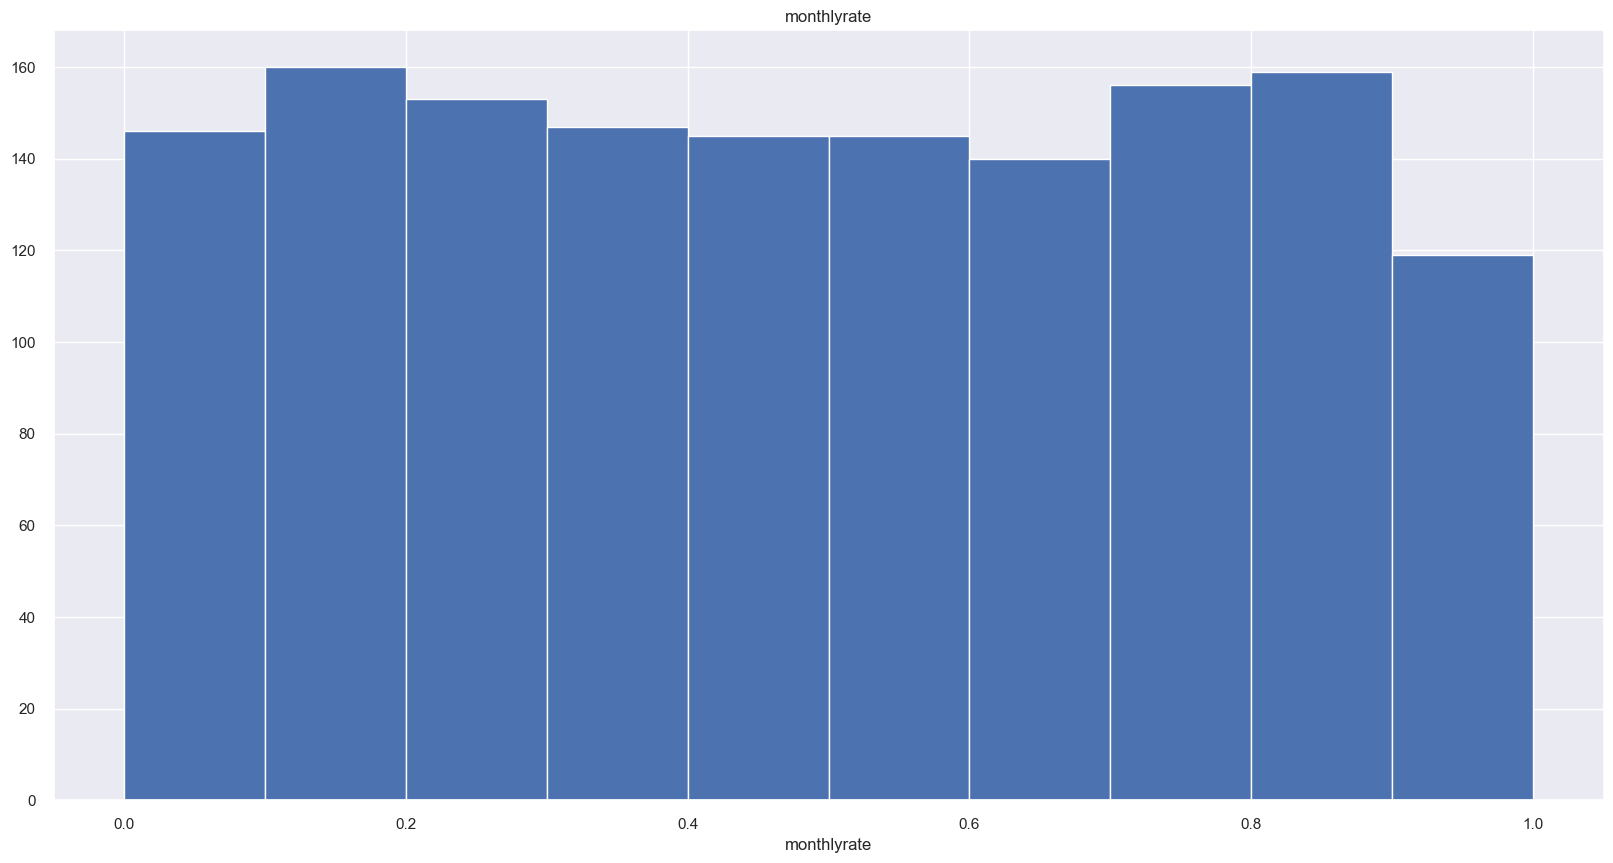

#####################
 
count   1470.000
mean       0.315
std        0.289
min        0.000
5%         0.000
10%        0.000
25%        0.118
50%        0.235
75%        0.471
90%        0.824
95%        0.941
max        1.000
Name: numcompaniesworked, dtype: float64


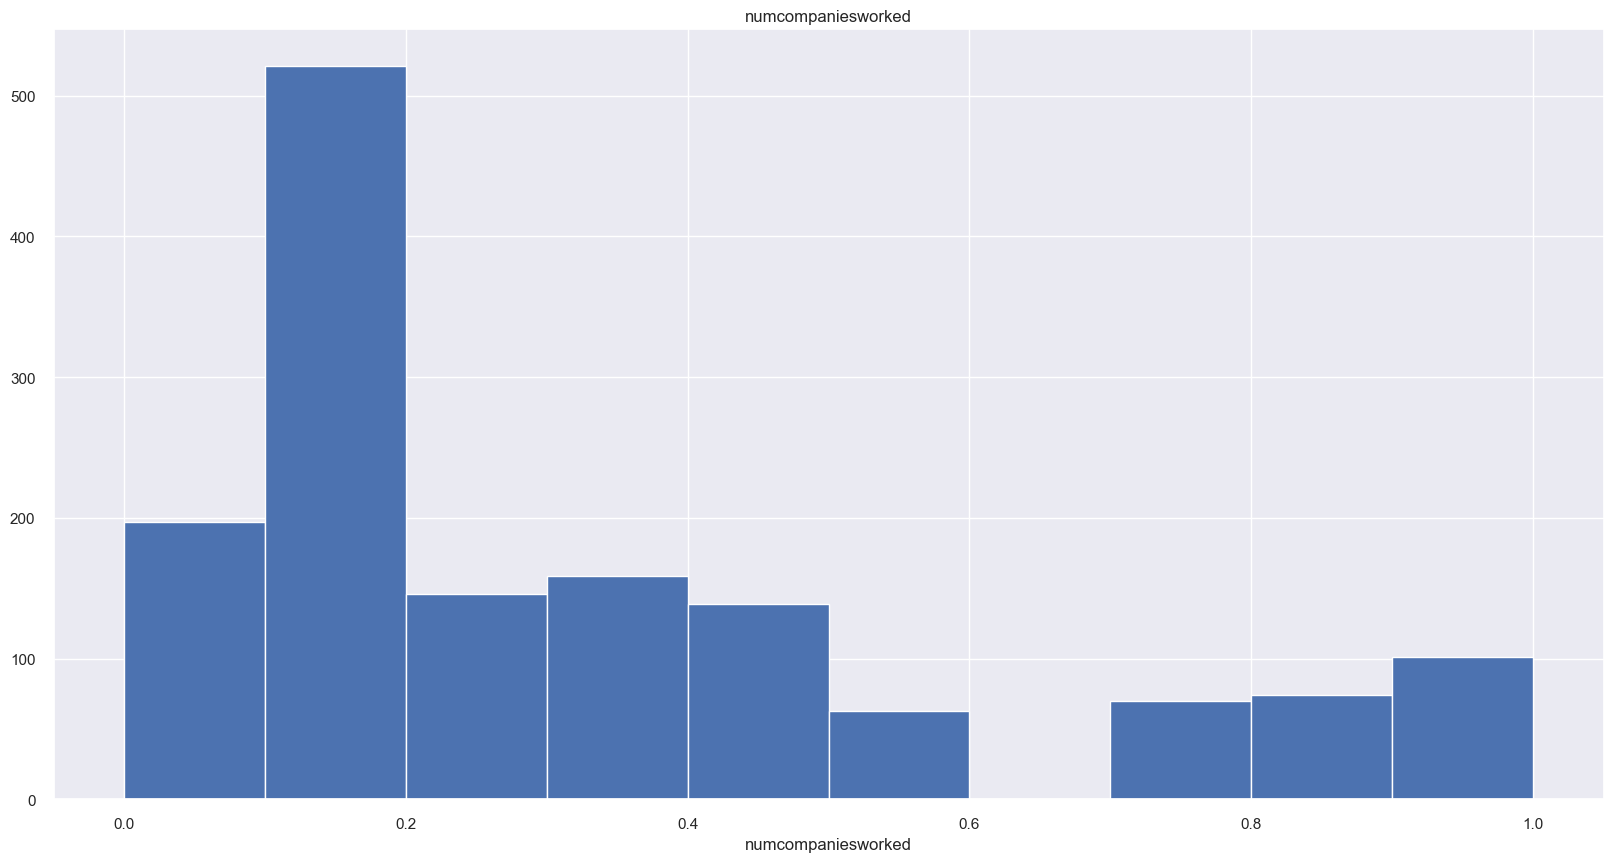

#####################
 
count   1470.000
mean       0.301
std        0.261
min        0.000
5%         0.000
10%        0.000
25%        0.071
50%        0.214
75%        0.500
90%        0.714
95%        0.786
max        1.000
Name: percentsalaryhike, dtype: float64


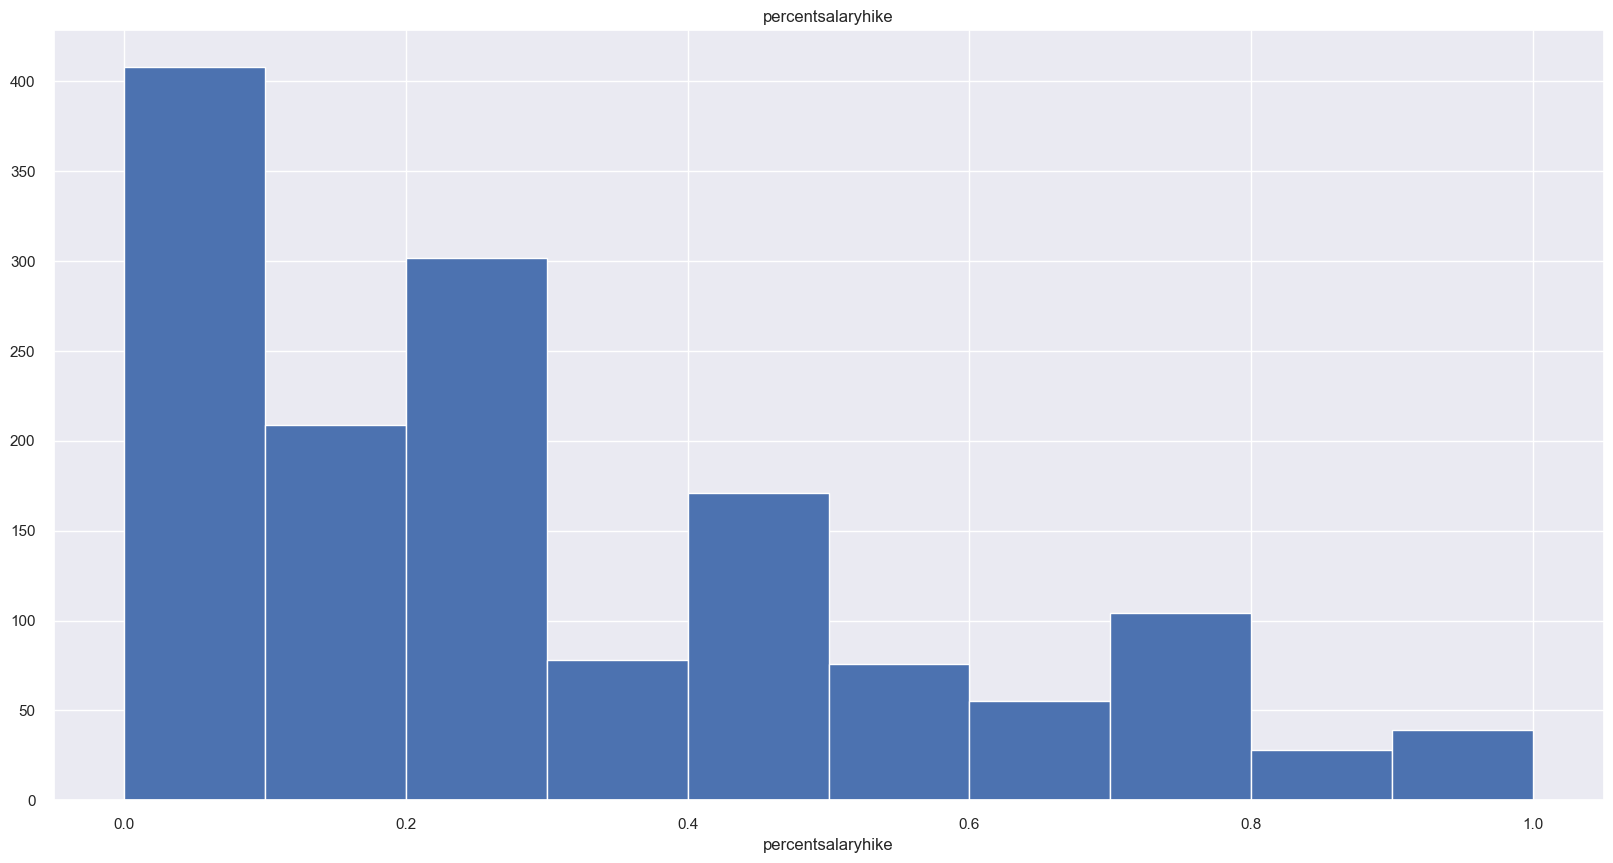

#####################
 
count   1470.000
mean       0.390
std        0.256
min        0.000
5%         0.035
10%        0.105
25%        0.211
50%        0.351
75%        0.526
90%        0.807
95%        0.982
max        1.000
Name: totalworkingyears, dtype: float64


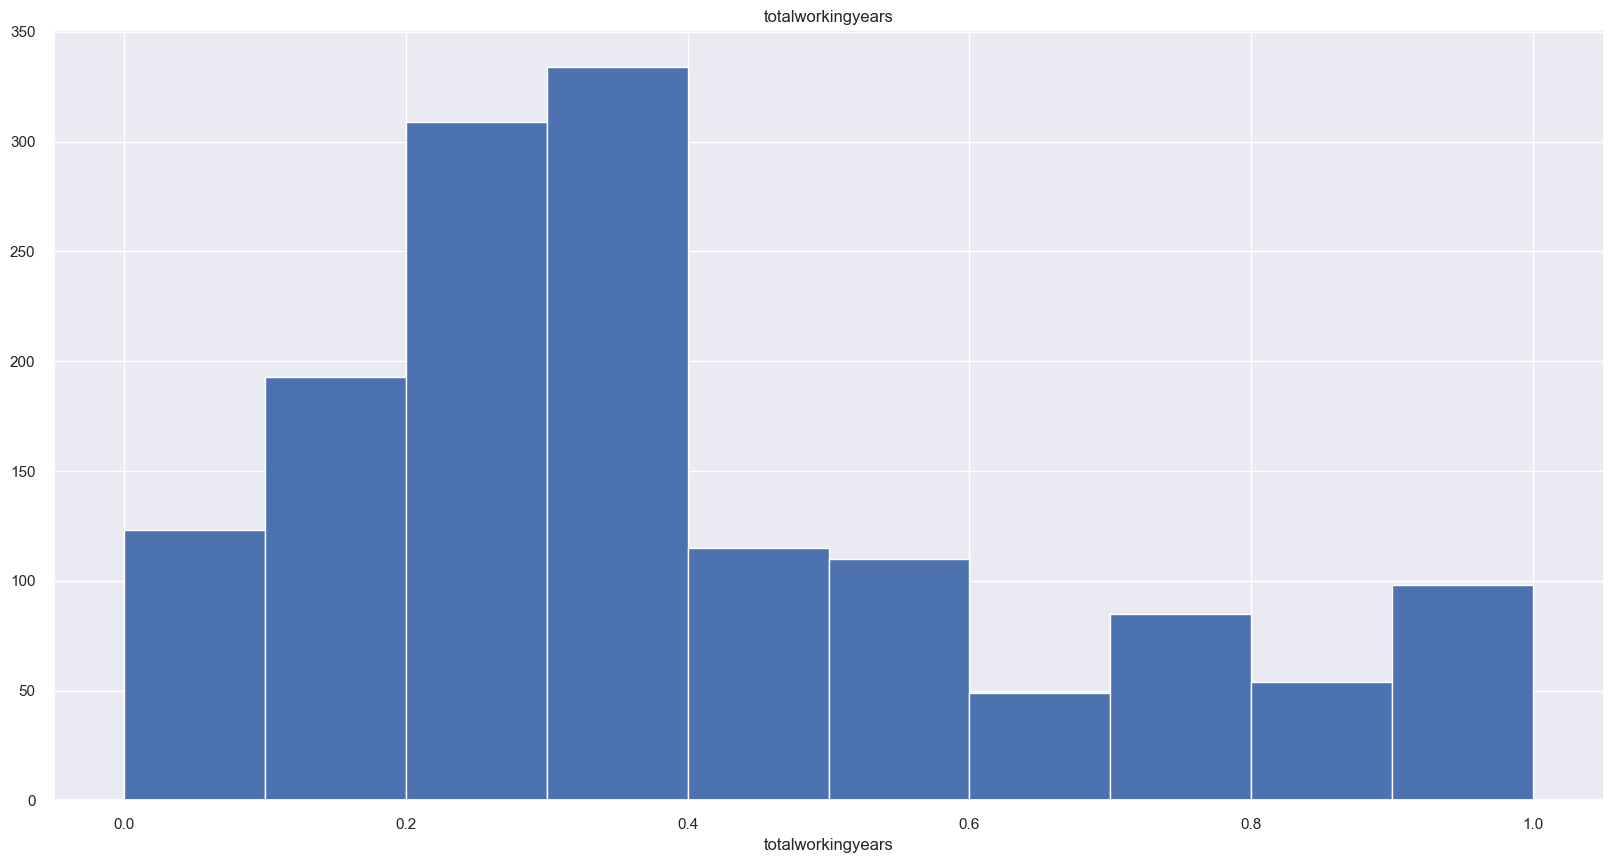

#####################
 
count   1470.000
mean       0.368
std        0.277
min        0.000
5%         0.056
10%        0.056
25%        0.167
50%        0.278
75%        0.500
90%        0.833
95%        1.000
max        1.000
Name: yearsatcompany, dtype: float64


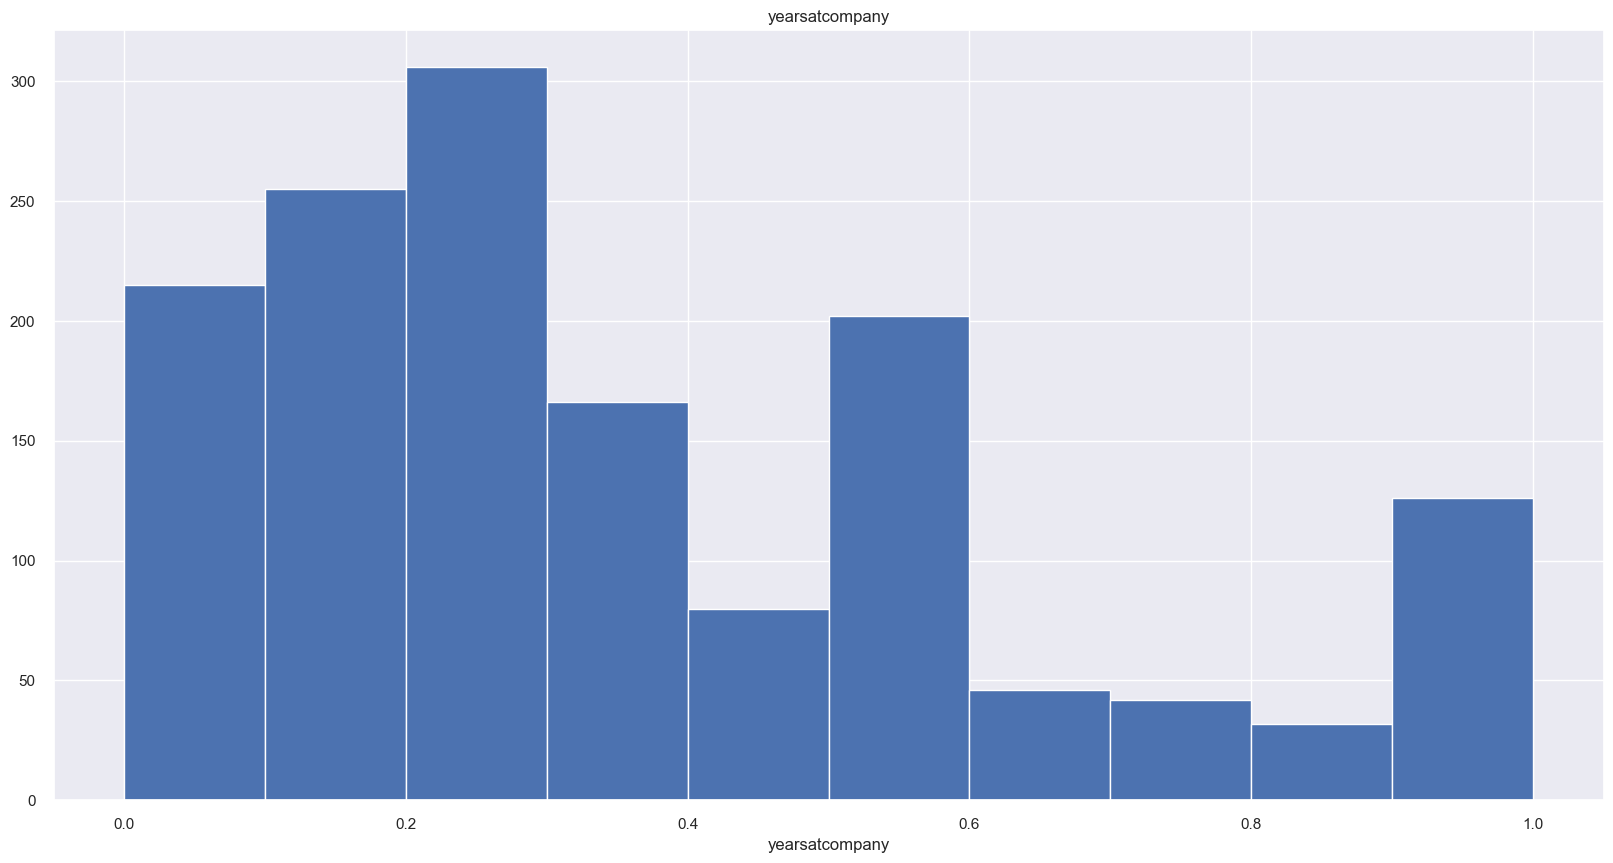

#####################
 
count   1470.000
mean       0.290
std        0.245
min        0.000
5%         0.000
10%        0.000
25%        0.138
50%        0.207
75%        0.483
90%        0.621
95%        0.759
max        1.000
Name: yearsincurrentrole, dtype: float64


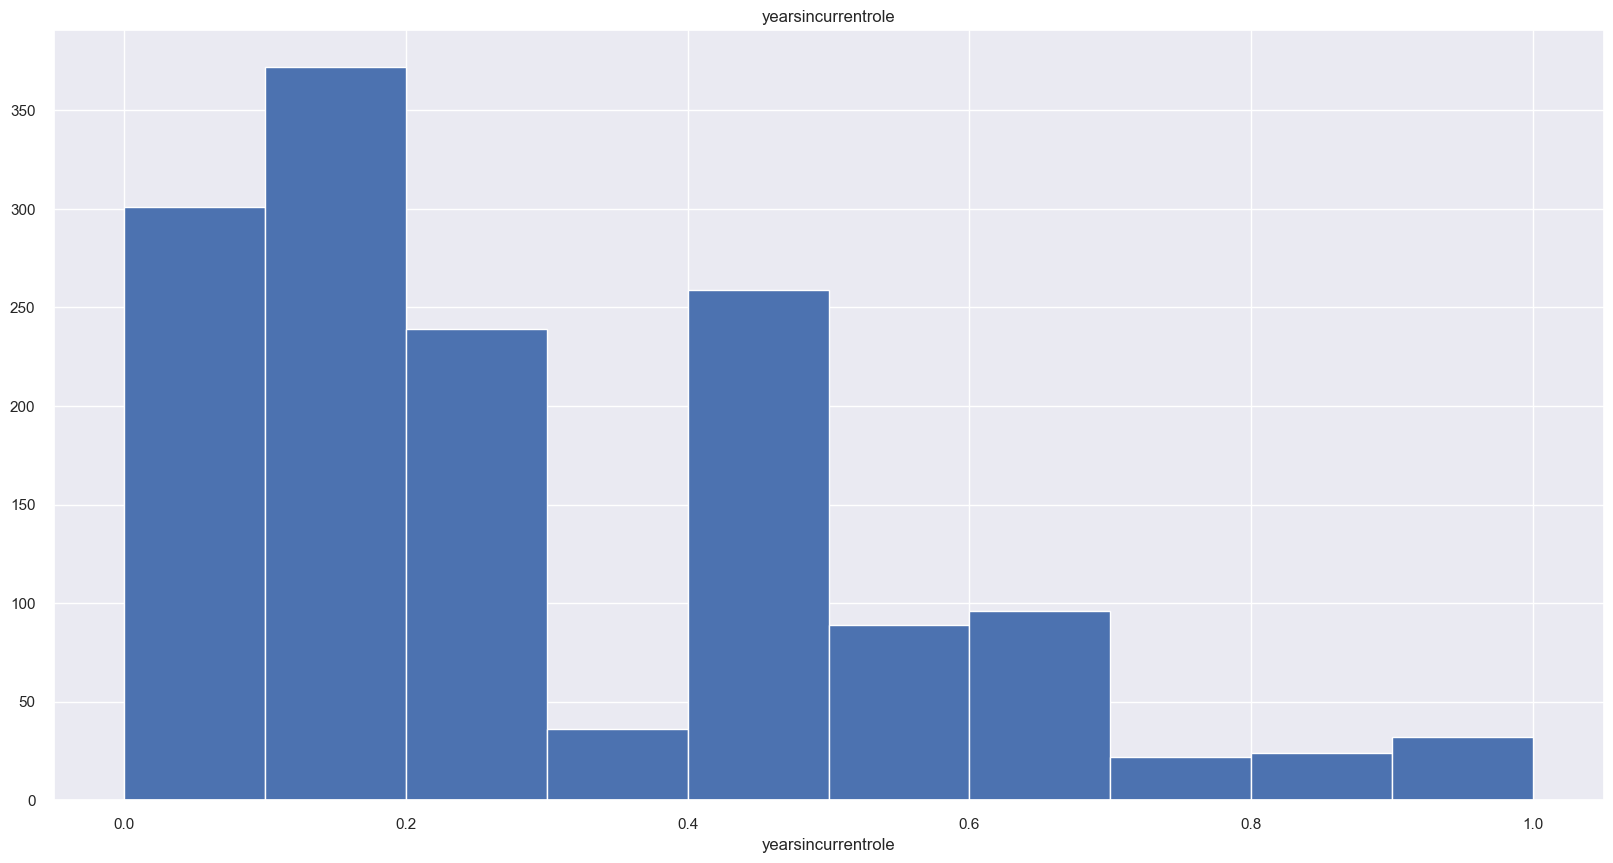

#####################
 
count   1470.000
mean       0.283
std        0.243
min        0.000
5%         0.000
10%        0.000
25%        0.138
50%        0.207
75%        0.483
90%        0.621
95%        0.690
max        1.000
Name: yearswithcurrmanager, dtype: float64


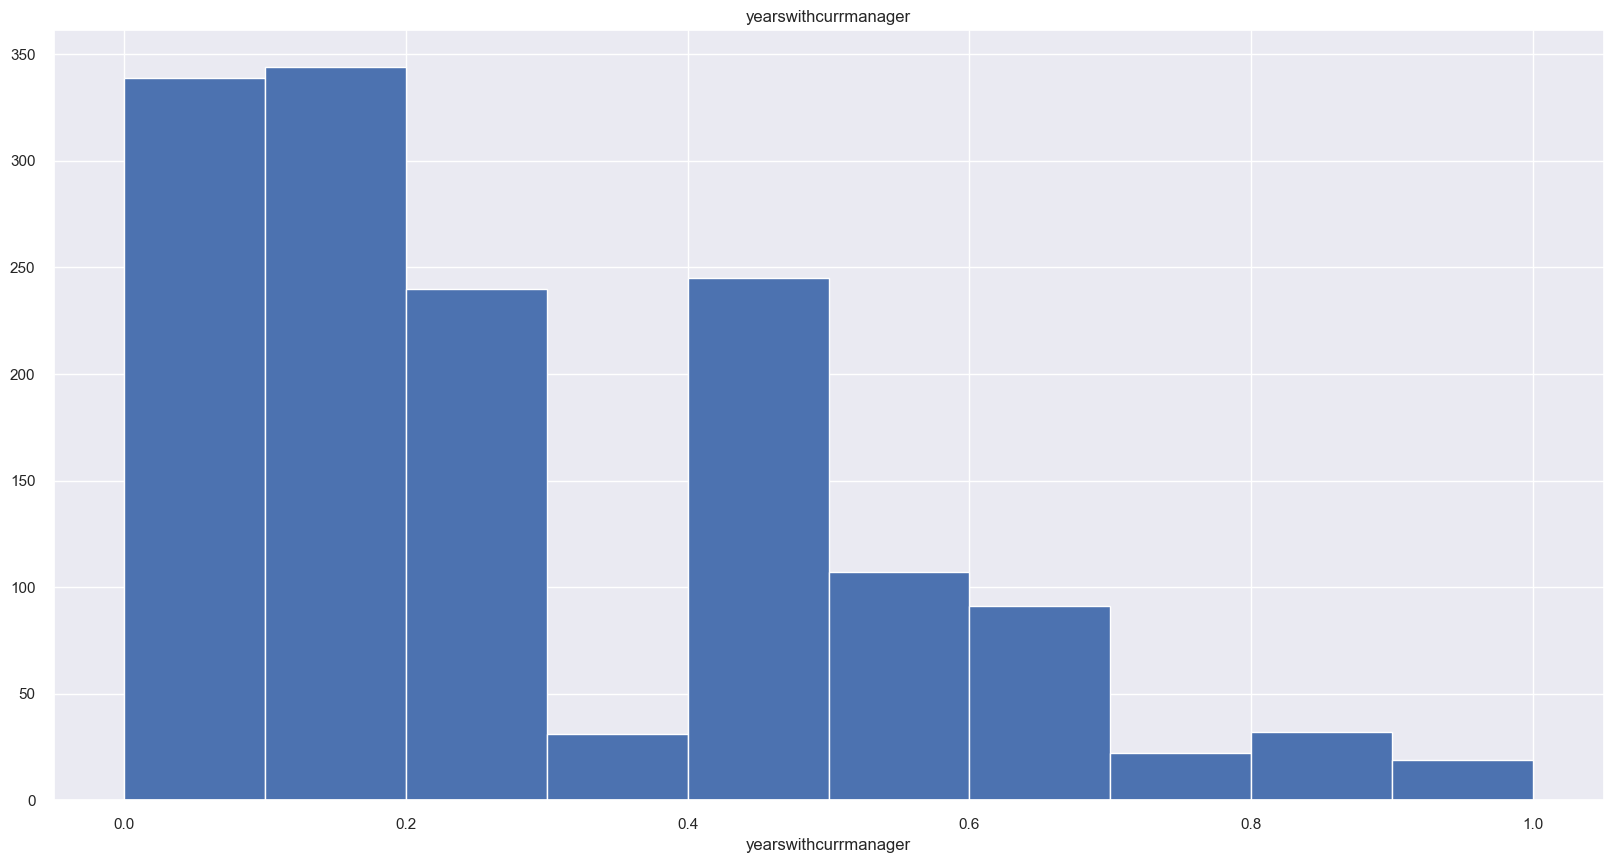

#####################
 
count   1459.000
mean       0.672
std        0.317
min        0.000
5%         0.070
10%        0.167
25%        0.422
50%        0.750
75%        1.000
90%        1.000
95%        1.000
max        1.000
Name: NEW_tenureratio, dtype: float64


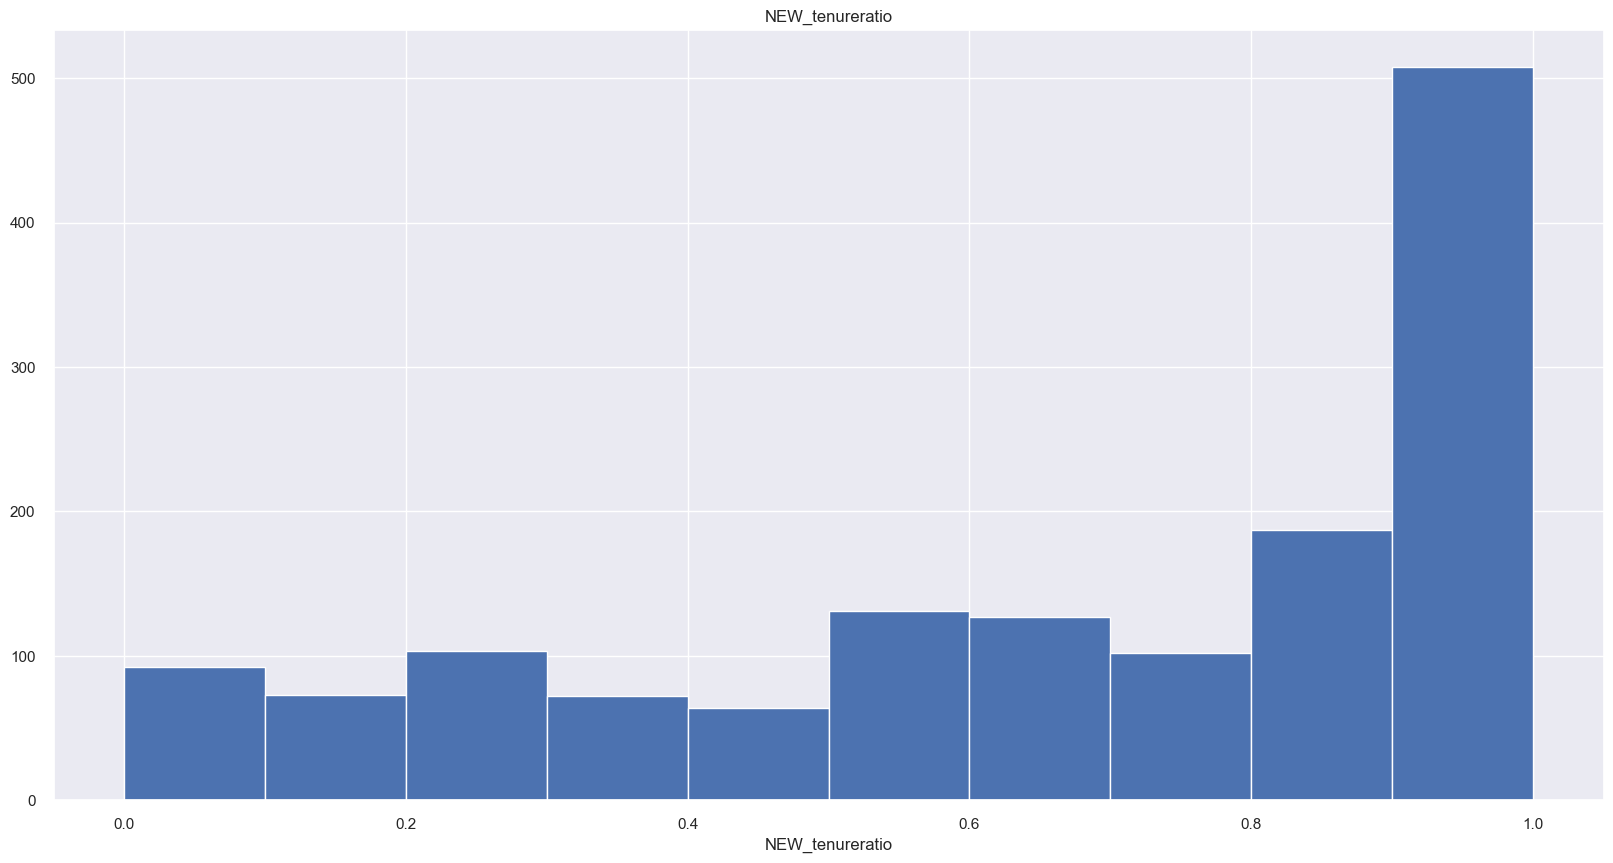

#####################
 
count   1470.000
mean       0.261
std        0.225
min        0.000
5%         0.000
10%        0.000
25%        0.056
50%        0.222
75%        0.389
90%        0.583
95%        0.667
max        1.000
Name: NEW_promotiongap, dtype: float64


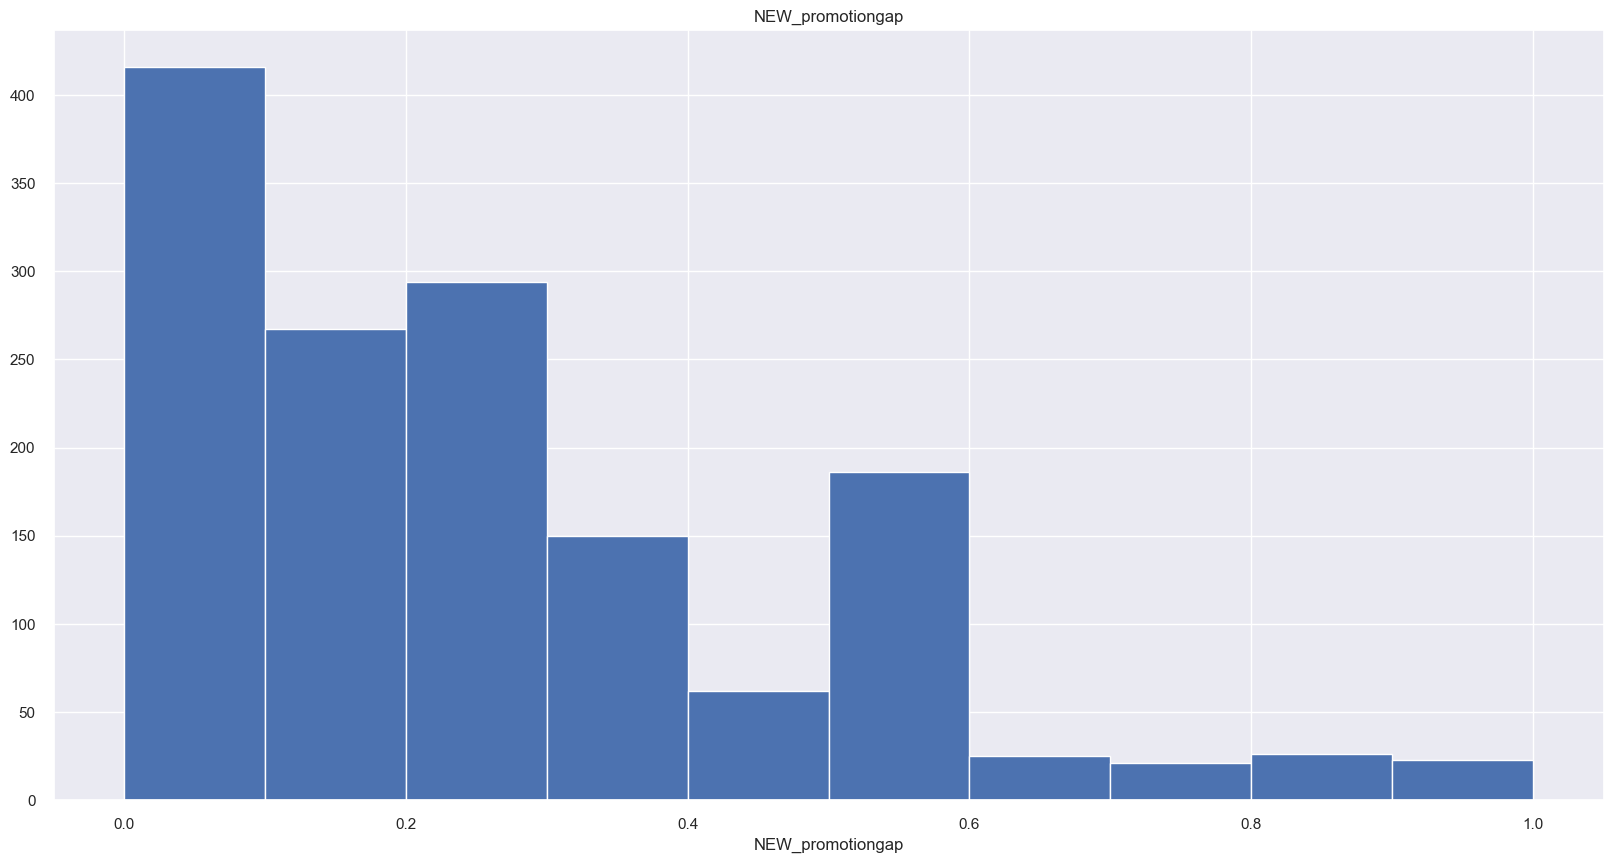

#####################
 
count   1426.000
mean       0.602
std        0.318
min        0.000
5%         0.000
10%        0.000
25%        0.400
50%        0.667
75%        0.833
90%        1.000
95%        1.000
max        1.000
Name: NEW_rolestabilityratio, dtype: float64


#####################
 
count   1426.000
mean       0.583
std        0.322
min        0.000
5%         0.000
10%        0.000
25%        0.400
50%        0.667
75%        0.806
90%        1.000
95%        1.000
max        1.000
Name: NEW_managertenureratio, dtype: float64


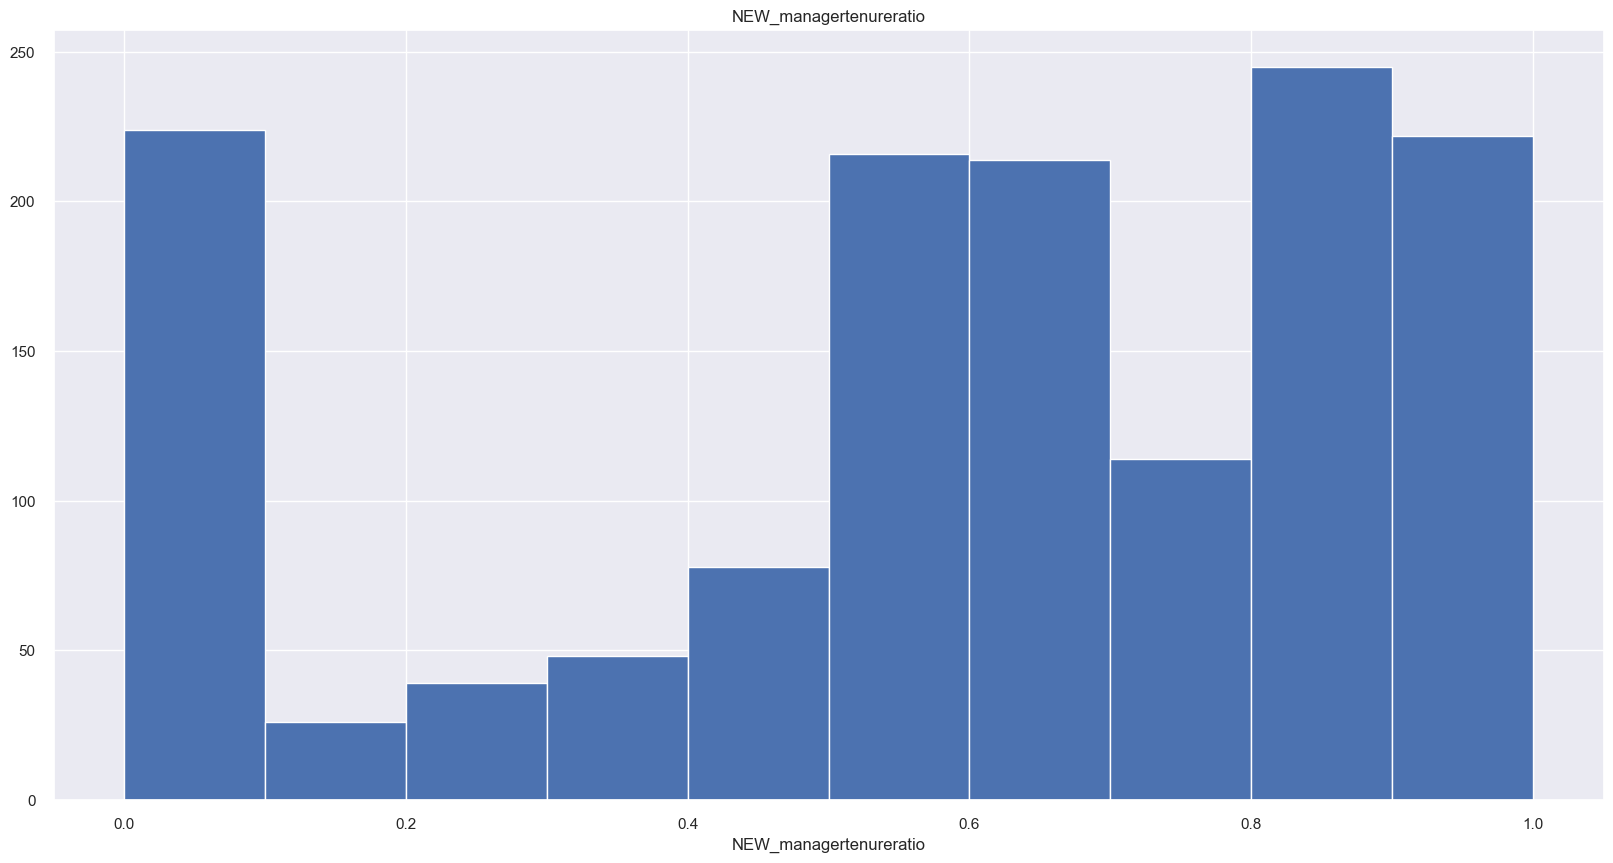

#####################
 
count   1470.000
mean       0.079
std        0.102
min        0.000
5%         0.009
10%        0.013
25%        0.024
50%        0.046
75%        0.095
90%        0.173
95%        0.256
max        1.000
Name: NEW_Income-Rate, dtype: float64


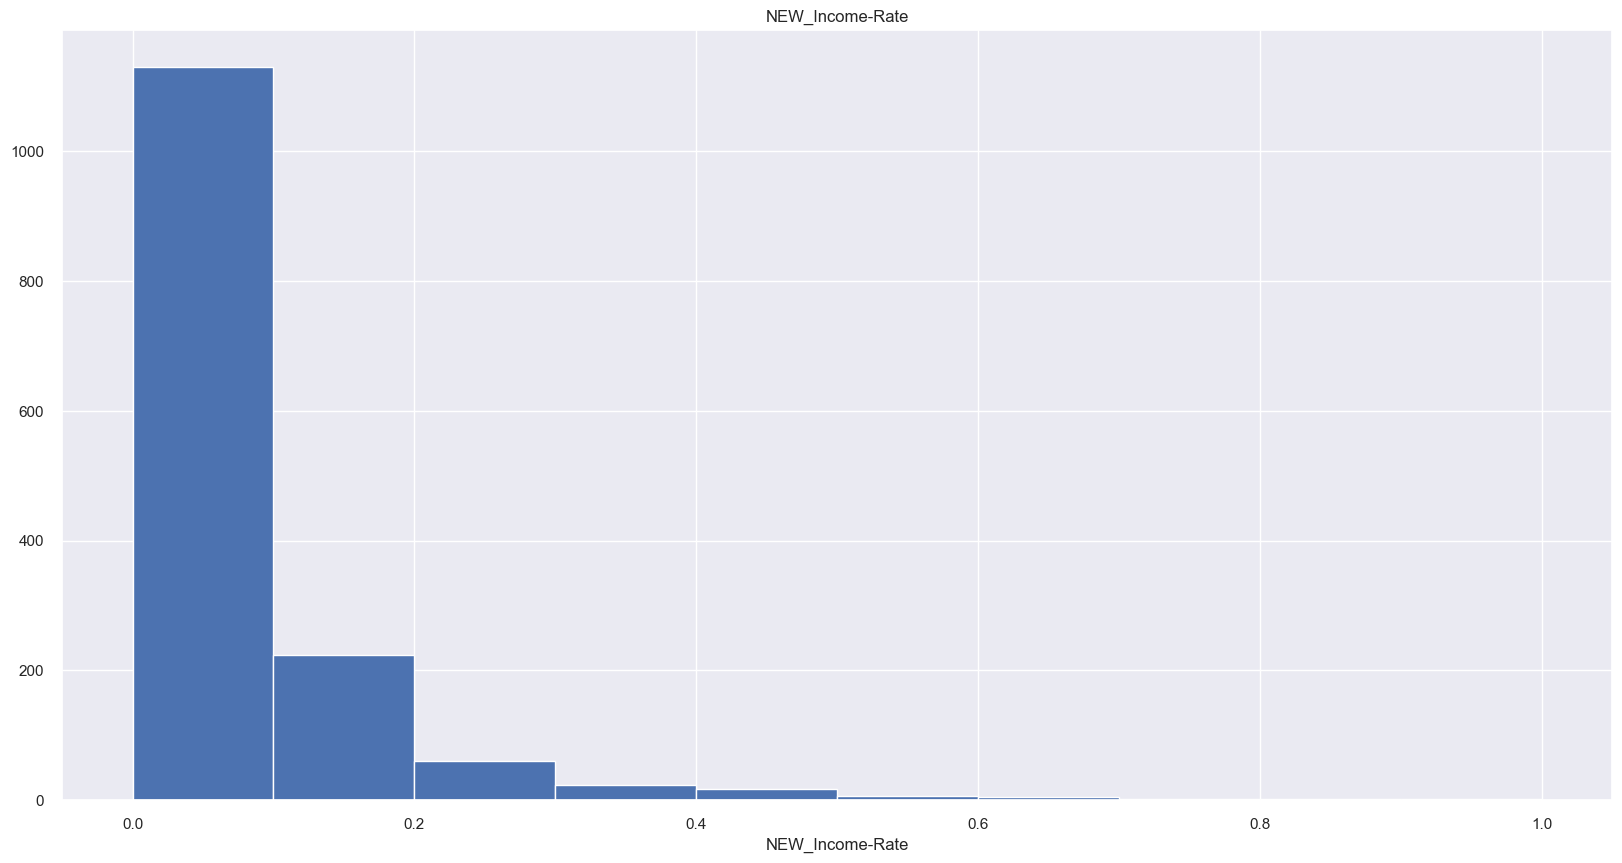

#####################
 


In [1294]:
for col in num_cols:
    num_summary(hr_mms, col, plot=True)

### Robust Scaling

In [1296]:
###################
# RobustScaler: Medyanı çıkar iqr'a böl.
###################

hr_rs = hr.copy()
rs = RobustScaler()
hr_rs[num_cols] = rs.fit_transform(hr_rs[num_cols])


In [1297]:
hr_rs[num_cols].describe().T

count   mean   std    min    25%   50%   75%    max
age                    1470.000  0.071 0.703 -1.385 -0.462 0.000 0.538  1.846
dailyrate              1470.000  0.001 0.583 -1.012 -0.487 0.000 0.513  1.007
distancefromhome       1470.000  0.183 0.676 -0.500 -0.417 0.000 0.583  1.833
employeenumber         1470.000  0.004 0.566 -0.958 -0.497 0.000 0.503  0.984
hourlyrate             1470.000 -0.003 0.569 -1.007 -0.503 0.000 0.497  0.951
monthlyincome          1470.000  0.264 0.796 -0.715 -0.367 0.000 0.633  2.133
monthlyrate            1470.000  0.006 0.573 -0.978 -0.498 0.000 0.502  1.028
numcompaniesworked     1470.000  0.225 0.818 -0.667 -0.333 0.000 0.667  2.167
percentsalaryhike      1470.000  0.202 0.610 -0.500 -0.333 0.000 0.667  1.833
totalworkingyears      1470.000  0.123 0.812 -1.111 -0.444 0.000 0.556  2.056
yearsatcompany         1470.000  0.270 0.832 -0.833 -0.333 0.000 0.667  2.167
yearsincurrentrole     1470.000  0.242 0.711 -0.600 -0.200 0.000 0.800  2.300
yearswithcurrmanager   1470.000  0.221 0.703 -0.600 -0.200 0.000 0.800  2.300
NEW_tenureratio        1459.000 -0.136 0.548 -1.298 -0.567 0.000 0.433  0.433
NEW_promotiongap       1470.000  0.116 0.676 -0.667 -0.500 0.000 0.500  2.333
NEW_rolestabilityratio 1426.000 -0.148 0.733 -1.538 -0.615 0.000 0.385  0.769
NEW_managertenureratio 1426.000 -0.207 0.794 -1.644 -0.658 0.000 0.342  0.822
NEW_Income-Rate        1470.000  0.466 1.439 -0.651 -0.319 0.000 0.681 13.414

In [1298]:
hr_rs.head()

age  dailyrate  distancefromhome  employeenumber  hourlyrate  monthlyincome  monthlyrate  numcompaniesworked  percentsalaryhike  totalworkingyears  yearsatcompany  yearsincurrentrole  yearswithcurrmanager  NEW_tenureratio  NEW_promotiongap  NEW_rolestabilityratio  NEW_managertenureratio  NEW_Income-Rate  businesstravel_Travel_Frequently  businesstravel_Travel_Rarely  department_Research & Development  department_Sales  educationfield_Life Sciences  educationfield_Marketing  educationfield_Medical  educationfield_Other  educationfield_Technical Degree  jobrole_Human Resources  jobrole_Laboratory Technician  jobrole_Manager  jobrole_Manufacturing Director  jobrole_Research Director  jobrole_Research Scientist  jobrole_Sales Executive  jobrole_Sales Representative  maritalstatus_Married  maritalstatus_Single  NEW_age_cat_25–34  NEW_age_cat_35–44  NEW_age_cat_45–54  NEW_age_cat_55–60  education_2  education_3  education_4  education_5  environmentsatisfaction_2  environmentsatisfaction_3  environmentsatisfaction_4  gender_1  jobinvolvement_2  jobinvolvement_3  jobinvolvement_4  joblevel_2  joblevel_3  joblevel_4  joblevel_5  jobsatisfaction_2  jobsatisfaction_3  jobsatisfaction_4  overtime_1  performancerating_4  relationshipsatisfaction_2  relationshipsatisfaction_3  relationshipsatisfaction_4  stockoptionlevel_1  stockoptionlevel_2  stockoptionlevel_3  trainingtimeslastyear_1  trainingtimeslastyear_2  trainingtimeslastyear_3  trainingtimeslastyear_4  trainingtimeslastyear_5  trainingtimeslastyear_6  worklifebalance_2  worklifebalance_3  worklifebalance_4  yearssincelastpromotion_1.0  yearssincelastpromotion_2.0  yearssincelastpromotion_3.0  yearssincelastpromotion_4.0  yearssincelastpromotion_5.0  yearssincelastpromotion_6.0  yearssincelastpromotion_7.0  yearssincelastpromotion_7.5  att_1
0  0.385      0.434            -0.500          -0.958       0.783          0.196        0.422               2.000             -0.500             -0.222           0.167               0.200                 0.400            0.000             0.333                   0.000                   0.411           -0.161                             False                          True                              False              True                          True                     False                   False                 False                            False                    False                          False            False                           False                      False                       False                     True                         False                  False                  True              False               True              False              False         True        False        False        False                       True                      False                      False     False             False              True             False        True       False       False       False              False              False               True        True                False                       False                       False                       False               False               False               False                    False                    False                    False                    False                    False                    False              False              False              False                        False                        False                        False                        False                        False                        False                        False                        False   True
1  1.000     -0.756             0.083          -0.957      -0.140          0.039        0.860              -0.333              1.500              0.000           0.833               0.800                 0.800            0.433             0.833                   0.077                   0.082           -0.346                              True                

#### hr robust scaling checkpoint - hr_v3

In [1300]:
hr = hr_rs.copy()

In [1301]:
hr.head(20)

age  dailyrate  distancefromhome  employeenumber  hourlyrate  monthlyincome  monthlyrate  numcompaniesworked  percentsalaryhike  totalworkingyears  yearsatcompany  yearsincurrentrole  yearswithcurrmanager  NEW_tenureratio  NEW_promotiongap  NEW_rolestabilityratio  NEW_managertenureratio  NEW_Income-Rate  businesstravel_Travel_Frequently  businesstravel_Travel_Rarely  department_Research & Development  department_Sales  educationfield_Life Sciences  educationfield_Marketing  educationfield_Medical  educationfield_Other  educationfield_Technical Degree  jobrole_Human Resources  jobrole_Laboratory Technician  jobrole_Manager  jobrole_Manufacturing Director  jobrole_Research Director  jobrole_Research Scientist  jobrole_Sales Executive  jobrole_Sales Representative  maritalstatus_Married  maritalstatus_Single  NEW_age_cat_25–34  NEW_age_cat_35–44  NEW_age_cat_45–54  NEW_age_cat_55–60  education_2  education_3  education_4  education_5  environmentsatisfaction_2  environmentsatisfaction_3  environmentsatisfaction_4  gender_1  jobinvolvement_2  jobinvolvement_3  jobinvolvement_4  joblevel_2  joblevel_3  joblevel_4  joblevel_5  jobsatisfaction_2  jobsatisfaction_3  jobsatisfaction_4  overtime_1  performancerating_4  relationshipsatisfaction_2  relationshipsatisfaction_3  relationshipsatisfaction_4  stockoptionlevel_1  stockoptionlevel_2  stockoptionlevel_3  trainingtimeslastyear_1  trainingtimeslastyear_2  trainingtimeslastyear_3  trainingtimeslastyear_4  trainingtimeslastyear_5  trainingtimeslastyear_6  worklifebalance_2  worklifebalance_3  worklifebalance_4  yearssincelastpromotion_1.0  yearssincelastpromotion_2.0  yearssincelastpromotion_3.0  yearssincelastpromotion_4.0  yearssincelastpromotion_5.0  yearssincelastpromotion_6.0  yearssincelastpromotion_7.0  yearssincelastpromotion_7.5  att_1
0   0.385      0.434            -0.500          -0.958       0.783          0.196        0.422               2.000             -0.500             -0.222           0.167               0.200                 0.400            0.000             0.333                   0.000                   0.411           -0.161                             False                          True                              False              True                          True                     False                   False                 False                            False                    False                          False            False                           False                      False                       False                     True                         False                  False                  True              False               True              False              False         True        False        False        False                       True                      False                      False     False             False              True             False        True       False       False       False              False              False               True        True                False                       False                       False                       False               False               False               False                    False                    False                    False                    False                    False                    False              False              False              False                        False                        False                        False                        False                        False                        False                        False                        False   True
1   1.000     -0.756             0.083          -0.957      -0.140          0.039        0.860              -0.333              1.500              0.000           0.833               0.800                 0.800            0.433             0.833                   0.077                   0.082           -0.346                              True              

In [1302]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 85 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   age                                1470 non-null   float64
 1   dailyrate                          1470 non-null   float64
 2   distancefromhome                   1470 non-null   float64
 3   employeenumber                     1470 non-null   float64
 4   hourlyrate                         1470 non-null   float64
 5   monthlyincome                      1470 non-null   float64
 6   monthlyrate                        1470 non-null   float64
 7   numcompaniesworked                 1470 non-null   float64
 8   percentsalaryhike                  1470 non-null   float64
 9   totalworkingyears                  1470 non-null   float64
 10  yearsatcompany                     1470 non-null   float64
 11  yearsincurrentrole                 1470 non-null   float

In [1303]:
hr.isnull().sum().any()

True

In [1304]:
def quick_missing_imp(data, num_method="median", cat_length=20, target="SalePrice"):
    variables_with_na = [col for col in data.columns if data[col].isnull().sum() > 0]  # Eksik değere sahip olan değişkenler listelenir

    temp_target = data[target]

    print("# BEFORE")
    print(data[variables_with_na].isnull().sum(), "\n\n")  # Uygulama öncesi değişkenlerin eksik değerlerinin sayısı

    # değişken object ve sınıf sayısı cat_lengthe eşit veya altındaysa boş değerleri mode ile doldur
    data = data.apply(lambda x: x.fillna(x.mode()[0]) if (x.dtype == "O" and len(x.unique()) <= cat_length) else x, axis=0)

    # num_method mean ise tipi object olmayan değişkenlerin boş değerleri ortalama ile dolduruluyor
    if num_method == "mean":
        data = data.apply(lambda x: x.fillna(x.mean()) if x.dtype != "O" else x, axis=0)
    # num_method median ise tipi object olmayan değişkenlerin boş değerleri ortalama ile dolduruluyor
    elif num_method == "median":
        data = data.apply(lambda x: x.fillna(x.median()) if x.dtype != "O" else x, axis=0)

    data[target] = temp_target

    print("# AFTER \n Imputation method is 'MODE' for categorical variables!")
    print(" Imputation method is '" + num_method.upper() + "' for numeric variables! \n")
    print(data[variables_with_na].isnull().sum(), "\n\n")

    return data

In [1305]:
hr_filled = quick_missing_imp(hr, num_method="median", target="att_1")

# BEFORE
NEW_tenureratio           11
NEW_rolestabilityratio    44
NEW_managertenureratio    44
dtype: int64 


# AFTER 
 Imputation method is 'MODE' for categorical variables!
 Imputation method is 'MEDIAN' for numeric variables! 

NEW_tenureratio           0
NEW_rolestabilityratio    0
NEW_managertenureratio    0
dtype: int64 




In [1306]:
hr = hr_filled.copy()

# Clustering (Kümeleme)

In [1308]:
# !pip install yellowbrick

In [1309]:
import pandas as pd
import argparse
import datetime as dt
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)

In [1310]:
################################
#  Optimal Number of Clusters
################################

In [1311]:
range(2, 12)

range(2, 12)

In [1312]:
K = range(2, 12)

In [1313]:
kmeans = KMeans(n_clusters=4).fit(hr)

In [1314]:
kmeans.labels_

array([1, 2, 1, ..., 3, 2, 3], dtype=int32)

In [1315]:
print(kmeans.inertia_)

23304.298871025763


25829.643798602436
24410.883810043444
23294.395351730054
22480.351611781676
22236.802802552862
21561.308352177784
21155.857714918755
20979.836436507252
20661.356598337115
20574.6195891948


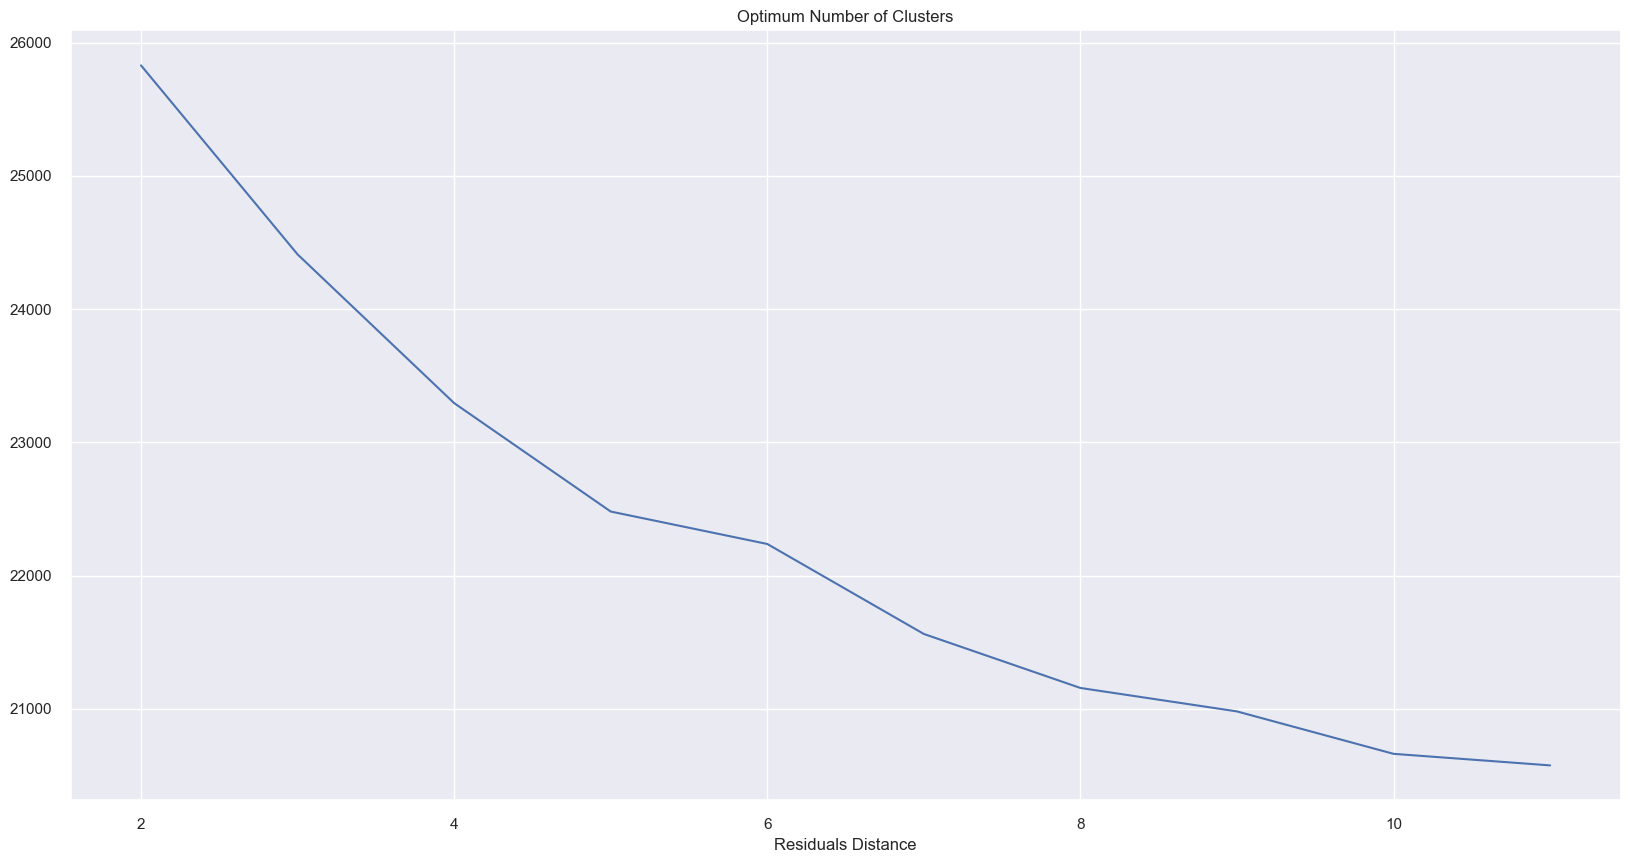

In [1316]:
#kmeans = KMeans()
ssd = []
K = range(2, 12)

for k in K:
    kmeans = KMeans(n_clusters=k).fit(hr)
    print(kmeans.inertia_)
    ssd.append(kmeans.inertia_)


plt.plot(K, ssd, "bx-")
plt.xlabel("Residuals Distance")
plt.title("Optimum Number of Clusters")
plt.show()

#Inertia measures how well a dataset was clustered by K-Means.
#It is calculated by measuring the distance between each data point and its centroid,
#squaring this distance, and summing these squares across one cluster.

In [1317]:
kmeans = KMeans(n_clusters=k, random_state=42).fit(hr)

In [1318]:
kmeans_modeli = KMeans(random_state=42, n_init='auto')

In [1319]:
type(kmeans)

sklearn.cluster._kmeans.KMeans

In [1320]:
elbow = KElbowVisualizer(kmeans, k=(2, 20), metric="distortion", force_model=True)

KElbowVisualizer(ax=<Axes: >, estimator=KMeans(n_clusters=19, random_state=42),
                 k=(2, 20))

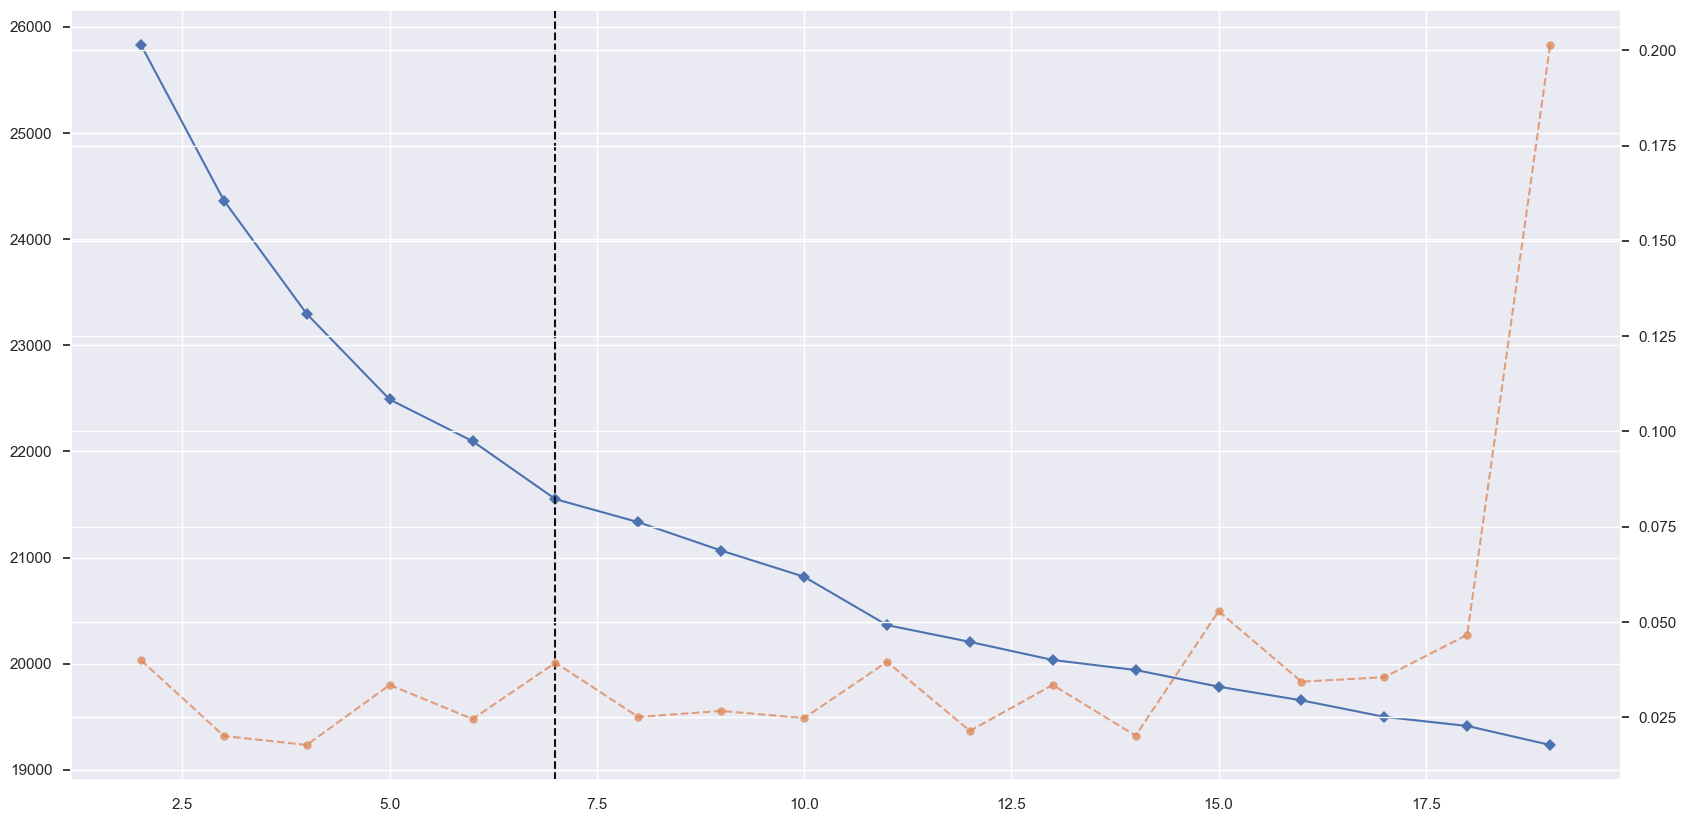

In [1321]:
elbow.fit(hr)

In [1322]:
elbow.show()

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [1323]:
elbow.elbow_value_

7

In [1324]:
kmeans = KMeans(n_clusters=7).fit(hr)

In [1325]:
kmeans.labels_

array([5, 2, 5, ..., 3, 2, 3], dtype=int32)

In [1326]:
hr["clusters"] = kmeans.labels_

In [1327]:
# Oluşan kümelerin özelliklerini tanımak için bir kez daha EDA baştan!
hr["clusters"].value_counts(1)

clusters
3   0.250
2   0.235
5   0.216
0   0.095
1   0.089
4   0.081
6   0.033
Name: proportion, dtype: float64

In [1328]:
hr.head()

age  dailyrate  distancefromhome  employeenumber  hourlyrate  monthlyincome  monthlyrate  numcompaniesworked  percentsalaryhike  totalworkingyears  yearsatcompany  yearsincurrentrole  yearswithcurrmanager  NEW_tenureratio  NEW_promotiongap  NEW_rolestabilityratio  NEW_managertenureratio  NEW_Income-Rate  businesstravel_Travel_Frequently  businesstravel_Travel_Rarely  department_Research & Development  department_Sales  educationfield_Life Sciences  educationfield_Marketing  \
0  0.385      0.434            -0.500          -0.958       0.783          0.196        0.422               2.000             -0.500             -0.222           0.167               0.200                 0.400            0.000             0.333                   0.000                   0.411           -0.161                             False                          True                              False              True                          True                     False   
1  1.000     -0.756             0.083          -0.957      -0.140          0.039        0.860              -0.333              1.500              0.000           0.833               0.800                 0.800            0.433             0.833                   0.077                   0.082           -0.346                              True                         False                               True             False                          True                     False   
2  0.077      0.825            -0.417          -0.955       0.727         -0.517       -0.954               1.333              0.167             -0.333          -0.833              -0.600                -0.600           -1.298            -0.667                   0.000                   0.000            0.861                             False                          True                               True             False                         False                     False   
3 -0.231      0.853            -0.333          -0.954      -0.280         -0.368        0.719              -0.333             -0.500             -0.222           0.500               0.800                -0.600            0.433             0.167                   0.481                  -1.644           -0.491                              True                         False                               True             False                          True                     False   
4 -0.692     -0.305            -0.417          -0.952      -0.727         -0.265        0.193               2.167             -0.333             -0.444          -0.500              -0.200                -0.200           -0.721            -0.667                   0.769                   0.822           -0.341                             False                          True                               True             False                         False                     False   

   educationfield_Medical  educationfield_Other  educationfield_Technical Degree  jobrole_Human Resources  jobrole_Laboratory Technician  jobrole_Manager  jobrole_Manufacturing Director  jobrole_Research Director  jobrole_Research Scientist  jobrole_Sales Executive  jobrole_Sales Representative  maritalstatus_Married  maritalstatus_Single  NEW_age_cat_25–34  NEW_age_cat_35–44  NEW_age_cat_45–54  NEW_age_cat_55–60  education_2  education_3  education_4  education_5  environmentsatisfaction_2  \
0                   False                 False                            False                    False                          False            False                           False                      False                       False                     True                         False                  False                  True              False               True              False              False         True        False        False        False                       True   
1                   False                 False                            False          

In [1329]:
hr.shape

(1470, 86)

In [1330]:
hr.groupby("clusters")["att_1"].mean()

clusters
0   0.386
1   0.069
2   0.096
3   0.196
4   0.059
5   0.182
6   0.082
Name: att_1, dtype: float64

In [1331]:
hr.groupby("clusters")["att_1"].sum()

clusters
0    54
1     9
2    33
3    72
4     7
5    58
6     4
Name: att_1, dtype: int64

# Model Selection

In [1333]:
# !pip install --upgrade scikit-learn pandas xgboost lightgbm catboost

In [1334]:
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# !pip install catboost
# !pip install xgboost
# !pip install lightgbm

In [1335]:
def find_best_model(X, y, test_size=0.2, random_state=42):



    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)


    models = {
        "Logistic Regression": LogisticRegression(max_iter=1000, random_state=random_state),
        "Random Forest": RandomForestClassifier(n_estimators=100, random_state=random_state),
        "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=random_state),
        #"Support Vector Machine": SVC(kernel='rbf', probability=True, random_state=random_state),
        "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=random_state),
        "LightGBM": LGBMClassifier(random_state=random_state)
    }

    best_model = None
    best_score = 0
    model_scores = {}


    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        model_scores[name] = {
            "Accuracy": accuracy,
            "Precision": precision,
            "F1-Score": f1
        }

        print(f"{name}: Accuracy={accuracy:.4f}, Precision={precision:.4f}, F1-Score={f1:.4f}")

        if f1 > best_score:
            best_score = f1
            best_model = name

    print("\nEn İyi Model:", best_model)
    print("En Yüksek F1-Score:", best_score)

    return best_model, best_score, model_scores


In [1336]:
hr.head()

age  dailyrate  distancefromhome  employeenumber  hourlyrate  monthlyincome  monthlyrate  numcompaniesworked  percentsalaryhike  totalworkingyears  yearsatcompany  yearsincurrentrole  yearswithcurrmanager  NEW_tenureratio  NEW_promotiongap  NEW_rolestabilityratio  NEW_managertenureratio  NEW_Income-Rate  businesstravel_Travel_Frequently  businesstravel_Travel_Rarely  department_Research & Development  department_Sales  educationfield_Life Sciences  educationfield_Marketing  \
0  0.385      0.434            -0.500          -0.958       0.783          0.196        0.422               2.000             -0.500             -0.222           0.167               0.200                 0.400            0.000             0.333                   0.000                   0.411           -0.161                             False                          True                              False              True                          True                     False   
1  1.000     -0.756             0.083          -0.957      -0.140          0.039        0.860              -0.333              1.500              0.000           0.833               0.800                 0.800            0.433             0.833                   0.077                   0.082           -0.346                              True                         False                               True             False                          True                     False   
2  0.077      0.825            -0.417          -0.955       0.727         -0.517       -0.954               1.333              0.167             -0.333          -0.833              -0.600                -0.600           -1.298            -0.667                   0.000                   0.000            0.861                             False                          True                               True             False                         False                     False   
3 -0.231      0.853            -0.333          -0.954      -0.280         -0.368        0.719              -0.333             -0.500             -0.222           0.500               0.800                -0.600            0.433             0.167                   0.481                  -1.644           -0.491                              True                         False                               True             False                          True                     False   
4 -0.692     -0.305            -0.417          -0.952      -0.727         -0.265        0.193               2.167             -0.333             -0.444          -0.500              -0.200                -0.200           -0.721            -0.667                   0.769                   0.822           -0.341                             False                          True                               True             False                         False                     False   

   educationfield_Medical  educationfield_Other  educationfield_Technical Degree  jobrole_Human Resources  jobrole_Laboratory Technician  jobrole_Manager  jobrole_Manufacturing Director  jobrole_Research Director  jobrole_Research Scientist  jobrole_Sales Executive  jobrole_Sales Representative  maritalstatus_Married  maritalstatus_Single  NEW_age_cat_25–34  NEW_age_cat_35–44  NEW_age_cat_45–54  NEW_age_cat_55–60  education_2  education_3  education_4  education_5  environmentsatisfaction_2  \
0                   False                 False                            False                    False                          False            False                           False                      False                       False                     True                         False                  False                  True              False               True              False              False         True        False        False        False                       True   
1                   False                 False                            False          

In [1337]:
X = hr.drop(["att_1"], axis=1)

In [1338]:
y = hr["att_1"]

In [1339]:
best_model, best_score, model_scores = find_best_model(X, y)

Logistic Regression: Accuracy=0.8878, Precision=0.6000, F1-Score=0.5217
Random Forest: Accuracy=0.8776, Precision=0.8000, F1-Score=0.1818
Gradient Boosting: Accuracy=0.8810, Precision=0.6250, F1-Score=0.3636
XGBoost: Accuracy=0.8707, Precision=0.5238, F1-Score=0.3667
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 198, number of negative: 978
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000729 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1875
[LightGBM] [Info] Number of data points in the train set: 1176, number of used features: 85
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.168367 -> initscore=-1.597243
[LightGBM] [Info] Start training from score -1.597243
LightGBM: Accuracy=0.8571, Precision=0.4211, F1-Score=0.2759

En İyi Model: Logistic Regression
En 

In [1340]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=17)

## CATBOOST

In [1342]:
catboost_model = CatBoostClassifier(verbose=False, random_state=12345).fit(X_train, y_train)

In [1343]:
y_pred = catboost_model.predict(X_test)

In [1344]:
y_pred

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False,  True, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [1345]:
catboost_model.predict_proba(X_test)

array([[0.88903297, 0.11096703],
       [0.96671163, 0.03328837],
       [0.95847389, 0.04152611],
       [0.98579909, 0.01420091],
       [0.95868945, 0.04131055],
       [0.95701561, 0.04298439],
       [0.98756482, 0.01243518],
       [0.83551179, 0.16448821],
       [0.95670018, 0.04329982],
       [0.97479872, 0.02520128],
       [0.89336683, 0.10663317],
       [0.92294673, 0.07705327],
       [0.85163585, 0.14836415],
       [0.89705511, 0.10294489],
       [0.9817512 , 0.0182488 ],
       [0.96927891, 0.03072109],
       [0.96942283, 0.03057717],
       [0.98068005, 0.01931995],
       [0.83468285, 0.16531715],
       [0.9802809 , 0.0197191 ],
       [0.74498475, 0.25501525],
       [0.59501712, 0.40498288],
       [0.94269994, 0.05730006],
       [0.92737486, 0.07262514],
       [0.8474824 , 0.1525176 ],
       [0.97745002, 0.02254998],
       [0.9343659 , 0.0656341 ],
       [0.93174524, 0.06825476],
       [0.97668586, 0.02331414],
       [0.89884783, 0.10115217],
       [0.

In [1346]:
print(f"Accuracy: {round(accuracy_score(y_pred, y_test), 2)}")
print(f"Recall: {round(recall_score(y_pred,y_test),2)}")
print(f"Precision: {round(precision_score(y_pred,y_test), 2)}")
print(f"F1: {round(f1_score(y_pred,y_test), 2)}")
print(f"Auc: {round(roc_auc_score(y_pred,y_test), 2)}")
print(classification_report(y_pred, y_test))

Accuracy: 0.88
Recall: 1.0
Precision: 0.22
F1: 0.36
Auc: 0.94
              precision    recall  f1-score   support

       False       1.00      0.87      0.93       142
        True       0.22      1.00      0.36         5

    accuracy                           0.88       147
   macro avg       0.61      0.94      0.64       147
weighted avg       0.97      0.88      0.91       147



## Logistic Regression

In [1348]:
log_model = LogisticRegression(max_iter=1000)

In [1349]:
log_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [1350]:
y_pred = log_model.predict(X_test)
y_proba = log_model.predict_proba(X_test)[:, 1]

In [1351]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nROC-AUC:", roc_auc_score(y_test, y_proba))

Confusion Matrix:
 [[119   5]
 [ 15   8]]

Classification Report:
               precision    recall  f1-score   support

       False       0.89      0.96      0.92       124
        True       0.62      0.35      0.44        23

    accuracy                           0.86       147
   macro avg       0.75      0.65      0.68       147
weighted avg       0.85      0.86      0.85       147


ROC-AUC: 0.8853436185133239


In [1352]:
128/147 #accuracy

0.8707482993197279

In [1353]:
119/133 #recall

0.8947368421052632

## Confusion Matrix

In [1355]:
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix

In [1356]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

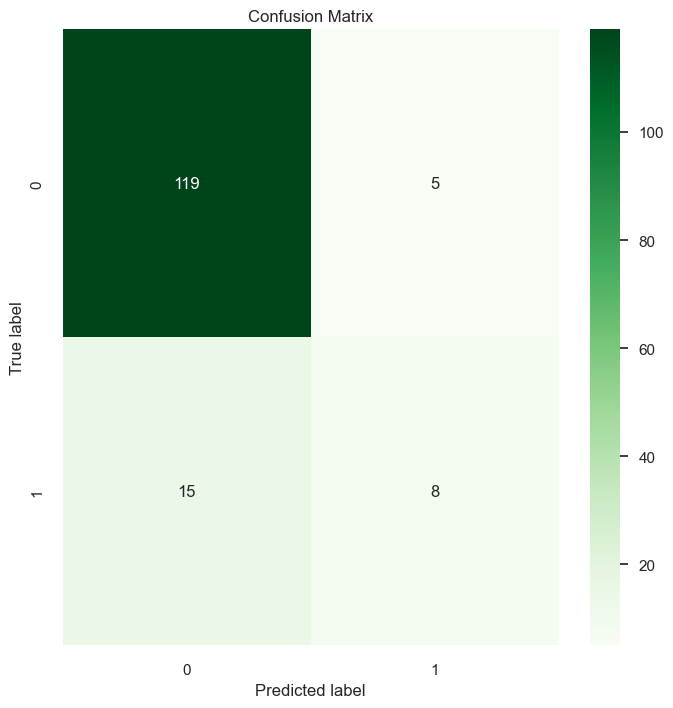

In [1357]:
# Create a Confusion Matrix
plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

### Confusion Matrix Açıklaması

![matrix](https://media.datacamp.com/legacy/v1701364260/image_5baaeac4c0.png)

### Accuracy (Doğruluk)  
Doğru sınıflandırmaların toplam sayısının toplam vaka sayısına bölünmesiyle ölçülür.

![Accuracy](https://media.datacamp.com/legacy/v1701364260/image_a01f698b4a.png)

### Recall (Geri çağırma)  
Toplam doğru pozitiflerin sayısının toplam gerçek pozitiflerin sayısına bölünmesiyle ölçülür.

![recall.png](https://media.datacamp.com/legacy/v1701364259/image_3e2bbf1892.png)

### Precision  
Gerçek pozitiflerin toplam sayısının tahmin edilen pozitiflerin toplam sayısına bölünmesiyle ölçülür.

![Precision](https://media.datacamp.com/legacy/v1701364260/image_981bfda68e.png)

### F1 Puanı
Kesinlik ve geri çağırma oranlarının harmonik ortalaması olan tek bir metriktir.

![F1_score](https://media.datacamp.com/legacy/v1701364259/image_134fdaaa9a.png)

### Temel Mantık: 2x2 Tablosu

Bir şeyi tahmin etmeye çalıştığınızı düşünün (Örneğin: "Bu e-posta SPAM mi, değil mi?"). Karşımıza 4 olası durum çıkar:

- Gerçekte SPAM'dir, model "SPAM" der. (Doğru bildik)
- Gerçekte SPAM değildir, model "SPAM değil" der. (Doğru bildik)
- Gerçekte SPAM değildir ama model "SPAM" der. (Yanlış alarm)
- Gerçekte SPAM'dir ama model "SPAM değil" der. (Kaçırdık)

##### Dört Temel Terim
Pozitif (1), aradığımız durum olarak kabul edilir.

- **True Positive (TP - Doğru Pozitif):**
Durum: Evet, doğru bildin!
Örnek: E-posta Spam idi, model de "Spam" dedi.


- **True Negative (TN - Doğru Negatif):**
Durum: Evet, doğru bildin!
Örnek: E-posta Normal idi, model de "Normal" dedi.


- **False Positive (FP - Yanlış Pozitif):**
Durum: __Yanlış alarm (Tip 1 Hata)__
Örnek: E-posta aslında Normal (önemli bir iş maili), ama model ona "Spam" dedi.


- **False Negative (FN - Yanlış Negatif)**
Durum: __Gözden kaçırma (Tip 2 Hata)__
Örnek: E-posta aslında Spam (virüslü), ama model ona "Normal" dedi ve gelen kutuna düştü.

- Accuracy (Doğruluk)  
Modelin toplamda ne kadarını doğru bildiğidir  
Dikkat: Veri dengesizse (örneğin 100 verinin 99'u negatifse) bu metrik yanıltıcıdır. Her şeye "Negatif" derseniz %99 doğruluk alırsınız ama model hiçbir işe yaramaz.

- Precision (Kesinlik)  
"Modelin Pozitif dediği tahminlerin ne kadarı gerçekten Pozitif?" sorusunun cevabıdır. Yanlış alarmları (FP) minimize etmek istediğinizde önemlidir.
 
- Recall (Duyarlılık / Sensitivity)  
"Gerçekte Pozitif olanların ne kadarını yakalayabildik?" sorusunun cevabıdır. Gözden kaçırmanın (FN) maliyetli olduğu durumlarda (örneğin Kanser tespiti) en önemli metriktir.
 
- F1 Score  
Precision ve Recall arasındaki dengedir. İkisinin harmonik ortalamasını alır. Eğer hem yanlış alarmları hem de gözden kaçanları dengelemek istiyorsanız F1 Score'a bakarsınız.

# Feature Importance

In [1373]:
catboost_model.feature_importances_

array([4.01345478, 3.49577157, 4.3225032 , 3.91599709, 3.1567027 ,
       5.04127108, 2.32262689, 3.5396535 , 2.74451213, 2.09895319,
       1.35947116, 1.46098729, 1.81575482, 1.60866769, 2.27335239,
       1.85899591, 2.50138768, 2.36087432, 1.89539945, 0.10279789,
       1.5236367 , 0.75307733, 0.76530957, 0.34048175, 0.48148009,
       0.03656405, 0.8568513 , 0.02824542, 1.69810326, 0.05037122,
       0.17334768, 0.13301947, 0.69323483, 1.25477403, 0.16649924,
       0.45689375, 1.91119711, 0.5535648 , 1.5169317 , 0.26375868,
       0.13789672, 0.38786074, 0.35303766, 0.74303842, 0.10343058,
       0.36757343, 0.95412724, 1.58174051, 0.68280581, 0.16564424,
       0.61764663, 0.76928939, 1.81296926, 0.70052925, 0.18476136,
       0.04907468, 0.33862654, 0.42836333, 2.71858058, 7.19673132,
       0.09189263, 0.37949139, 0.41522926, 0.5774207 , 3.44219308,
       0.55934416, 0.16867966, 0.0780256 , 0.74095848, 0.50651292,
       0.21492986, 0.09713783, 0.0826822 , 0.60205945, 2.34281

In [1374]:
feature_imp = pd.DataFrame({'Value': catboost_model.feature_importances_, 'Feature': X.columns})
feature_imp.sort_values(by="Value",ascending=False)

Value                            Feature
59  7.197                         overtime_1
5   5.041                      monthlyincome
2   4.323                   distancefromhome
0   4.013                                age
3   3.916                     employeenumber
7   3.540                 numcompaniesworked
1   3.496                          dailyrate
64  3.442                 stockoptionlevel_1
4   3.157                         hourlyrate
8   2.745                  percentsalaryhike
58  2.719                  jobsatisfaction_4
16  2.501             NEW_managertenureratio
17  2.361                    NEW_Income-Rate
74  2.343                  worklifebalance_3
6   2.323                        monthlyrate
14  2.273                   NEW_promotiongap
9   2.099                  totalworkingyears
84  2.021                           clusters
36  1.911               maritalstatus_Single
18  1.895   businesstravel_Travel_Frequently
15  1.859             NEW_rolestabilityratio
12  1.816               yearswithcurrmanager
52  1.813                         joblevel_2
28  1.698      jobrole_Laboratory Technician
13  1.609                    NEW_tenureratio
47  1.582          environmentsatisfaction_4
20  1.524  department_Research & Development
38  1.517                  NEW_age_cat_35–44
11  1.461                 yearsincurrentrole
10  1.359                     yearsatcompany
33  1.255            jobrole_Sales Executive
46  0.954          environmentsatisfaction_3
26  0.857    educationfield_Technical Degree
51  0.769                   jobinvolvement_4
22  0.765       educationfield_Life Sciences
21  0.753                   department_Sales
43  0.743                        education_4
68  0.741            trainingtimeslastyear_2
53  0.701                         joblevel_3
32  0.693         jobrole_Research Scientist
48  0.683                           gender_1
50  0.618                   jobinvolvement_3
73  0.602                  worklifebalance_2
63  0.577         relationshipsatisfaction_4
65  0.559                 stockoptionlevel_2
37  0.554                  NEW_age_cat_25–34
82  0.533        yearssincelastpromotion_7.0
69  0.507            trainingtimeslastyear_3
24  0.481             educationfield_Medical
35  0.457              maritalstatus_Married
76  0.456        yearssincelastpromotion_1.0
57  0.428                  jobsatisfaction_3
62  0.415         relationshipsatisfaction_3
41  0.388                        education_2
61  0.379         relationshipsatisfaction_2
45  0.368          environmentsatisfaction_2
42  0.353                        education_3
23  0.340           educationfield_Marketing
56  0.339                  jobsatisfaction_2
39  0.264                  NEW_age_cat_45–54
70  0.215            trainingtimeslastyear_4
78  0.208        yearssincelastpromotion_3.0
54  0.185                         joblevel_4
30  0.173     jobrole_Manufacturing Director
83  0.172        yearssincelastpromotion_7.5
66  0.169                 stockoptionlevel_3
34  0.166       jobrole_Sales Representative
49  0.166                   jobinvolvement_2
81  0.154        yearssincelastpromotion_6.0
75  0.146                  worklifebalance_4
40  0.138                  NEW_age_cat_55–60
31  0.133          jobrole_Research Director
77  0.104        yearssincelastpromotion_2.0
44  0.103                        education_5
19  0.103       businesstravel_Travel_Rarely
71  0.097            trainingtimeslastyear_5
60  0.092                performancerating_4
72  0.083            trainingtimeslastyear_6
67  0.078            trainingtimeslastyear_1
29  0.050                    jobrole_Manager
55  0.049                         joblevel_5
25  0.037               educationfield_Other
79  0.036        yearssincelastpromotion_4.0
80  0.031        yearssincelastpromotion_5.0
27  0.028            jobrole_Human Resources

In [1375]:
################################################################
# Değişkenlerin önem düzeyini belirten feature_importance fonksiyonunu kullanarak özelliklerin sıralamasını çizdiriniz.
################################################################

def plot_importance(model, features, num=len(X), save=False):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    plt.figure(figsize=(10, 20))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False)[0:num])
    plt.title('Features')
    plt.tight_layout()
    plt.show()
    if save:
        plt.savefig("importances.png")

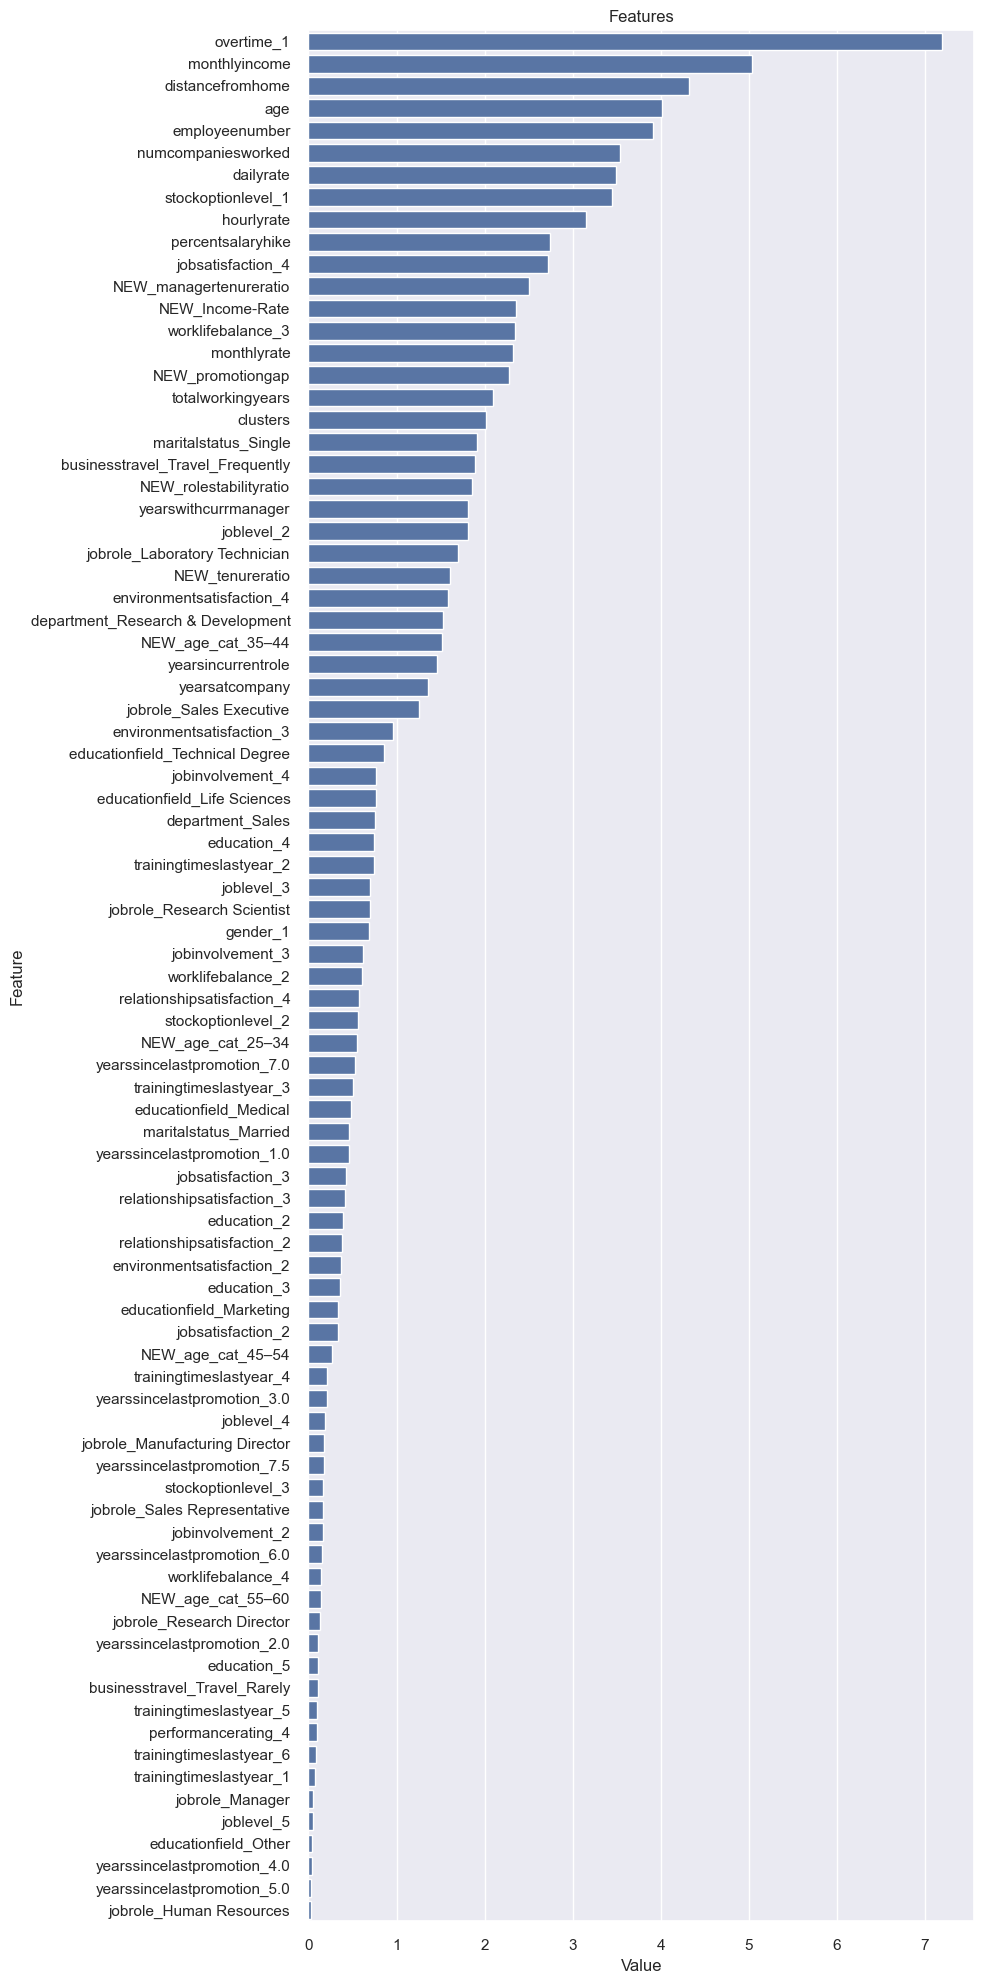

In [1376]:
plot_importance(catboost_model, X)

Nasıl daha iyisini yapabiliriz?  
- Model kurarken en iyi 15 (bu sayıyı değişik değerlerle deneyebiliriz) değişkeni kullanıp, diğer değişkenleri droplayabiliriz
- Modelden önce korelasyon analizini tekrar yapabilir, yüksek korelasyonu olanları drop'layabiliriz
- smoothing gibi biraz daha ileri seviye çözümler kullanılabilir.

# Karmaşıklık Matriisi Görselleri İçin Kaynak  
https://www.datacamp.com/tutorial/what-is-a-confusion-matrix-in-machine-learning